In [1]:
# import sys
# !{sys.executable} -m pip install sklearn.cross_validation
#import sys
# !{sys.executable} -m pip install twint
#!{sys.executable} -m pip install --upgrade -e git+https://github.com/twintproject/twint.git@master#egg=twint
import warnings
warnings.filterwarnings('ignore')

## Required Packages

In [2]:
import twitter
import json
import os
import collections
import re
from tabulate import tabulate
import tweepy
import pandas as pd
from functools import partial
from sys import maxsize
import csv
import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine
from textblob import TextBlob

import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#https://senpy.readthedocs.io/en/latest/Quickstart.html
endpoint = 'http://senpy.gsi.upm.es/api'
import requests
from IPython.display import Code
import nltk
import operator
# nltk.download('punkt')
# nltk.download('wordnet')

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from time import gmtime, strftime, localtime
import logging, datetime
import time
import os

import os
import nest_asyncio
nest_asyncio.apply()

In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd

def download_content(file_id, path, unzip=True, overwrite=False):
    if "drive.google.com" in file_id:
        idx = file_id.find("id=")
        file_id = file_id[idx+3:]
        print("file_id fetched from url: ", file_id)

    if os.path.exists(path) and not overwrite:
        print("Model is already downloaded. path: ", path)
        return

    folder = os.path.dirname(path)
    if not os.path.exists(folder):
        os.makedirs(folder)
    gdd.download_file_from_google_drive(file_id=file_id, dest_path= path, 
                                      unzip=unzip, overwrite=overwrite)
# Download the sentencepiece model
file_id, model_name = ("190jGTm3RrunDvn02vmVDE6yZHOahgaG3", "helper")
print(model_name)
path = "./" + model_name
download_content(file_id, path, unzip=True, overwrite=True)

helper
Unzipping...Done.


In [4]:
%reload_ext autoreload
%autoreload 2

from prepare_model import *
mh = ModelHelper()
mh.prepare_model()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/llogiset/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Unzipping...Done.
Unzipping...Done.
Unzipping...Done.


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use a

### DownLoad Tweets

In [5]:
import tweepy
import json
import os
import argparse
import time

import pandas as pd
from pandas import DataFrame
from datetime import date,timedelta

searched_tweets = ""

def retrieve_tweets(query, filePath, count=500):
    
    access_token = "3308683488-VgcvSAbPEVJEChrSMWALnGiseEqjRhyv2Hu6tqs"
    access_token_secret = "JaTOGBjog8aXSDWtaBzAAqScgrwsnWdqaCd2ft1NTBj8X"
    consumer_key = "GcBFd0X40mHisyRCqlkTraD5z"
    consumer_secret = "idrmDkB3gb8nIMCePVTowiImyLqRxlJQv6rSIzcMuXxBhML42U"

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)

    max_tweets = count
    max_tweets = int(max_tweets)
    print(max_tweets)
    searched_tweets = []
    searched_tweets_check = []
    #Read the tweets of yesterday
    local_time_obj=date.today()
    local_time_obj=local_time_obj-timedelta(1)
    datetime=local_time_obj.strftime("%Y_%m_%d_%H_%M_%S")
    print("Lakshmi printeddddd",datetime)
    if os.path.exists('tweets/{}.json'.format(datetime)):
        file=open('tweets/{}.json'.format(datetime),"r")
        lines=file.readlines()
        file.close()

        since_id = json.loads(lines[0])["id"]
    else:
        since_id=-1

    last_id=-1
    print("SINCE_ID:{} ".format(since_id))
    #last_id=-1
    #Number connections
    count_connections=0
    MAX_CONNECTIONS=300
    while len(searched_tweets) < max_tweets:
        print("searched tweets are:",len(searched_tweets))
        count = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query,lang='en',count=count)
            #wq = bitter.crawlers.TwitterQueue.from_credentials('credentials.json')
            #new_tweets = wq.statuses.search_tweet(q=query, count=count, include_rts=False)
            #wq = bitter.crawlers.TwitterQueue.from_credentials()
            #new_tweets = wq.statuses.user_timeline(screen_name=entry['nif:isString'], count=count, include_rts=False)
            if not new_tweets:
                break
            # Filter Rts
            for tweet in new_tweets:
                tweetString = json.dumps(tweet._json)
                tweetJson = json.loads(tweetString)
                if not "retweeted_status" in tweetJson:
                    if not tweetJson['text'] in searched_tweets_check:
                        print("-------------------------------")
                        print(tweetJson['text'])
                        print("-------------------------------")
                        searched_tweets_check.append(tweetJson['text'])
                        searched_tweets.append(tweet)
            #searched_tweets.extend(new_tweets)
            last_id = new_tweets[-1].id
            count_connections+=1
            if count_connections>=MAX_CONNECTIONS:
                count_connections=0
                time.sleep(60)
                print("We have to wait 1 minute because of the limit connection")
        except tweepy.TweepError as e:

            # depending on TweepError.code, one may want to retry or wait
            # to keep things simple, we will give up on an error

            break
    with open(filePath, 'a') as output:        
        for item in searched_tweets:
            jsontweet = json.dumps(item._json)
            tweet = json.loads(jsontweet)
            #print(tweet)
            json.dump(tweet, output)
            output.write('\n')

def retrieve_timeline(query, filePath, count=200):

#   
#     access_token = "3308683488-VgcvSAbPEVJEChrSMWALnGiseEqjRhyv2Hu6tqs"
#     access_token_secret = "JaTOGBjog8aXSDWtaBzAAqScgrwsnWdqaCd2ft1NTBj8X"
#     consumer_key = "GcBFd0X40mHisyRCqlkTraD5z"
#     consumer_secret = "idrmDkB3gb8nIMCePVTowiImyLqRxlJQv6rSIzcMuXxBhML42U"
    
    access_token = '367437965-btxAYZqGUY4SY7pL5CYSJKk2pnOCfPtwKvyzyzJm'
    access_token_secret = 'ONDV9zZDU1c7br0sInYJxQEvbZK5j5QzpKlixUA0MHAj4'
    consumer_key = 'U83tF3RvxLgQQsOh62sqfm2Md'
    consumer_secret = 'nwE9DbFt8f2UHPb8jqIrsbIcQeaDgyUxv1nNvggvAwr6Rmv1ty'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)

    #searched_tweets = api.user_timeline(user_id=query, count=count)
    searched_tweets = api.user_timeline(user_id=query,exclude_replies=False,include_rts=True,count=200)
   
    with open(filePath, 'a') as output:        
        for item in searched_tweets:
            jsontweet = json.dumps(item._json)
            tweet = json.loads(jsontweet)
            #print(tweet)
            json.dump(tweet, output)
            output.write('\n')

## Get Happy Tweets

In [278]:
#sleepy
#goodnight
#bedtime
#happiness-n3
#success-n1
#peace-n2
#wealth-n4
#joy-n5
#money-n6


retrieve_tweets("#%23worldsleepday OR #%23fresh%20morning OR #%23goodSleep OR #%23happymonday","/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/HAPPYSLEEP/happyNNN.json")

500
Lakshmi printeddddd 2020_07_22_00_00_00
SINCE_ID:-1 
searched tweets are: 0
-------------------------------
✨Love this Filter🤩
.
.
.
.
#Happyme #behappywithyourself #asalways❤️ #smilemore #smilebitch #Morning #Positive… https://t.co/9TPJMBBUVx
-------------------------------
-------------------------------
Good morning lovely Hungrys! The #bees are enjoying the flowers in the garden this morning &amp; the peas/beans are alm… https://t.co/6KhM0dToU2
-------------------------------
-------------------------------
Good morning everyone .. 
This is how we like to wake up .. fresh out the oven strawberry and brown sugar muffins .… https://t.co/UsHGtpeMzP
-------------------------------
-------------------------------
#सुबह #की  #शुरुवात #करें #एक #मुस्कान #के #साथ💑 🌞 ✔️
Call: +91-8787086976
#goodmorning #morning #day #daytime… https://t.co/48bhRXbPGi
-------------------------------
-------------------------------
Good Morning 🌞
Our 1st pumpkin bloom 2020🤭
.
.
.
.
#pumpkin #yellow #goodv

searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets are: 50
searched tweets 

## Get Insomnia Tweets

In [ ]:
#'insomnia','cantsleep','melatonin','Ambien','zolpidem','edluar','intermezzo','lunesta','#insomnia','#cantsleep'

In [17]:
retrieve_tweets("#insomnia OR cantsleep OR #insomnia OR #cantsleep","/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/DATACOLLECTION/19_1thDay.json")

500
Lakshmi printeddddd 2020_07_20_00_00_00
SINCE_ID:-1 
searched tweets are: 0
-------------------------------
I would appreciate it if m ‘colleague’ would stop inferring/asking if I’m tired, when actually  it’s called CHRONIC… https://t.co/8XTRcwwzQ2
-------------------------------
-------------------------------
restless and bored today! now can't sleep #insomnia
-------------------------------
-------------------------------
Everyone looks to me for some form of help but how can I help them when I all I want to do is sleep and hope to not… https://t.co/vv8ugzJpiY
-------------------------------
-------------------------------
Read the first chapter of Antoinetta’s forthcoming book, How to Overcome Insomnia All by Yourself. 

Download the F… https://t.co/rp6TyWD5A4
-------------------------------
-------------------------------
After telling @devonbonner_x earlier that I was sleeping better, think I’ve jinxed it! Can’t sleep tonight 😢 #insomnia #toohot
------------------------------

searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets are: 36
searched tweets 

## Insomnia Tweets Collection

In [25]:
import json
import glob

result = []
fileNames = []
lines_seen = set()
removedTwtAct1="RNSM129"
removedTwtAct2="ananyaaa1370"
removedTwtAct3="waabbaC"
removedTwtAct4="InsomniaSoluti1"
removedTwtAct5="freidagoeswest"
removedTwtAct6="robblackswitzer"

for f in glob.glob("/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/DATACOLLECTION/*.json"):
    fileNames.append(f)

outFileName="/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/FinalDataMerge/FinalMergedTweets.json"
with open(outFileName, "w") as outfile:
    for filename in fileNames:
        for each_line in open(filename, "r"):
            if each_line not in lines_seen:
                if not each_line.find(removedTwtAct1) != -1:
                    if not each_line.find(removedTwtAct2) != -1:
                        if not each_line.find(removedTwtAct3) != -1:
                            if not each_line.find(removedTwtAct4) != -1:
                                if not each_line.find(removedTwtAct5) != -1:
                                    if not each_line.find(removedTwtAct6) != -1:
                                        outfile.write(each_line)
                                        lines_seen.add(each_line)

## Good Night Tweets Collection

In [104]:
import json
import glob

result = []
fileNames = []
lines_seen = set()
removedTwtAct1="RNSM129"
removedTwtAct2="ananyaaa1370"
removedTwtAct3="waabbaC"
removedTwtAct4="Tradewithlisa19"

for f in glob.glob("/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/HAPPYSLEEP/*.json"):
    fileNames.append(f)

outFileName="/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/FinalDataMergeHappy/FinalMergedTweetsHappy.json"
with open(outFileName, "w") as outfile:
    for filename in fileNames:
        for each_line in open(filename, "r"):
            if each_line not in lines_seen:
                if not each_line.find(removedTwtAct1) != -1:
                    if not each_line.find(removedTwtAct2) != -1:
                        if not each_line.find(removedTwtAct3) != -1:
                            if not each_line.find(removedTwtAct4) != -1:
                                outfile.write(each_line)
                                lines_seen.add(each_line)

## Required Functions

In [20]:
import pprint
from m3inference import M3Twitter
m3twitter=M3Twitter()

07/21/2020 18:51:58 - INFO - m3inference.m3inference -   Version 1.0.3
07/21/2020 18:51:58 - INFO - m3inference.m3inference -   Running on cpu.
07/21/2020 18:51:58 - INFO - m3inference.m3inference -   Will use full M3 model.
07/21/2020 18:51:58 - INFO - m3inference.m3inference -   Model full_model exists at /Users/llogiset/m3/models/full_model.mdl.
07/21/2020 18:51:58 - INFO - m3inference.utils -   Checking MD5 for model full_model at /Users/llogiset/m3/models/full_model.mdl
07/21/2020 18:51:58 - INFO - m3inference.utils -   MD5s match.
07/21/2020 18:51:59 - INFO - m3inference.m3inference -   Loaded pretrained weight at /Users/llogiset/m3/models/full_model.mdl


In [21]:
def emotion_query(endpoint, **kwargs):
    '''Query a given Senpy endpoint with specific parameters, and prettify the output'''
    res = requests.get(endpoint,
                       params=kwargs)
    if res.status_code != 200:
        raise Exception(res)
    return Code(res.text, language=kwargs.get('outformat', 'json-ld'))


def clean_tweet_depth(text):
    # remove links, replace with LINK token
    urls = r'((http|ftp|https):\/\/[\w\-]+(\.[\w\-]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)'
    text = re.sub(urls, '', text.lower())

    # remove non alphanumerics/spaces
    text = re.sub('[^\w\d\s]', '', text)

    # replace numbers with the token 'space'
    text = re.sub('\d+[\,?\d]*', '', text)

    # replace characters repeated more than twice with
    # just two occurrences
    text = re.sub(r'(.)\1{2,}', "\\1\\1", text)

    # replace duplicate whitespace with single whitespace
    text = re.sub(r'\s{2}', ' ', text)

    return text.strip() # remove preceding and trailing whitespace

def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet_depth(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

        
def get_tweet_emotion_fromtext(tweet): 
    cleaned_text = clean_tweet_depth(tweet.lower())

    # Using word_tokenize because it's faster than split()
    tokenized_words = word_tokenize(cleaned_text, "english")

    # Removing Stop Words
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)

    # Lemmatization - From plural to single + Base form of a word (example better-> good)
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)

    emotion_list = []
    with open('/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
            word, emotion = clear_line.split(':')

            if word in lemma_words:
                emotion_list.append(emotion)

    return emotion_list


def get_tweet_emotion_senpy(tweet):
    rawresponse=emotion_query(f'{endpoint}/emotion-depechemood',
      input=clean_tweet_depth(tweet),
      maxemotion=True)
    response=json.loads(str(rawresponse))
    emotion=response['entries'][0]["onyx:hasEmotionSet"][0]["onyx:hasEmotion"][0]["onyx:hasEmotionCategory"]
    if emotion=='neutral':
        emotion="wna:happy"
    emotion=emotion.split(':')[1]
    return emotion

def get_tweet_age_gender(username):
    predAG=m3twitter.infer_screen_name(username)
    FGen=max(predAG['output']['gender'].items(), key=operator.itemgetter(1))[0]
    FOrg=max(predAG['output']['org'].items(), key=operator.itemgetter(1))[0]
    FAge=max(predAG['output']['age'].items(), key=operator.itemgetter(1))[0]
    return FGen,FOrg,FAge
    

In [22]:
def get_tweets(pathTweet):
    tweets = []
    chronicList = ["cramps","pain","emotional","horrible","struggle","anxiety","depression","depressed","sick","illness","chronic","struggle","stress","tired","worried","disorder","deprived","obesity","menopause","pill","disorders"]
    #Only Eng tweets selected as we need to identify reasons that were static and in english
    #fetched_tweets = api.search(q = query,lang='en', count = count)
    with open(pathTweet) as fetched_tweets:
        for line in fetched_tweets:
            jsontweet = json.loads(line)
            print(jsontweet["user"]["screen_name"])
            tweet = json.dumps(jsontweet["text"])
            parsed_tweet = {}
            bareTweet = clean_tweet_depth(jsontweet["text"].lower())
            parsed_tweet['text'] = bareTweet
            parsed_tweet['created_at'] = jsontweet["created_at"]
            parsed_tweet['location'] = jsontweet["user"]["location"]
            parsed_tweet['friends_count'] = jsontweet["user"]["friends_count"]
            parsed_tweet['sentiment'] = get_tweet_sentiment(bareTweet)
            FGen,FOrg,FAge = get_tweet_age_gender(jsontweet["user"]["screen_name"])
            parsed_tweet['gender'] = FGen
            prediction_str, proba, name, bio, location, url = mh.predict(jsontweet["user"]["screen_name"])
            parsed_tweet['tweet_classification'] = prediction_str
            parsed_tweet['age'] = FAge
            parsed_tweet['emotion'] = get_tweet_emotion_senpy(bareTweet)
            #parsed_tweet['emotion'] = get_tweet_emotion_fromtext(bareTweet)

            Ischronic=[]
            for disease in chronicList:
                if disease.lower() in bareTweet:
                    Ischronic.append("yes")
                else:
                    Ischronic.append("no")
            if "yes" in Ischronic:
                parsed_tweet['sufferingChronic'] = "yes"
            else:
                parsed_tweet['sufferingChronic'] = "no"

            # appending parsed tweet to tweets list 
            if jsontweet["retweeted"] > 0: 
                # if tweet has retweets, ensure that it is appended only once 
                if parsed_tweet not in tweets: 
                    tweets.append(parsed_tweet) 
            else: 
                tweets.append(parsed_tweet) 

        return tweets

## Insomnia Tweets Cleaning

In [49]:
sleeptweets = get_tweets('/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/FinalDataMerge/FinalMergedTweets.json')

07/22/2020 18:18:59 - INFO - m3inference.m3twitter -   Results from cache for many_eve.


many_eve


07/22/2020 18:19:01 - INFO - m3inference.m3twitter -   Results from cache for womentalking.


WomenTalking


07/22/2020 18:19:02 - INFO - m3inference.m3twitter -   Results from cache for writerslife101.


WritersLife101


07/22/2020 18:19:03 - INFO - m3inference.m3twitter -   Results from cache for lindahobbis.


lindahobbis


07/22/2020 18:19:04 - INFO - m3inference.m3twitter -   Results from cache for hghinjectionsmd.


HGHinjectionsMD


07/22/2020 18:19:05 - INFO - m3inference.m3twitter -   Results from cache for cat_cvlt.


Cat_CVLT


07/22/2020 18:19:07 - INFO - m3inference.m3twitter -   Results from cache for gwascatalog.


GWASCatalog


07/22/2020 18:19:08 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:19:09 - INFO - m3inference.m3twitter -   Results from cache for cpfgrants.


CPFgrants


07/22/2020 18:19:10 - INFO - m3inference.m3twitter -   Results from cache for toall17984625.


Toall17984625


07/22/2020 18:19:11 - INFO - m3inference.m3twitter -   Results from cache for ilyylala.


ilyylala


07/22/2020 18:19:13 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:19:14 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:19:15 - INFO - m3inference.m3twitter -   Results from cache for styledbyniche.


styledbyniche


07/22/2020 18:19:16 - INFO - m3inference.m3twitter -   Results from cache for glutenfreedoc.


glutenfreedoc


07/22/2020 18:19:17 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:19:18 - INFO - m3inference.m3twitter -   Results from cache for sleepdisordersj.


SleepDisordersJ


07/22/2020 18:19:20 - INFO - m3inference.m3twitter -   Results from cache for tiwaina.


Tiwaina


07/22/2020 18:19:21 - INFO - m3inference.m3twitter -   Results from cache for ramabelle06.


Ramabelle06


07/22/2020 18:19:22 - INFO - m3inference.m3twitter -   Results from cache for davidgoldstein.


davidgoldstein


07/22/2020 18:19:23 - INFO - m3inference.m3twitter -   Results from cache for simplyjuicebox8.


SimplyJuicebox8


07/22/2020 18:19:24 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:19:25 - INFO - m3inference.m3twitter -   Results from cache for roarkfineart.


RoarkFineArt


07/22/2020 18:19:26 - INFO - m3inference.m3twitter -   Results from cache for muffinslayer66.


MuffinSlayer66


07/22/2020 18:19:28 - INFO - m3inference.m3twitter -   Results from cache for yellowlightcrtv.


YellowLightCrtv


07/22/2020 18:19:29 - INFO - m3inference.m3twitter -   Results from cache for lyfebulb.


Lyfebulb


07/22/2020 18:19:30 - INFO - m3inference.m3twitter -   Results from cache for cannabishelps.


CannabisHelps


07/22/2020 18:19:31 - INFO - m3inference.m3twitter -   Results from cache for thewickedroot.


thewickedroot


07/22/2020 18:19:32 - INFO - m3inference.m3twitter -   Results from cache for erinnijuvenis.


ErinniJuvenis


07/22/2020 18:19:34 - INFO - m3inference.m3twitter -   Results from cache for add15years.


add15years


07/22/2020 18:19:35 - INFO - m3inference.m3twitter -   Results from cache for drbrowningsleep.


DrBrowningSleep


07/22/2020 18:19:37 - INFO - m3inference.m3twitter -   Results from cache for evolutionsleep.


evolutionsleep


07/22/2020 18:19:38 - INFO - m3inference.m3twitter -   Results from cache for alexkohnstamm.


alexkohnstamm


07/22/2020 18:19:39 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:19:40 - INFO - m3inference.m3twitter -   Results from cache for yogamanic.


yogamanic


07/22/2020 18:19:41 - INFO - m3inference.m3twitter -   Results from cache for svm_sarah.


svm_sarah


07/22/2020 18:19:43 - INFO - m3inference.m3twitter -   Results from cache for soundforrelax.


SoundForRelax


07/22/2020 18:19:44 - INFO - m3inference.m3twitter -   Results from cache for biodrivers.


Biodrivers


07/22/2020 18:19:45 - INFO - m3inference.m3twitter -   Results from cache for easyblinds.


easyblinds


07/22/2020 18:19:46 - INFO - m3inference.m3twitter -   Results from cache for sirmerveille18.


SirMerveille18


07/22/2020 18:19:48 - INFO - m3inference.m3twitter -   Results from cache for knight23jisun.


Knight23Jisun


07/22/2020 18:19:49 - INFO - m3inference.m3twitter -   Results from cache for mona04804546.


Mona04804546


07/22/2020 18:19:50 - INFO - m3inference.m3twitter -   Results from cache for mhowell0417.


mhowell0417


07/22/2020 18:19:52 - INFO - m3inference.m3twitter -   Results from cache for jcedernaes.


JCedernaes


07/22/2020 18:19:53 - INFO - m3inference.m3twitter -   Results from cache for fyrecurl.


Fyrecurl


07/22/2020 18:19:54 - INFO - m3inference.m3twitter -   Results from cache for pattc.


PattC


07/22/2020 18:19:55 - INFO - m3inference.m3twitter -   Results from cache for roseferrachi.


RoseFerrachi


07/22/2020 18:19:56 - INFO - m3inference.m3twitter -   Results from cache for commander_labs.


Commander_Labs


07/22/2020 18:19:58 - INFO - m3inference.m3twitter -   Results from cache for poeticgirl86.


poeticgirl86


07/22/2020 18:19:59 - INFO - m3inference.m3twitter -   Results from cache for grey_bat666.


Grey_Bat666


07/22/2020 18:20:00 - INFO - m3inference.m3twitter -   Results from cache for leetracyrlee.


LeeTracyrlee


07/22/2020 18:20:01 - INFO - m3inference.m3twitter -   Results from cache for aleipsiger.


aleipsiger


07/22/2020 18:20:03 - INFO - m3inference.m3twitter -   Results from cache for mystiqworld.


MystiqWorld


07/22/2020 18:20:04 - INFO - m3inference.m3twitter -   Results from cache for nicollemonico.


NicolleMonico


07/22/2020 18:20:06 - INFO - m3inference.m3twitter -   Results from cache for kenzsparkz.


KenZsparkz


07/22/2020 18:20:07 - INFO - m3inference.m3twitter -   Results from cache for lordnefarious.


LordNefarious


07/22/2020 18:20:08 - INFO - m3inference.m3twitter -   Results from cache for nicoleklassen6.


NicoleKlassen6


07/22/2020 18:20:09 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:20:10 - INFO - m3inference.m3twitter -   Results from cache for muthasuperrier.


MuthaSuPerrier


07/22/2020 18:20:11 - INFO - m3inference.m3twitter -   Results from cache for suitedforthis.


suitedforthis


07/22/2020 18:20:12 - INFO - m3inference.m3twitter -   Results from cache for brinden85.


Brinden85


07/22/2020 18:20:13 - INFO - m3inference.m3twitter -   Results from cache for englishsisters.


englishsisters


07/22/2020 18:20:15 - INFO - m3inference.m3twitter -   Results from cache for christinasky.


ChristinaSky


07/22/2020 18:20:16 - INFO - m3inference.m3twitter -   Results from cache for blackbeardryan.


BlackBeardRyan


07/22/2020 18:20:17 - INFO - m3inference.m3twitter -   Results from cache for blackbeardryan.


BlackBeardRyan


07/22/2020 18:20:18 - INFO - m3inference.m3twitter -   Results from cache for bqaofficial.


BQAOfficial


07/22/2020 18:20:19 - INFO - m3inference.m3twitter -   Results from cache for fall1n_tv.


FALL1N_TV


07/22/2020 18:20:20 - INFO - m3inference.m3twitter -   Results from cache for itsnsrainfall.


ItsNSRainfall


07/22/2020 18:20:21 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:20:22 - INFO - m3inference.m3twitter -   Results from cache for ohboyshan.


OhboyShan


07/22/2020 18:20:23 - INFO - m3inference.m3twitter -   Results from cache for musso7s7.


Musso7S7


07/22/2020 18:20:25 - INFO - m3inference.m3twitter -   Results from cache for carolinefoote5.


CarolineFoote5


07/22/2020 18:20:26 - INFO - m3inference.m3twitter -   Results from cache for maggie_cunha_.


maggie_cunha_


07/22/2020 18:20:27 - INFO - m3inference.m3twitter -   Results from cache for whisperingzen.


WhisperingZen


07/22/2020 18:20:28 - INFO - m3inference.m3twitter -   Results from cache for drnismith.


drnismith


07/22/2020 18:20:30 - INFO - m3inference.m3twitter -   Results from cache for abitfeistye.


AbitFeistyE


07/22/2020 18:20:31 - INFO - m3inference.m3twitter -   Results from cache for tenaciousteresa.


TenaciousTeresa


07/22/2020 18:20:32 - INFO - m3inference.m3twitter -   Results from cache for nirmalaheriza.


nirmalaheriza


07/22/2020 18:20:33 - INFO - m3inference.m3twitter -   Results from cache for m_arbanassi.


m_arbanassi


07/22/2020 18:20:35 - INFO - m3inference.m3twitter -   Results from cache for 90sbroad.


90sBroad


07/22/2020 18:20:36 - INFO - m3inference.m3twitter -   Results from cache for moondog00110918.


MoonDog00110918


07/22/2020 18:20:38 - INFO - m3inference.m3twitter -   Results from cache for juliecarmen3.


JulieCarmen3


07/22/2020 18:20:39 - INFO - m3inference.m3twitter -   Results from cache for arenee22tx_.


arenee22TX_


07/22/2020 18:20:40 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:20:42 - INFO - m3inference.m3twitter -   Results from cache for oceanstoned.


OceanStoneD


07/22/2020 18:20:43 - INFO - m3inference.m3twitter -   Results from cache for naomitj.


naomitj


07/22/2020 18:20:44 - INFO - m3inference.m3twitter -   Results from cache for guttery.


guttery


07/22/2020 18:20:45 - INFO - m3inference.m3twitter -   Results from cache for chibitakespics.


chibitakespics


07/22/2020 18:20:47 - INFO - m3inference.m3twitter -   Results from cache for gilesafletcher.


gilesafletcher


07/22/2020 18:20:48 - INFO - m3inference.m3twitter -   Results from cache for sarah_barbet.


sarah_barbet


07/22/2020 18:20:49 - INFO - m3inference.m3twitter -   Results from cache for tinkableeblog.


Tinkableeblog


07/22/2020 18:20:50 - INFO - m3inference.m3twitter -   Results from cache for laurenlonestar.


LaurenLonestar


07/22/2020 18:20:51 - INFO - m3inference.m3twitter -   Results from cache for tommycoynebn1.


TommyCoyneBN1


07/22/2020 18:20:52 - INFO - m3inference.m3twitter -   Results from cache for worldofrelaxing.


worldofrelaxing


07/22/2020 18:20:54 - INFO - m3inference.m3twitter -   Results from cache for manydayscoming.


ManyDaysComing


07/22/2020 18:20:55 - INFO - m3inference.m3twitter -   Results from cache for crystalmcadoo.


crystalmcadoo


07/22/2020 18:20:56 - INFO - m3inference.m3twitter -   Results from cache for doctors_gallery.


Doctors_Gallery


07/22/2020 18:20:57 - INFO - m3inference.m3twitter -   Results from cache for ldn_gem.


LDN_Gem


07/22/2020 18:20:58 - INFO - m3inference.m3twitter -   Results from cache for stanley7philip.


Stanley7Philip


07/22/2020 18:20:59 - INFO - m3inference.m3twitter -   Results from cache for stormchasejg.


StormChaseJG


07/22/2020 18:21:01 - INFO - m3inference.m3twitter -   Results from cache for darkcecee.


darkcecee


07/22/2020 18:21:02 - INFO - m3inference.m3twitter -   Results from cache for tubbybats.


TubbyBats


07/22/2020 18:21:03 - INFO - m3inference.m3twitter -   Results from cache for royalselkie.


RoyalSelkie


07/22/2020 18:21:04 - INFO - m3inference.m3twitter -   Results from cache for tubbybats.


TubbyBats


07/22/2020 18:21:06 - INFO - m3inference.m3twitter -   Results from cache for vickyy_82.


Vickyy_82


07/22/2020 18:21:07 - INFO - m3inference.m3twitter -   Results from cache for gillywillywoo25.


GillyWillyWoo25


07/22/2020 18:21:08 - INFO - m3inference.m3twitter -   Results from cache for floweries1.


Floweries1


07/22/2020 18:21:10 - INFO - m3inference.m3twitter -   Results from cache for hewlett_martin.


hewlett_martin


07/22/2020 18:21:11 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:21:12 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:21:13 - INFO - m3inference.m3twitter -   Results from cache for dshorb.


DShorb


07/22/2020 18:21:14 - INFO - m3inference.m3twitter -   Results from cache for eh54_lainey.


EH54_Lainey


07/22/2020 18:21:16 - INFO - m3inference.m3twitter -   Results from cache for bhangbhang1.


BhangBhang1


07/22/2020 18:21:17 - INFO - m3inference.m3twitter -   Results from cache for davidboatymcboa.


Davidboatymcboa


07/22/2020 18:21:19 - INFO - m3inference.m3twitter -   Results from cache for omar_gaza.


Omar_Gaza


07/22/2020 18:21:20 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:21:21 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:21:22 - INFO - m3inference.m3twitter -   Results from cache for joker_fleck.


Joker_Fleck


07/22/2020 18:21:23 - INFO - m3inference.m3twitter -   Results from cache for pass_the_snacks.


pass_the_snacks


07/22/2020 18:21:25 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:21:26 - INFO - m3inference.m3twitter -   Results from cache for puregreenxpress.


puregreenxpress


07/22/2020 18:21:27 - INFO - m3inference.m3twitter -   Results from cache for sarahgeringer.


SarahGeringer


07/22/2020 18:21:28 - INFO - m3inference.m3twitter -   Results from cache for boatingonli.


BoatingOnLI


07/22/2020 18:21:29 - INFO - m3inference.m3twitter -   Results from cache for idoser.


idoser


07/22/2020 18:21:31 - INFO - m3inference.m3twitter -   Results from cache for mlbconsultants.


MLBConsultants


07/22/2020 18:21:32 - INFO - m3inference.m3twitter -   Results from cache for markcf83.


markcf83


07/22/2020 18:21:33 - INFO - m3inference.m3twitter -   Results from cache for hattikins.


hattikins


07/22/2020 18:21:34 - INFO - m3inference.m3twitter -   Results from cache for deipakpatel.


DeipakPatel


07/22/2020 18:21:35 - INFO - m3inference.m3twitter -   Results from cache for philoutzone.


PhilOutZone


07/22/2020 18:21:37 - INFO - m3inference.m3twitter -   Results from cache for nholten40.


nholten40


07/22/2020 18:21:38 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:21:39 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:21:41 - INFO - m3inference.m3twitter -   Results from cache for aliizsa.


Aliizsa


07/22/2020 18:21:42 - INFO - m3inference.m3twitter -   Results from cache for sleepsomly.


sleepsomly


07/22/2020 18:21:43 - INFO - m3inference.m3twitter -   Results from cache for cbdfrombbd.


cbdfrombbd


07/22/2020 18:21:44 - INFO - m3inference.m3twitter -   Results from cache for mkkmme1.


MKKMMe1


07/22/2020 18:21:45 - INFO - m3inference.m3twitter -   Results from cache for exminimis.


ExMinimis


07/22/2020 18:21:47 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:21:48 - INFO - m3inference.m3twitter -   Results from cache for saahaarr_.


SaaHaarr_


07/22/2020 18:21:49 - INFO - m3inference.m3twitter -   Results from cache for medicinetalk.


MedicineTalk


07/22/2020 18:21:51 - INFO - m3inference.m3twitter -   Results from cache for janinecera.


JanineCera


07/22/2020 18:21:52 - INFO - m3inference.m3twitter -   Results from cache for thesleepcoach.


thesleepcoach


07/22/2020 18:21:53 - INFO - m3inference.m3twitter -   Results from cache for kinojoan.


KinoJoan


07/22/2020 18:21:54 - INFO - m3inference.m3twitter -   Results from cache for abduliah_m.


AbdulIah_M


07/22/2020 18:21:55 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:21:56 - INFO - m3inference.m3twitter -   Results from cache for markosgata.


MarkoSGata


07/22/2020 18:21:58 - INFO - m3inference.m3twitter -   Results from cache for v_broncos.


V_Broncos


07/22/2020 18:21:59 - INFO - m3inference.m3twitter -   Results from cache for areeb_solkar.


areeb_solkar


07/22/2020 18:22:00 - INFO - m3inference.m3twitter -   Results from cache for s2c_lincs.


s2c_Lincs


07/22/2020 18:22:01 - INFO - m3inference.m3twitter -   Results from cache for allisonexander.


allisonexander


07/22/2020 18:22:02 - INFO - m3inference.m3twitter -   Results from cache for thedirectorix.


TheDirectorix


07/22/2020 18:22:04 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:05 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:06 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:07 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:08 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:10 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:11 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:12 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:13 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:14 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:15 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:17 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:18 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:19 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:20 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:21 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:23 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:24 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:25 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:26 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:27 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:28 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:30 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:31 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:32 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:33 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:35 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:36 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:37 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:38 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:39 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:41 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:42 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:43 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:45 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:46 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:47 - INFO - m3inference.m3twitter -   Results from cache for thehauntedcelt.


TheHauntedCelt


07/22/2020 18:22:49 - INFO - m3inference.m3twitter -   Results from cache for jaywalkingbish.


jaywalkingbish


07/22/2020 18:22:50 - INFO - m3inference.m3twitter -   Results from cache for nirmalaheriza.


nirmalaheriza


07/22/2020 18:22:51 - INFO - m3inference.m3twitter -   Results from cache for asmraaron_.


asmraaron_


07/22/2020 18:22:52 - INFO - m3inference.m3twitter -   Results from cache for asmraaron_.


asmraaron_


07/22/2020 18:22:53 - INFO - m3inference.m3twitter -   Results from cache for jennspinosi.


JennSpinosi


07/22/2020 18:22:55 - INFO - m3inference.m3twitter -   Results from cache for artbybreanna.


artbybreanna


07/22/2020 18:22:56 - INFO - m3inference.m3twitter -   Results from cache for jason90056672.


Jason90056672


07/22/2020 18:22:57 - INFO - m3inference.m3twitter -   Results from cache for youmaxa.


youmaxa


07/22/2020 18:22:58 - INFO - m3inference.m3twitter -   Results from cache for insomniagreen.


InsomniaGreen


07/22/2020 18:22:59 - INFO - m3inference.m3twitter -   Results from cache for had_aloe.


had_aloe


07/22/2020 18:23:01 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:23:02 - INFO - m3inference.m3twitter -   Results from cache for tylerleighv.


tylerleighv


07/22/2020 18:23:03 - INFO - m3inference.m3twitter -   Results from cache for jk_hogan.


JK_Hogan


07/22/2020 18:23:05 - INFO - m3inference.m3twitter -   Results from cache for haylesdate.


HaylesDate


07/22/2020 18:23:06 - INFO - m3inference.m3twitter -   Results from cache for zeliratx.


Zeliratx


07/22/2020 18:23:07 - INFO - m3inference.m3twitter -   Results from cache for bella317.


Bella317


07/22/2020 18:23:08 - INFO - m3inference.m3twitter -   Results from cache for sfaiz212.


sfaiz212


07/22/2020 18:23:10 - INFO - m3inference.m3twitter -   Results from cache for whisperingzen.


WhisperingZen


07/22/2020 18:23:11 - INFO - m3inference.m3twitter -   Results from cache for ruthymcdonagh.


RuthyMcDonagh


07/22/2020 18:23:12 - INFO - m3inference.m3twitter -   Results from cache for a_tad_eccentric.


a_tad_eccentric


07/22/2020 18:23:14 - INFO - m3inference.m3twitter -   Results from cache for wearelegion69.


WeAreLegion69


07/22/2020 18:23:15 - INFO - m3inference.m3twitter -   Results from cache for jason90056672.


Jason90056672


07/22/2020 18:23:16 - INFO - m3inference.m3twitter -   Results from cache for kriznair.


kriznair


07/22/2020 18:23:17 - INFO - m3inference.m3twitter -   Results from cache for kriznair.


kriznair


07/22/2020 18:23:18 - INFO - m3inference.m3twitter -   Results from cache for _mco.


_mco


07/22/2020 18:23:19 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:23:20 - INFO - m3inference.m3twitter -   Results from cache for kayla_gr.


Kayla_GR


07/22/2020 18:23:21 - INFO - m3inference.m3twitter -   Results from cache for rishtbaby.


RishTbaby


07/22/2020 18:23:23 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:23:24 - INFO - m3inference.m3twitter -   Results from cache for loisportelli.


loisportelli


07/22/2020 18:23:25 - INFO - m3inference.m3twitter -   Results from cache for jimwootton.


JimWootton


07/22/2020 18:23:26 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:23:27 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:23:28 - INFO - m3inference.m3twitter -   Results from cache for tylerleighv.


tylerleighv


07/22/2020 18:23:29 - INFO - m3inference.m3twitter -   Results from cache for s51981.


S51981


07/22/2020 18:23:31 - INFO - m3inference.m3twitter -   Results from cache for hewlett_martin.


hewlett_martin


07/22/2020 18:23:32 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:23:33 - INFO - m3inference.m3twitter -   Results from cache for greyskies_mx.


greyskies_mx


07/22/2020 18:23:34 - INFO - m3inference.m3twitter -   Results from cache for anxiety_girl28.


anxiety_girl28


07/22/2020 18:23:35 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:23:36 - INFO - m3inference.m3twitter -   Results from cache for jetbrands.


JetBrands


07/22/2020 18:23:38 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:23:39 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:23:40 - INFO - m3inference.m3twitter -   Results from cache for gerieelle.


GerieElle


07/22/2020 18:23:41 - INFO - m3inference.m3twitter -   Results from cache for carmelbreheny.


carmelbreheny


07/22/2020 18:23:46 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:23:48 - INFO - m3inference.m3twitter -   Results from cache for lorishemek.


LoriShemek


07/22/2020 18:23:49 - INFO - m3inference.m3twitter -   Results from cache for teenymac.


teenymac


07/22/2020 18:23:50 - INFO - m3inference.m3twitter -   Results from cache for tuisnider.


TuiSnider


07/22/2020 18:23:52 - INFO - m3inference.m3twitter -   Results from cache for nehel_hafeez.


nehel_hafeez


07/22/2020 18:23:53 - INFO - m3inference.m3twitter -   Results from cache for adr2099.


ADR2099


07/22/2020 18:23:54 - INFO - m3inference.m3twitter -   Results from cache for theaardvark.


theaardvark


07/22/2020 18:23:56 - INFO - m3inference.m3twitter -   Results from cache for lyla_fantasy.


Lyla_Fantasy


07/22/2020 18:23:57 - INFO - m3inference.m3twitter -   Results from cache for cherrishhealth.


CherrishHealth


07/22/2020 18:23:58 - INFO - m3inference.m3twitter -   Results from cache for ms_tyie.


Ms_Tyie


07/22/2020 18:23:59 - INFO - m3inference.m3twitter -   Results from cache for babylovedisco39.


babylovedisco39


07/22/2020 18:24:01 - INFO - m3inference.m3twitter -   Results from cache for ptfamous.


PtFamous


07/22/2020 18:24:02 - INFO - m3inference.m3twitter -   Results from cache for wysabuddy.


wysabuddy


07/22/2020 18:24:03 - INFO - m3inference.m3twitter -   Results from cache for as_i_write_this.


As_I_Write_This


07/22/2020 18:24:05 - INFO - m3inference.m3twitter -   Results from cache for eurozoner.


eurozoner


07/22/2020 18:24:06 - INFO - m3inference.m3twitter -   Results from cache for ladymacpout.


ladymacpout


07/22/2020 18:24:07 - INFO - m3inference.m3twitter -   Results from cache for divineweekly.


divineweekly


07/22/2020 18:24:08 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:09 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:10 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:12 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:13 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:15 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:16 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:17 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:18 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:19 - INFO - m3inference.m3twitter -   Results from cache for deniciacatalina.


deniciacatalina


07/22/2020 18:24:20 - INFO - m3inference.m3twitter -   Results from cache for guddableezy_.


guddableezy_


07/22/2020 18:24:22 - INFO - m3inference.m3twitter -   Results from cache for acucarefacial.


AcuCareFacial


07/22/2020 18:24:23 - INFO - m3inference.m3twitter -   Results from cache for nuu_nutrition.


NuU_Nutrition


07/22/2020 18:24:24 - INFO - m3inference.m3twitter -   Results from cache for irenewhatley.


IreneWhatley


07/22/2020 18:24:25 - INFO - m3inference.m3twitter -   Results from cache for sleepably.


Sleepably


07/22/2020 18:24:26 - INFO - m3inference.m3twitter -   Results from cache for central_drugrx.


Central_DrugRX


07/22/2020 18:24:27 - INFO - m3inference.m3twitter -   Results from cache for powerslumber.


PowerSlumber


07/22/2020 18:24:28 - INFO - m3inference.m3twitter -   Results from cache for flakyfashnista.


FlakyFashnista


07/22/2020 18:24:30 - INFO - m3inference.m3twitter -   Results from cache for lindahobbis.


lindahobbis


07/22/2020 18:24:31 - INFO - m3inference.m3twitter -   Results from cache for ymaricich.


ymaricich


07/22/2020 18:24:32 - INFO - m3inference.m3twitter -   Results from cache for insomnia_hu.


insomnia_hu


07/22/2020 18:24:33 - INFO - m3inference.m3twitter -   Results from cache for alexandria_sz.


Alexandria_SZ


07/22/2020 18:24:35 - INFO - m3inference.m3twitter -   Results from cache for crispyjacket.


crispyjacket


07/22/2020 18:24:36 - INFO - m3inference.m3twitter -   Results from cache for giveawaysvegan.


GiveawaysVegan


07/22/2020 18:24:37 - INFO - m3inference.m3twitter -   Results from cache for nenicd.


NeniCD


07/22/2020 18:24:38 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:24:40 - INFO - m3inference.m3twitter -   Results from cache for peacequarters.


PeaceQuarters


07/22/2020 18:24:41 - INFO - m3inference.m3twitter -   Results from cache for toddathome.


ToddAtHome


07/22/2020 18:24:42 - INFO - m3inference.m3twitter -   Results from cache for debbiesue1019.


debbiesue1019


07/22/2020 18:24:43 - INFO - m3inference.m3twitter -   Results from cache for cdnstonernews.


CdnStonerNews


07/22/2020 18:24:45 - INFO - m3inference.m3twitter -   Results from cache for michelle_munt.


michelle_munt


07/22/2020 18:24:46 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:24:47 - INFO - m3inference.m3twitter -   Results from cache for atruschke.


atruschke


07/22/2020 18:24:48 - INFO - m3inference.m3twitter -   Results from cache for rickreadybeatz.


RickReadyBeatz


07/22/2020 18:24:49 - INFO - m3inference.m3twitter -   Results from cache for thoughtscannon.


thoughtscannon


07/22/2020 18:24:50 - INFO - m3inference.m3twitter -   Results from cache for zzrsarah.


ZzrSarah


07/22/2020 18:24:52 - INFO - m3inference.m3twitter -   Results from cache for gladiatorfir.


GladiatorFIR


07/22/2020 18:24:53 - INFO - m3inference.m3twitter -   Results from cache for _fi3po_.


_FI3PO_


07/22/2020 18:24:54 - INFO - m3inference.m3twitter -   Results from cache for eumaklover.


eumaklover


07/22/2020 18:24:55 - INFO - m3inference.m3twitter -   Results from cache for sincerely__miya.


Sincerely__Miya


07/22/2020 18:24:57 - INFO - m3inference.m3twitter -   Results from cache for insomiathoughts.


insomiathoughts


07/22/2020 18:24:58 - INFO - m3inference.m3twitter -   Results from cache for ventingmakina.


ventingmakina


07/22/2020 18:24:59 - INFO - m3inference.m3twitter -   Results from cache for brookemdickson.


BrookeMDickson


07/22/2020 18:25:00 - INFO - m3inference.m3twitter -   Results from cache for neurology_live.


neurology_live


07/22/2020 18:25:02 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:25:03 - INFO - m3inference.m3twitter -   Results from cache for jcedernaes.


JCedernaes


07/22/2020 18:25:04 - INFO - m3inference.m3twitter -   Results from cache for getfreshtoast.


getfreshtoast


07/22/2020 18:25:06 - INFO - m3inference.m3twitter -   Results from cache for evolutionsleep.


evolutionsleep


07/22/2020 18:25:07 - INFO - m3inference.m3twitter -   Results from cache for mediawisemj.


MediaWiseMJ


07/22/2020 18:25:09 - INFO - m3inference.m3twitter -   Results from cache for 3doralb.


3doralb


07/22/2020 18:25:10 - INFO - m3inference.m3twitter -   Results from cache for mikael122009.


Mikael122009


07/22/2020 18:25:12 - INFO - m3inference.m3twitter -   Results from cache for kathryn_worth.


kathryn_worth


07/22/2020 18:25:13 - INFO - m3inference.m3twitter -   Results from cache for its_sua_.


its_sua_


07/22/2020 18:25:14 - INFO - m3inference.m3twitter -   Results from cache for rtf_network.


RTF_network


07/22/2020 18:25:15 - INFO - m3inference.m3twitter -   Results from cache for nj2lvram78.


NJ2LVRAM78


07/22/2020 18:25:16 - INFO - m3inference.m3twitter -   Results from cache for jordanar.


JordanaR


07/22/2020 18:25:18 - INFO - m3inference.m3twitter -   Results from cache for cantsleep_draws.


CantSleep_draws


07/22/2020 18:25:19 - INFO - m3inference.m3twitter -   Results from cache for bear143_emi.


bear143_emi


07/22/2020 18:25:20 - INFO - m3inference.m3twitter -   Results from cache for baquequejulius.


BaquequeJulius


07/22/2020 18:25:21 - INFO - m3inference.m3twitter -   Results from cache for wbo16.


wbo16


07/22/2020 18:25:22 - INFO - m3inference.m3twitter -   Results from cache for slow_mo_panda.


slow_mo_panda


07/22/2020 18:25:23 - INFO - m3inference.m3twitter -   Results from cache for mandarinmusic2.


mandarinmusic2


07/22/2020 18:25:25 - INFO - m3inference.m3twitter -   Results from cache for saloni_sharma07.


Saloni_Sharma07


07/22/2020 18:25:26 - INFO - m3inference.m3twitter -   Results from cache for naughtpundachan.


NaughtPundaChan


07/22/2020 18:25:29 - INFO - m3inference.m3twitter -   Results from cache for mystiqworld.


MystiqWorld


07/22/2020 18:25:30 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:25:32 - INFO - m3inference.m3twitter -   Results from cache for lblanco1990.


lblanco1990


07/22/2020 18:25:33 - INFO - m3inference.m3twitter -   Results from cache for tacolovernita.


Tacolovernita


07/22/2020 18:25:34 - INFO - m3inference.m3twitter -   Results from cache for auroraremember.


AuroraRemember


07/22/2020 18:25:35 - INFO - m3inference.m3twitter -   Results from cache for smartassdad303.


smartassdad303


07/22/2020 18:25:36 - INFO - m3inference.m3twitter -   Results from cache for rnzoperalta.


rnzoperalta


07/22/2020 18:25:37 - INFO - m3inference.m3twitter -   Results from cache for care_evolution.


care_evolution


07/22/2020 18:25:38 - INFO - m3inference.m3twitter -   Results from cache for guttery.


guttery


07/22/2020 18:25:40 - INFO - m3inference.m3twitter -   Results from cache for mike_babin.


mike_babin


07/22/2020 18:25:41 - INFO - m3inference.m3twitter -   Results from cache for zeliratx.


Zeliratx


07/22/2020 18:25:42 - INFO - m3inference.m3twitter -   Results from cache for truthmelody88.


TruthMelody88


07/22/2020 18:25:43 - INFO - m3inference.m3twitter -   Results from cache for michelle_munt.


michelle_munt


07/22/2020 18:25:44 - INFO - m3inference.m3twitter -   Results from cache for kdahmumbai.


KDAHMumbai


07/22/2020 18:25:45 - INFO - m3inference.m3twitter -   Results from cache for myartsubmit.


Myartsubmit


07/22/2020 18:25:47 - INFO - m3inference.m3twitter -   Results from cache for ambienteer.


ambienteer


07/22/2020 18:25:48 - INFO - m3inference.m3twitter -   Results from cache for badmunkee.


badmunkee


07/22/2020 18:25:49 - INFO - m3inference.m3twitter -   Results from cache for mrryanmarc.


MrRyanMarc


07/22/2020 18:25:50 - INFO - m3inference.m3twitter -   Results from cache for meganntobin.


Meganntobin


07/22/2020 18:25:51 - INFO - m3inference.m3twitter -   Results from cache for 564conor.


564Conor


07/22/2020 18:25:52 - INFO - m3inference.m3twitter -   Results from cache for webpackets.


webpackets


07/22/2020 18:25:54 - INFO - m3inference.m3twitter -   Results from cache for mr_phillip.


mr_phillip


07/22/2020 18:25:55 - INFO - m3inference.m3twitter -   Results from cache for allleahwrote.


AllLeahWrote


07/22/2020 18:25:56 - INFO - m3inference.m3twitter -   Results from cache for neurology_live.


neurology_live


07/22/2020 18:25:57 - INFO - m3inference.m3twitter -   Results from cache for donnamariegaga.


DonnaMarieGaga


07/22/2020 18:25:59 - INFO - m3inference.m3twitter -   Results from cache for ambienteer.


ambienteer


07/22/2020 18:26:00 - INFO - m3inference.m3twitter -   Results from cache for elliewilhelm.


elliewilhelm


07/22/2020 18:26:01 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:26:02 - INFO - m3inference.m3twitter -   Results from cache for hewlett_martin.


hewlett_martin


07/22/2020 18:26:03 - INFO - m3inference.m3twitter -   Results from cache for cannabisculture.


CannabisCulture


07/22/2020 18:26:05 - INFO - m3inference.m3twitter -   Results from cache for reevesandroses.


reevesandroses


07/22/2020 18:26:06 - INFO - m3inference.m3twitter -   Results from cache for maltesemade.


maltesemade


07/22/2020 18:26:07 - INFO - m3inference.m3twitter -   Results from cache for shaleen_sharma.


shaleen_sharma


07/22/2020 18:26:09 - INFO - m3inference.m3twitter -   Results from cache for carlyyallen.


carlyyallen


07/22/2020 18:26:10 - INFO - m3inference.m3twitter -   Results from cache for relaxintuit.


RelaxIntuit


07/22/2020 18:26:11 - INFO - m3inference.m3twitter -   Results from cache for llewelynlavista.


LlewelynLaVista


07/22/2020 18:26:12 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:26:13 - INFO - m3inference.m3twitter -   Results from cache for ambienteer.


ambienteer


07/22/2020 18:26:15 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:26:16 - INFO - m3inference.m3twitter -   Results from cache for missdorrina.


MissDorrina


07/22/2020 18:26:17 - INFO - m3inference.m3twitter -   Results from cache for wrigs78.


Wrigs78


07/22/2020 18:26:18 - INFO - m3inference.m3twitter -   Results from cache for kayvchambers.


kayvchambers


07/22/2020 18:26:20 - INFO - m3inference.m3twitter -   Results from cache for wistfulcass.


WistfulCass


07/22/2020 18:26:21 - INFO - m3inference.m3twitter -   Results from cache for meditation_repo.


Meditation_Repo


07/22/2020 18:26:22 - INFO - m3inference.m3twitter -   Results from cache for cassmetz.


cassmetz


07/22/2020 18:26:23 - INFO - m3inference.m3twitter -   Results from cache for markartherparks.


markartherparks


07/22/2020 18:26:25 - INFO - m3inference.m3twitter -   Results from cache for spiritofpurpose.


SpiritofPurpose


07/22/2020 18:26:26 - INFO - m3inference.m3twitter -   Results from cache for michsanctuary.


MichSanctuary


07/22/2020 18:26:27 - INFO - m3inference.m3twitter -   Results from cache for idoser.


idoser


07/22/2020 18:26:28 - INFO - m3inference.m3twitter -   Results from cache for ambienteer.


ambienteer


07/22/2020 18:26:29 - INFO - m3inference.m3twitter -   Results from cache for agnosticempath.


AgnosticEmpath


07/22/2020 18:26:30 - INFO - m3inference.m3twitter -   Results from cache for davidusroberts.


davidusroberts


07/22/2020 18:26:32 - INFO - m3inference.m3twitter -   Results from cache for versatilityx7.


versatilityx7


07/22/2020 18:26:33 - INFO - m3inference.m3twitter -   Results from cache for hmtnfddv7lcvsmu.


HmTNFDDv7lcVSmU


07/22/2020 18:26:34 - INFO - m3inference.m3twitter -   Results from cache for harleybaster.


HarleyBaster


07/22/2020 18:26:35 - INFO - m3inference.m3twitter -   Results from cache for ambienteer.


ambienteer


07/22/2020 18:26:36 - INFO - m3inference.m3twitter -   Results from cache for cushyform.


CushyForm


07/22/2020 18:26:37 - INFO - m3inference.m3twitter -   Results from cache for aaronsmith377.


AaronSmith377


07/22/2020 18:26:39 - INFO - m3inference.m3twitter -   Results from cache for upatientsgroup.


upatientsgroup


07/22/2020 18:26:40 - INFO - m3inference.m3twitter -   Results from cache for wearelegion69.


WeAreLegion69


07/22/2020 18:26:41 - INFO - m3inference.m3twitter -   Results from cache for ugly_by_nature.


Ugly_by_Nature


07/22/2020 18:26:42 - INFO - m3inference.m3twitter -   Results from cache for runphones.


runphones


07/22/2020 18:26:43 - INFO - m3inference.m3twitter -   Results from cache for lrhiraoka.


lrhiraoka


07/22/2020 18:26:45 - INFO - m3inference.m3twitter -   Results from cache for georgiacarys.


GeorgiaCarys


07/22/2020 18:26:46 - INFO - m3inference.m3twitter -   Results from cache for ooicq.


OOICQ


07/22/2020 18:26:47 - INFO - m3inference.m3twitter -   Results from cache for organicnut68.


organicnut68


07/22/2020 18:26:48 - INFO - m3inference.m3twitter -   Results from cache for aussiegal999.


AussieGal999


07/22/2020 18:26:49 - INFO - m3inference.m3twitter -   Results from cache for advneurotherapy.


AdvNeurotherapy


07/22/2020 18:26:51 - INFO - m3inference.m3twitter -   Results from cache for iamwarrenwong.


IAmWarrenWong


07/22/2020 18:26:52 - INFO - m3inference.m3twitter -   Results from cache for shoptopsocks.


ShopTopsocks


07/22/2020 18:26:53 - INFO - m3inference.m3twitter -   Results from cache for insomnia_hu.


insomnia_hu


07/22/2020 18:26:54 - INFO - m3inference.m3twitter -   Results from cache for rhodestoruin.


RhodesToRuin


07/22/2020 18:26:55 - INFO - m3inference.m3twitter -   Results from cache for drstripling.


DrStripling


07/22/2020 18:26:56 - INFO - m3inference.m3twitter -   Results from cache for retrana.


retrana


07/22/2020 18:26:57 - INFO - m3inference.m3twitter -   Results from cache for shinysuccubus1.


ShinySuccubus1


07/22/2020 18:26:59 - INFO - m3inference.m3twitter -   Results from cache for comclinicalrx.


comclinicalrx


07/22/2020 18:27:00 - INFO - m3inference.m3twitter -   Results from cache for mizjfromthedot.


MizJfromtheDot


07/22/2020 18:27:02 - INFO - m3inference.m3twitter -   Results from cache for suzieorefi.


SuzieOrefi


07/22/2020 18:27:03 - INFO - m3inference.m3twitter -   Results from cache for erin_land.


erin_land


07/22/2020 18:27:04 - INFO - m3inference.m3twitter -   Results from cache for heidigoldsmith6.


HeidiGoldsmith6


07/22/2020 18:27:05 - INFO - m3inference.m3twitter -   Results from cache for hurricanehehe.


HurricaneHeHe


07/22/2020 18:27:06 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:27:07 - INFO - m3inference.m3twitter -   Results from cache for missiontietknot.


missiontietknot


07/22/2020 18:27:09 - INFO - m3inference.m3twitter -   Results from cache for irishhooligan.


irishhooligan


07/22/2020 18:27:10 - INFO - m3inference.m3twitter -   Results from cache for xlff16.


xlff16


07/22/2020 18:27:11 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:27:12 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:27:14 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:27:15 - INFO - m3inference.m3twitter -   Results from cache for missiontietknot.


missiontietknot


07/22/2020 18:27:16 - INFO - m3inference.m3twitter -   Results from cache for lynseyt80s.


lynseyt80s


07/22/2020 18:27:17 - INFO - m3inference.m3twitter -   Results from cache for maccmedia.


MACCmedia


07/22/2020 18:27:19 - INFO - m3inference.m3twitter -   Results from cache for nkuromeo.


NkURoMeo


07/22/2020 18:27:20 - INFO - m3inference.m3twitter -   Results from cache for youngster_louis.


youngster_louis


07/22/2020 18:27:21 - INFO - m3inference.m3twitter -   Results from cache for smmitch87.


SMMitch87


07/22/2020 18:27:22 - INFO - m3inference.m3twitter -   Results from cache for exiledswede.


ExiledSwede


07/22/2020 18:27:23 - INFO - m3inference.m3twitter -   Results from cache for bri_alcan.


bri_alcan


07/22/2020 18:27:25 - INFO - m3inference.m3twitter -   Results from cache for drkalimotxo.


drkalimotxo


07/22/2020 18:27:26 - INFO - m3inference.m3twitter -   Results from cache for amani_moajil.


Amani_Moajil


07/22/2020 18:27:27 - INFO - m3inference.m3twitter -   Results from cache for neurofeedback2.


Neurofeedback2


07/22/2020 18:27:29 - INFO - m3inference.m3twitter -   Results from cache for doug1vicky.


Doug1Vicky


07/22/2020 18:27:30 - INFO - m3inference.m3twitter -   Results from cache for valerieandrieux.


ValerieAndrieux


07/22/2020 18:27:31 - INFO - m3inference.m3twitter -   Results from cache for thecoachjulian.


thecoachjulian


07/22/2020 18:27:32 - INFO - m3inference.m3twitter -   Results from cache for jlherms.


JLHerms


07/22/2020 18:27:34 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:27:35 - INFO - m3inference.m3twitter -   Results from cache for kirstyevans1208.


KirstyEvans1208


07/22/2020 18:27:36 - INFO - m3inference.m3twitter -   Results from cache for sarahgeringer.


SarahGeringer


07/22/2020 18:27:37 - INFO - m3inference.m3twitter -   Results from cache for missiontietknot.


missiontietknot


07/22/2020 18:27:38 - INFO - m3inference.m3twitter -   Results from cache for two44466666.


two44466666


07/22/2020 18:27:40 - INFO - m3inference.m3twitter -   Results from cache for persiflage77.


Persiflage77


07/22/2020 18:27:41 - INFO - m3inference.m3twitter -   Results from cache for mrsleepgood.


MrSleepGood


07/22/2020 18:27:42 - INFO - m3inference.m3twitter -   Results from cache for drunkitty2000.


drunkitty2000


07/22/2020 18:27:43 - INFO - m3inference.m3twitter -   Results from cache for authenticpaint.


authenticpaint


07/22/2020 18:27:45 - INFO - m3inference.m3twitter -   Results from cache for thorsheim.


thorsheim


07/22/2020 18:27:46 - INFO - m3inference.m3twitter -   Results from cache for djzone3atl.


DJZONE3ATL


07/22/2020 18:27:47 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:27:49 - INFO - m3inference.m3twitter -   Results from cache for victim16121.


Victim16121


07/22/2020 18:27:50 - INFO - m3inference.m3twitter -   Results from cache for thebeauty_lover.


thebeauty_lover


07/22/2020 18:27:51 - INFO - m3inference.m3twitter -   Results from cache for tansyforrest.


TansyForrest


07/22/2020 18:27:52 - INFO - m3inference.m3twitter -   Results from cache for reevesandroses.


reevesandroses


07/22/2020 18:27:53 - INFO - m3inference.m3twitter -   Results from cache for kgaugelojazz.


KgaugeloJazz


07/22/2020 18:27:55 - INFO - m3inference.m3twitter -   Results from cache for mayylights.


mayylights


07/22/2020 18:27:56 - INFO - m3inference.m3twitter -   Results from cache for univ_inenglish.


Univ_inenglish


07/22/2020 18:27:57 - INFO - m3inference.m3twitter -   Results from cache for papiivoni.


papiivoni


07/22/2020 18:27:59 - INFO - m3inference.m3twitter -   Results from cache for djdahndahlas.


DJDahnDahlas


07/22/2020 18:28:00 - INFO - m3inference.m3twitter -   Results from cache for c4t4v3r.


C4T4V3R


07/22/2020 18:28:01 - INFO - m3inference.m3twitter -   Results from cache for axleinchains.


axleinchains


07/22/2020 18:28:02 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:28:04 - INFO - m3inference.m3twitter -   Results from cache for mindfulnessnowx.


MindfulnessNOWx


07/22/2020 18:28:05 - INFO - m3inference.m3twitter -   Results from cache for iamaweasel.


iamaweasel


07/22/2020 18:28:06 - INFO - m3inference.m3twitter -   Results from cache for 86_ferngully.


86_ferngully


07/22/2020 18:28:07 - INFO - m3inference.m3twitter -   Results from cache for fatburnman.


fatburnman


07/22/2020 18:28:08 - INFO - m3inference.m3twitter -   Results from cache for pesiinc.


PESIinc


07/22/2020 18:28:09 - INFO - m3inference.m3twitter -   Results from cache for instacarepk.


InstaCarePk


07/22/2020 18:28:10 - INFO - m3inference.m3twitter -   Results from cache for healthyknots.


healthyknots


07/22/2020 18:28:11 - INFO - m3inference.m3twitter -   Results from cache for treishamarle.


TreishaMarle


07/22/2020 18:28:13 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:28:14 - INFO - m3inference.m3twitter -   Results from cache for yrraz6.


yrraZ6


07/22/2020 18:28:15 - INFO - m3inference.m3twitter -   Results from cache for marlieeee_.


marlieeee_


07/22/2020 18:28:17 - INFO - m3inference.m3twitter -   Results from cache for justincroser.


justincroser


07/22/2020 18:28:18 - INFO - m3inference.m3twitter -   Results from cache for sonnysside.


SonnysSide


07/22/2020 18:28:19 - INFO - m3inference.m3twitter -   Results from cache for sonnysside.


SonnysSide


07/22/2020 18:28:21 - INFO - m3inference.m3twitter -   Results from cache for sonnysside.


SonnysSide


07/22/2020 18:28:22 - INFO - m3inference.m3twitter -   Results from cache for sonnysside.


SonnysSide


07/22/2020 18:28:24 - INFO - m3inference.m3twitter -   Results from cache for sonnysside.


SonnysSide


07/22/2020 18:28:25 - INFO - m3inference.m3twitter -   Results from cache for gaygourmand.


GayGourmand


07/22/2020 18:28:26 - INFO - m3inference.m3twitter -   Results from cache for michelle_munt.


michelle_munt


07/22/2020 18:28:27 - INFO - m3inference.m3twitter -   Results from cache for shamaa42.


Shamaa42


07/22/2020 18:28:29 - INFO - m3inference.m3twitter -   Results from cache for snowfla11028691.


SnowFla11028691


07/22/2020 18:28:30 - INFO - m3inference.m3twitter -   Results from cache for haikuhare.


HaikuHare


07/22/2020 18:28:31 - INFO - m3inference.m3twitter -   Results from cache for leiamowen.


leiamowen


07/22/2020 18:28:32 - INFO - m3inference.m3twitter -   Results from cache for haikuhare.


HaikuHare


07/22/2020 18:28:33 - INFO - m3inference.m3twitter -   Results from cache for anthonyvanmeter.


AnthonyVanmeter


07/22/2020 18:28:34 - INFO - m3inference.m3twitter -   Results from cache for anthonyvanmeter.


AnthonyVanmeter


07/22/2020 18:28:35 - INFO - m3inference.m3twitter -   Results from cache for haikuhare.


HaikuHare


07/22/2020 18:28:37 - INFO - m3inference.m3twitter -   Results from cache for welcomecure.


WelcomeCure


07/22/2020 18:28:38 - INFO - m3inference.m3twitter -   Results from cache for emmavsimpson.


EmmaVSimpson


07/22/2020 18:28:39 - INFO - m3inference.m3twitter -   Results from cache for celindareyes.


celindareyes


07/22/2020 18:28:41 - INFO - m3inference.m3twitter -   Results from cache for dahliarose1029.


DahliaRose1029


07/22/2020 18:28:42 - INFO - m3inference.m3twitter -   Results from cache for mckeevermandy.


MckeeverMandy


07/22/2020 18:28:43 - INFO - m3inference.m3twitter -   Results from cache for 42pigeons.


42Pigeons


07/22/2020 18:28:44 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:28:46 - INFO - m3inference.m3twitter -   Results from cache for mukam_.


MukaM_


07/22/2020 18:28:47 - INFO - m3inference.m3twitter -   Results from cache for kmwall84.


kmwall84


07/22/2020 18:28:49 - INFO - m3inference.m3twitter -   Results from cache for josten_yap.


josten_yap


07/22/2020 18:28:50 - INFO - m3inference.m3twitter -   Results from cache for louloulgbt.


louloulgbt


07/22/2020 18:28:51 - INFO - m3inference.m3twitter -   Results from cache for rebeccadkerr.


rebeccadkerr


07/22/2020 18:28:53 - INFO - m3inference.m3twitter -   Results from cache for guttery.


guttery


07/22/2020 18:28:54 - INFO - m3inference.m3twitter -   Results from cache for drdiane_.


drdiane_


07/22/2020 18:28:55 - INFO - m3inference.m3twitter -   Results from cache for mireliambar.


MireliAmbar


07/22/2020 18:28:57 - INFO - m3inference.m3twitter -   Results from cache for zmmyyx.


zmmyyx


07/22/2020 18:28:58 - INFO - m3inference.m3twitter -   Results from cache for vecurawellness.


VeCuraWellness


07/22/2020 18:28:59 - INFO - m3inference.m3twitter -   Results from cache for ashallann.


ashallann


07/22/2020 18:29:00 - INFO - m3inference.m3twitter -   Results from cache for worldofrelaxing.


worldofrelaxing


07/22/2020 18:29:01 - INFO - m3inference.m3twitter -   Results from cache for goingskitzo1.


GoingSkitzo1


07/22/2020 18:29:02 - INFO - m3inference.m3twitter -   Results from cache for release_hypno.


Release_Hypno


07/22/2020 18:29:04 - INFO - m3inference.m3twitter -   Results from cache for chopper1683.


Chopper1683


07/22/2020 18:29:05 - INFO - m3inference.m3twitter -   Results from cache for algaecal.


algaecal


07/22/2020 18:29:06 - INFO - m3inference.m3twitter -   Results from cache for seventhstroke.


SeventhStroke


07/22/2020 18:29:07 - INFO - m3inference.m3twitter -   Results from cache for hewlett_martin.


hewlett_martin


07/22/2020 18:29:08 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:29:10 - INFO - m3inference.m3twitter -   Results from cache for jobrown_worker.


JoBrown_worker


07/22/2020 18:29:11 - INFO - m3inference.m3twitter -   Results from cache for ofdarkmatter.


ofdarkmatter


07/22/2020 18:29:12 - INFO - m3inference.m3twitter -   Results from cache for ajihealth.


AJIHealth


07/22/2020 18:29:13 - INFO - m3inference.m3twitter -   Results from cache for surendrasaagar.


surendrasaagar


07/22/2020 18:29:14 - INFO - m3inference.m3twitter -   Results from cache for virtualbubbleuk.


virtualbubbleuk


07/22/2020 18:29:16 - INFO - m3inference.m3twitter -   Results from cache for joysquared.


joysquared


07/22/2020 18:29:17 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:29:18 - INFO - m3inference.m3twitter -   Results from cache for mary_yoxall.


mary_yoxall


07/22/2020 18:29:20 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:29:21 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:29:22 - INFO - m3inference.m3twitter -   Results from cache for thepaintedbrain.


ThePaintedBrain


07/22/2020 18:29:23 - INFO - m3inference.m3twitter -   Results from cache for gaynorprice109.


gaynorprice109


07/22/2020 18:29:24 - INFO - m3inference.m3twitter -   Results from cache for lallyanne.


lallyanne


07/22/2020 18:29:25 - INFO - m3inference.m3twitter -   Results from cache for vapepenstore.


VAPEPENstore


07/22/2020 18:29:26 - INFO - m3inference.m3twitter -   Results from cache for mantlehost.


mantlehost


07/22/2020 18:29:28 - INFO - m3inference.m3twitter -   Results from cache for overslept2020.


OverSlept2020


07/22/2020 18:29:29 - INFO - m3inference.m3twitter -   Results from cache for shewolf795.


SHEWOLF795


07/22/2020 18:29:30 - INFO - m3inference.m3twitter -   Results from cache for patyn96.


patyn96


07/22/2020 18:29:31 - INFO - m3inference.m3twitter -   Results from cache for rjaw8.


Rjaw8


07/22/2020 18:29:32 - INFO - m3inference.m3twitter -   Results from cache for miss_woolnough.


miss_woolnough


07/22/2020 18:29:33 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:29:34 - INFO - m3inference.m3twitter -   Results from cache for sleepist1.


Sleepist1


07/22/2020 18:29:36 - INFO - m3inference.m3twitter -   Results from cache for ginamcgalliard.


GinaMcGalliard


07/22/2020 18:29:38 - INFO - m3inference.m3twitter -   Results from cache for zeliratx.


Zeliratx


07/22/2020 18:29:39 - INFO - m3inference.m3twitter -   Results from cache for hempcbdoil2.


hempcbdoil2


07/22/2020 18:29:40 - INFO - m3inference.m3twitter -   Results from cache for awan375.


Awan375


07/22/2020 18:29:41 - INFO - m3inference.m3twitter -   Results from cache for tinnituslives.


Tinnituslives


07/22/2020 18:29:42 - INFO - m3inference.m3twitter -   Results from cache for svilloza.


svilloza


07/22/2020 18:29:43 - INFO - m3inference.m3twitter -   Results from cache for businessbb.


BusinessBB


07/22/2020 18:29:44 - INFO - m3inference.m3twitter -   Results from cache for thaparanu.


ThaparAnu


07/22/2020 18:29:46 - INFO - m3inference.m3twitter -   Results from cache for llc_perennial.


llc_perennial


07/22/2020 18:29:47 - INFO - m3inference.m3twitter -   Results from cache for calmradio.


CalmRadio


07/22/2020 18:29:48 - INFO - m3inference.m3twitter -   Results from cache for gee_simeone.


gee_simeone


07/22/2020 18:29:49 - INFO - m3inference.m3twitter -   Results from cache for thecleanbedroom.


thecleanbedroom


07/22/2020 18:29:50 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:29:52 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:29:53 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:29:54 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:29:55 - INFO - m3inference.m3twitter -   Results from cache for ofdarkmatter.


ofdarkmatter


07/22/2020 18:29:57 - INFO - m3inference.m3twitter -   Results from cache for celindareyes.


celindareyes


07/22/2020 18:29:58 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:29:59 - INFO - m3inference.m3twitter -   Results from cache for evahopkins.


evahopkins


07/22/2020 18:30:00 - INFO - m3inference.m3twitter -   Results from cache for amralimne.


amralimne


07/22/2020 18:30:02 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:30:03 - INFO - m3inference.m3twitter -   Results from cache for berrymelll.


berrymelll


07/22/2020 18:30:04 - INFO - m3inference.m3twitter -   Results from cache for tantraorgasm4u.


TantraOrgasm4u


07/22/2020 18:30:05 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:30:09 - INFO - m3inference.m3twitter -   Results from cache for phoenixk_2022.


PhoenixK_2022


07/22/2020 18:30:11 - INFO - m3inference.m3twitter -   Results from cache for criselpalasin.


CriselPalasin


07/22/2020 18:30:12 - INFO - m3inference.m3twitter -   Results from cache for tooheymatthew.


TooheyMatthew


07/22/2020 18:30:13 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:30:14 - INFO - m3inference.m3twitter -   Results from cache for healvoicemusic1.


HealVoiceMusic1


07/22/2020 18:30:16 - INFO - m3inference.m3twitter -   Results from cache for jdmeditation.


JdMeditation


07/22/2020 18:30:17 - INFO - m3inference.m3twitter -   Results from cache for sainted61.


SaintEd61


07/22/2020 18:30:18 - INFO - m3inference.m3twitter -   Results from cache for cbeewell.


CBeewell


07/22/2020 18:30:19 - INFO - m3inference.m3twitter -   Results from cache for kushstation.


kushstation


07/22/2020 18:30:20 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:30:21 - INFO - m3inference.m3twitter -   Results from cache for ansosmeyeah.


ansosmeyeah


07/22/2020 18:30:22 - INFO - m3inference.m3twitter -   Results from cache for unsecularindia.


UnsecularINDIA


07/22/2020 18:30:24 - INFO - m3inference.m3twitter -   Results from cache for nexalintech.


NexalinTech


07/22/2020 18:30:25 - INFO - m3inference.m3twitter -   Results from cache for seoforlondon.


SEOforlondon


07/22/2020 18:30:26 - INFO - m3inference.m3twitter -   Results from cache for yrraz6.


yrraZ6


07/22/2020 18:30:27 - INFO - m3inference.m3twitter -   Results from cache for easyblinds.


easyblinds


07/22/2020 18:30:28 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:30:30 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:30:31 - INFO - m3inference.m3twitter -   Results from cache for aasmorg.


AASMorg


07/22/2020 18:30:32 - INFO - m3inference.m3twitter -   Results from cache for katie_maycock.


katie_maycock


07/22/2020 18:30:33 - INFO - m3inference.m3twitter -   Results from cache for insomnia_hu.


insomnia_hu


07/22/2020 18:30:35 - INFO - m3inference.m3twitter -   Results from cache for lasallejoseph.


LasalleJoseph


07/22/2020 18:30:36 - INFO - m3inference.m3twitter -   Results from cache for momknowsbest15.


momknowsbest15


07/22/2020 18:30:37 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:30:38 - INFO - m3inference.m3twitter -   Results from cache for missyj93.


MissyJ93


07/22/2020 18:30:40 - INFO - m3inference.m3twitter -   Results from cache for luvthispayne.


luvthispayne


07/22/2020 18:30:41 - INFO - m3inference.m3twitter -   Results from cache for wineandhistory.


wineandhistory


07/22/2020 18:30:43 - INFO - m3inference.m3twitter -   Results from cache for cbdmddirect.


CbdmdDirect


07/22/2020 18:30:44 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:30:45 - INFO - m3inference.m3twitter -   Results from cache for microsleepllc.


MicroSleepLLC


07/22/2020 18:30:47 - INFO - m3inference.m3twitter -   Results from cache for kelly_bee__.


Kelly_Bee__


07/22/2020 18:30:48 - INFO - m3inference.m3twitter -   Results from cache for familym38211453.


FamilyM38211453


07/22/2020 18:30:49 - INFO - m3inference.m3twitter -   Results from cache for healthyojas.


healthyojas


07/22/2020 18:30:50 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:30:51 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:30:52 - INFO - m3inference.m3twitter -   Results from cache for herbeday1.


herbeday1


07/22/2020 18:30:53 - INFO - m3inference.m3twitter -   Results from cache for a_lexross.


A_lexRoss


07/22/2020 18:30:55 - INFO - m3inference.m3twitter -   Results from cache for positivity_hub.


positivity_hub


07/22/2020 18:30:56 - INFO - m3inference.m3twitter -   Results from cache for anonymousmuhree.


AnonymousMuhree


07/22/2020 18:30:57 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:30:58 - INFO - m3inference.m3twitter -   Results from cache for stephenfurner.


StephenFurner


07/22/2020 18:30:59 - INFO - m3inference.m3twitter -   Results from cache for enqueue_russ.


enqueue_russ


07/22/2020 18:31:00 - INFO - m3inference.m3twitter -   Results from cache for washingtonbma.


WashingtonBMA


07/22/2020 18:31:02 - INFO - m3inference.m3twitter -   Results from cache for ramdyne.


ramdyne


07/22/2020 18:31:03 - INFO - m3inference.m3twitter -   Results from cache for trashsama.


trashsama


07/22/2020 18:31:05 - INFO - m3inference.m3twitter -   Results from cache for kevinmwillett.


KevinMWillett


07/22/2020 18:31:06 - INFO - m3inference.m3twitter -   Results from cache for illnever_tel.


illnever_tel


07/22/2020 18:31:07 - INFO - m3inference.m3twitter -   Results from cache for selfcarewealth.


selfcarewealth


07/22/2020 18:31:08 - INFO - m3inference.m3twitter -   Results from cache for marleysorg.


MarleysOrg


07/22/2020 18:31:10 - INFO - m3inference.m3twitter -   Results from cache for jawarepiclad.


JawarEpicLad


07/22/2020 18:31:11 - INFO - m3inference.m3twitter -   Results from cache for treishamarle.


TreishaMarle


07/22/2020 18:31:12 - INFO - m3inference.m3twitter -   Results from cache for maryofinn.


Maryofinn


07/22/2020 18:31:13 - INFO - m3inference.m3twitter -   Results from cache for maryofinn.


Maryofinn


07/22/2020 18:31:15 - INFO - m3inference.m3twitter -   Results from cache for wholebody_.


Wholebody_


07/22/2020 18:31:16 - INFO - m3inference.m3twitter -   Results from cache for nickel_ore.


Nickel_ore


07/22/2020 18:31:17 - INFO - m3inference.m3twitter -   Results from cache for maddietaylor418.


MaddieTaylor418


07/22/2020 18:31:19 - INFO - m3inference.m3twitter -   Results from cache for raytum1.


Raytum1


07/22/2020 18:31:20 - INFO - m3inference.m3twitter -   Results from cache for djzone3atl.


DJZONE3ATL


07/22/2020 18:31:21 - INFO - m3inference.m3twitter -   Results from cache for yespleasegift.


yespleasegift


07/22/2020 18:31:22 - INFO - m3inference.m3twitter -   Results from cache for prbyangelica.


PRbyAngelica


07/22/2020 18:31:23 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:31:25 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:31:26 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:31:27 - INFO - m3inference.m3twitter -   Results from cache for msfotojaenix.


MsFotoJAEnix


07/22/2020 18:31:28 - INFO - m3inference.m3twitter -   Results from cache for thesleepclinic.


thesleepclinic


07/22/2020 18:31:29 - INFO - m3inference.m3twitter -   Results from cache for machinegun1967.


MachineGun1967


07/22/2020 18:31:30 - INFO - m3inference.m3twitter -   Results from cache for collin84038494.


Collin84038494


07/22/2020 18:31:31 - INFO - m3inference.m3twitter -   Results from cache for boringbookspod.


boringbookspod


07/22/2020 18:31:33 - INFO - m3inference.m3twitter -   Results from cache for irenewhatley.


IreneWhatley


07/22/2020 18:31:34 - INFO - m3inference.m3twitter -   Results from cache for drdiane_.


drdiane_


07/22/2020 18:31:35 - INFO - m3inference.m3twitter -   Results from cache for 10509064.


10509064


07/22/2020 18:31:37 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:31:38 - INFO - m3inference.m3twitter -   Results from cache for elisejaskiewicz.


EliseJaskiewicz


07/22/2020 18:31:39 - INFO - m3inference.m3twitter -   Results from cache for drkristyallen.


DrKristyAllen


07/22/2020 18:31:40 - INFO - m3inference.m3twitter -   Results from cache for vlccindia.


VLCCindia


07/22/2020 18:31:41 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:31:42 - INFO - m3inference.m3twitter -   Results from cache for drrichalove.


drrichalove


07/22/2020 18:31:44 - INFO - m3inference.m3twitter -   Results from cache for stressfreekids.


StressFreeKids


07/22/2020 18:31:45 - INFO - m3inference.m3twitter -   Results from cache for beauty1stltd.


beauty1stLtd


07/22/2020 18:31:46 - INFO - m3inference.m3twitter -   Results from cache for iasura_.


iAsura_


07/22/2020 18:31:47 - INFO - m3inference.m3twitter -   Results from cache for tolbotanicals.


TOLBotanicals


07/22/2020 18:31:48 - INFO - m3inference.m3twitter -   Results from cache for michimalik_.


michimalik_


07/22/2020 18:31:49 - INFO - m3inference.m3twitter -   Results from cache for lorafisherpov.


LoraFisherPOV


07/22/2020 18:31:51 - INFO - m3inference.m3twitter -   Results from cache for gladiatorfir.


GladiatorFIR


07/22/2020 18:31:52 - INFO - m3inference.m3twitter -   Results from cache for uniquemindcare1.


UniqueMindCare1


07/22/2020 18:31:53 - INFO - m3inference.m3twitter -   Results from cache for carinamcdermo11.


CarinaMcDermo11


07/22/2020 18:31:54 - INFO - m3inference.m3twitter -   Results from cache for khirafairy.


khirafairy


07/22/2020 18:31:55 - INFO - m3inference.m3twitter -   Results from cache for danielbaughnphd.


danielbaughnphd


07/22/2020 18:31:56 - INFO - m3inference.m3twitter -   Results from cache for gurpreetdanics.


gurpreetdanics


07/22/2020 18:31:58 - INFO - m3inference.m3twitter -   Results from cache for my_empowerment.


my_empowerment


07/22/2020 18:31:59 - INFO - m3inference.m3twitter -   Results from cache for mrhtou.


mrhtou


07/22/2020 18:32:00 - INFO - m3inference.m3twitter -   Results from cache for boojumsblood.


Boojumsblood


07/22/2020 18:32:01 - INFO - m3inference.m3twitter -   Results from cache for liebertpub.


LiebertPub


07/22/2020 18:32:02 - INFO - m3inference.m3twitter -   Results from cache for puregreenxpress.


puregreenxpress


07/22/2020 18:32:03 - INFO - m3inference.m3twitter -   Results from cache for djaw85.


djaw85


07/22/2020 18:32:05 - INFO - m3inference.m3twitter -   Results from cache for rochmnadhdgroup.


RochMNADHDGroup


07/22/2020 18:32:06 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:32:07 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:32:08 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:32:09 - INFO - m3inference.m3twitter -   Results from cache for vapepenstore.


VAPEPENstore


07/22/2020 18:32:11 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:32:12 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:32:13 - INFO - m3inference.m3twitter -   Results from cache for artistsinclair.


ArtistSinclair


07/22/2020 18:32:14 - INFO - m3inference.m3twitter -   Results from cache for wdaynehs.


WDayneHS


07/22/2020 18:32:16 - INFO - m3inference.m3twitter -   Results from cache for delbrow_17.


delbrow_17


07/22/2020 18:32:17 - INFO - m3inference.m3twitter -   Results from cache for villageroyalty.


villageroyalty


07/22/2020 18:32:18 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:32:20 - INFO - m3inference.m3twitter -   Results from cache for naomi55505271.


Naomi55505271


07/22/2020 18:32:21 - INFO - m3inference.m3twitter -   Results from cache for edepressionpod.


EDepressionPod


07/22/2020 18:32:22 - INFO - m3inference.m3twitter -   Results from cache for braelynmurphyu.


BraelynMurphyu


07/22/2020 18:32:23 - INFO - m3inference.m3twitter -   Results from cache for evolutionsleep.


evolutionsleep


07/22/2020 18:32:24 - INFO - m3inference.m3twitter -   Results from cache for braindisorders.


BrainDisorders


07/22/2020 18:32:25 - INFO - m3inference.m3twitter -   Results from cache for richardjdsouza.


richardjdsouza


07/22/2020 18:32:27 - INFO - m3inference.m3twitter -   Results from cache for leicsletstalk.


LeicsLetsTalk


07/22/2020 18:32:28 - INFO - m3inference.m3twitter -   Results from cache for nottsletstalk.


NottsLetsTalk


07/22/2020 18:32:29 - INFO - m3inference.m3twitter -   Results from cache for thebigordeal.


TheBigOrdeal


07/22/2020 18:32:30 - INFO - m3inference.m3twitter -   Results from cache for m44mz.


M44MZ


07/22/2020 18:32:32 - INFO - m3inference.m3twitter -   Results from cache for megannayak1.


MeganNayak1


07/22/2020 18:32:33 - INFO - m3inference.m3twitter -   Results from cache for lunellasleep.


LunellaSleep


07/22/2020 18:32:34 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:32:36 - INFO - m3inference.m3twitter -   Results from cache for mcleaneducation.


McLeanEducation


07/22/2020 18:32:37 - INFO - m3inference.m3twitter -   Results from cache for tiara_desynta.


tiara_desynta


07/22/2020 18:32:38 - INFO - m3inference.m3twitter -   Results from cache for flrtk00.


FLRTK00


07/22/2020 18:32:39 - INFO - m3inference.m3twitter -   Results from cache for dainty_yogini.


Dainty_Yogini


07/22/2020 18:32:40 - INFO - m3inference.m3twitter -   Results from cache for sifichick.


Sifichick


07/22/2020 18:32:41 - INFO - m3inference.m3twitter -   Results from cache for ridgemerino.


ridgemerino


07/22/2020 18:32:43 - INFO - m3inference.m3twitter -   Results from cache for pattc.


PattC


07/22/2020 18:32:44 - INFO - m3inference.m3twitter -   Results from cache for thesleepcoach.


thesleepcoach


07/22/2020 18:32:45 - INFO - m3inference.m3twitter -   Results from cache for tiredthyroid.


TiredThyroid


07/22/2020 18:32:46 - INFO - m3inference.m3twitter -   Results from cache for centre4psych.


Centre4Psych


07/22/2020 18:32:47 - INFO - m3inference.m3twitter -   Results from cache for passagesmalibu.


PassagesMalibu


07/22/2020 18:32:48 - INFO - m3inference.m3twitter -   Results from cache for mysleephouse1.


MySleepHouse1


07/22/2020 18:32:49 - INFO - m3inference.m3twitter -   Results from cache for beyondthecurve1.


BeyondTheCurve1


07/22/2020 18:32:51 - INFO - m3inference.m3twitter -   Results from cache for safeks.


SAFEks


07/22/2020 18:32:52 - INFO - m3inference.m3twitter -   Results from cache for jamiewarf3.


JamieWarf3


07/22/2020 18:32:53 - INFO - m3inference.m3twitter -   Results from cache for rejuvenairusa.


RejuvenAirUSA


07/22/2020 18:32:55 - INFO - m3inference.m3twitter -   Results from cache for doniquanicolee.


doniquanicolee


07/22/2020 18:32:56 - INFO - m3inference.m3twitter -   Results from cache for devildave632.


devildave632


07/22/2020 18:32:57 - INFO - m3inference.m3twitter -   Results from cache for wycheendya.


WycheEndya


07/22/2020 18:32:58 - INFO - m3inference.m3twitter -   Results from cache for offikystalex.


OffiKyStAleX


07/22/2020 18:32:59 - INFO - m3inference.m3twitter -   Results from cache for maalab20.


maalab20


07/22/2020 18:33:00 - INFO - m3inference.m3twitter -   Results from cache for ladyvenix.


LadyVenix


07/22/2020 18:33:02 - INFO - m3inference.m3twitter -   Results from cache for katroadknight.


katroadknight


07/22/2020 18:33:03 - INFO - m3inference.m3twitter -   Results from cache for _tiffnayy.


_tiffnayy


07/22/2020 18:33:04 - INFO - m3inference.m3twitter -   Results from cache for thedreamghoul.


TheDreamGhoul


07/22/2020 18:33:05 - INFO - m3inference.m3twitter -   Results from cache for bairdalexis.


Bairdalexis


07/22/2020 18:33:06 - INFO - m3inference.m3twitter -   Results from cache for driftykitten.


driftykitten


07/22/2020 18:33:08 - INFO - m3inference.m3twitter -   Results from cache for bmfuckas.


bmfuckas


07/22/2020 18:33:09 - INFO - m3inference.m3twitter -   Results from cache for kareemahbm.


KareemahBM


07/22/2020 18:33:10 - INFO - m3inference.m3twitter -   Results from cache for gillianbirdie.


gillianbirdie


07/22/2020 18:33:11 - INFO - m3inference.m3twitter -   Results from cache for jessicavsjess.


jessicavsjess


07/22/2020 18:33:12 - INFO - m3inference.m3twitter -   Results from cache for ivyroseglaser.


IvyRoseGlaser


07/22/2020 18:33:14 - INFO - m3inference.m3twitter -   Results from cache for anonstan1.


anonstan1


07/22/2020 18:33:16 - INFO - m3inference.m3twitter -   Results from cache for wearelegion69.


WeAreLegion69


07/22/2020 18:33:17 - INFO - m3inference.m3twitter -   Results from cache for juliewa43117224.


juliewa43117224


07/22/2020 18:33:18 - INFO - m3inference.m3twitter -   Results from cache for erkwon.


erkwOn


07/22/2020 18:33:19 - INFO - m3inference.m3twitter -   Results from cache for caitrandallll.


caitrandallll


07/22/2020 18:33:21 - INFO - m3inference.m3twitter -   Results from cache for dazemataze.


dazemataze


07/22/2020 18:33:22 - INFO - m3inference.m3twitter -   Results from cache for jaceejackson.


JaceeJackson


07/22/2020 18:33:23 - INFO - m3inference.m3twitter -   Results from cache for mallardbeakman.


MallardBeakman


07/22/2020 18:33:24 - INFO - m3inference.m3twitter -   Results from cache for brokenheadphone.


brokenheadphone


07/22/2020 18:33:25 - INFO - m3inference.m3twitter -   Results from cache for chalouchfireman.


ChalouchFireman


07/22/2020 18:33:27 - INFO - m3inference.m3twitter -   Results from cache for itsmekaitlingee.


itsmekaitlingee


07/22/2020 18:33:28 - INFO - m3inference.m3twitter -   Results from cache for colinpop135.


colinpop135


07/22/2020 18:33:29 - INFO - m3inference.m3twitter -   Results from cache for caaptivated.


caaptivated


07/22/2020 18:33:30 - INFO - m3inference.m3twitter -   Results from cache for trinadaweirdo_.


TrinaDaWeirdo_


07/22/2020 18:33:32 - INFO - m3inference.m3twitter -   Results from cache for itzcota_.


itzcota_


07/22/2020 18:33:33 - INFO - m3inference.m3twitter -   Results from cache for lilbrowngiri.


lilbrowngirI


07/22/2020 18:33:34 - INFO - m3inference.m3twitter -   Results from cache for prkjmln.


PRKJMlN


07/22/2020 18:33:35 - INFO - m3inference.m3twitter -   Results from cache for tenfleming.


TenFleming


07/22/2020 18:33:36 - INFO - m3inference.m3twitter -   Results from cache for steevenwillis.


steevenwillis


07/22/2020 18:33:38 - INFO - m3inference.m3twitter -   Results from cache for missiontietknot.


missiontietknot


07/22/2020 18:33:39 - INFO - m3inference.m3twitter -   Results from cache for evacatdev.


EvaCatDev


07/22/2020 18:33:40 - INFO - m3inference.m3twitter -   Results from cache for dungfaced.


dungfaced


07/22/2020 18:33:41 - INFO - m3inference.m3twitter -   Results from cache for keshleman.


KEshleman


07/22/2020 18:33:42 - INFO - m3inference.m3twitter -   Results from cache for _jaleesashante_.


_JaleesaShante_


07/22/2020 18:33:44 - INFO - m3inference.m3twitter -   Results from cache for _teapop.


_teaPOP


07/22/2020 18:33:45 - INFO - m3inference.m3twitter -   Results from cache for cervantes99_.


cervantes99_


07/22/2020 18:33:46 - INFO - m3inference.m3twitter -   Results from cache for whatshurface1.


Whatshurface1


07/22/2020 18:33:47 - INFO - m3inference.m3twitter -   Results from cache for gillrhyan.


GillRhyan


07/22/2020 18:33:48 - INFO - m3inference.m3twitter -   Results from cache for alyssanorden.


AlyssaNorden


07/22/2020 18:33:49 - INFO - m3inference.m3twitter -   Results from cache for 20secend.


20secend


07/22/2020 18:33:51 - INFO - m3inference.m3twitter -   Results from cache for _takiyiaa.


_takiyiaa


07/22/2020 18:33:52 - INFO - m3inference.m3twitter -   Results from cache for marchbaby99.


Marchbaby99


07/22/2020 18:33:53 - INFO - m3inference.m3twitter -   Results from cache for iesasia.


iesAsia


07/22/2020 18:33:55 - INFO - m3inference.m3twitter -   Results from cache for garfieldmcqueen.


GarfieldMcqueen


07/22/2020 18:33:56 - INFO - m3inference.m3twitter -   Results from cache for minmusjohn.


minmusjohn


07/22/2020 18:33:57 - INFO - m3inference.m3twitter -   Results from cache for geeq662.


GeeQ662


07/22/2020 18:33:58 - INFO - m3inference.m3twitter -   Results from cache for trippy_sosaa.


Trippy_Sosaa


07/22/2020 18:33:59 - INFO - m3inference.m3twitter -   Results from cache for polobearlaflare.


PoloBearLaFlare


07/22/2020 18:34:01 - INFO - m3inference.m3twitter -   Results from cache for blackgirlkee.


blackgirlkee


07/22/2020 18:34:02 - INFO - m3inference.m3twitter -   Results from cache for tellasnipes.


tellasnipes


07/22/2020 18:34:03 - INFO - m3inference.m3twitter -   Results from cache for kyleshanyn.


KyleShanyn


07/22/2020 18:34:05 - INFO - m3inference.m3twitter -   Results from cache for kskerri.


kskerri


07/22/2020 18:34:06 - INFO - m3inference.m3twitter -   Results from cache for roxanaglm.


roxanaglm


07/22/2020 18:34:09 - INFO - m3inference.m3twitter -   Results from cache for admadlad.


admadlad


07/22/2020 18:34:11 - INFO - m3inference.m3twitter -   Results from cache for spacendn.


spacendn


07/22/2020 18:34:12 - INFO - m3inference.m3twitter -   Results from cache for _kissmydopeness.


_KissMyDopeness


07/22/2020 18:34:13 - INFO - m3inference.m3twitter -   Results from cache for gluhwein11.


gluhwein11


07/22/2020 18:34:14 - INFO - m3inference.m3twitter -   Results from cache for shawnmcc0.


ShawnMcc0


07/22/2020 18:34:16 - INFO - m3inference.m3twitter -   Results from cache for sophiarshultz.


Sophiarshultz


07/22/2020 18:34:17 - INFO - m3inference.m3twitter -   Results from cache for ethan1farber.


ethan1farber


07/22/2020 18:34:18 - INFO - m3inference.m3twitter -   Results from cache for pinkcheila.


pinkcheIla


07/22/2020 18:34:19 - INFO - m3inference.m3twitter -   Results from cache for jordan_sandy11.


Jordan_Sandy11


07/22/2020 18:34:20 - INFO - m3inference.m3twitter -   Results from cache for corey26578.


corey26578


07/22/2020 18:34:21 - INFO - m3inference.m3twitter -   Results from cache for _alle_berry.


_ALLE_Berry


07/22/2020 18:34:23 - INFO - m3inference.m3twitter -   Results from cache for jackieflanik.


JackieFlanik


07/22/2020 18:34:24 - INFO - m3inference.m3twitter -   Results from cache for kravitzes.


kravitzes


07/22/2020 18:34:25 - INFO - m3inference.m3twitter -   Results from cache for itsanotherdeal.


itsanotherdeal


07/22/2020 18:34:26 - INFO - m3inference.m3twitter -   Results from cache for oatmealfanclub.


oatmealfanclub


07/22/2020 18:34:27 - INFO - m3inference.m3twitter -   Results from cache for dannydezaa.


dannydezaa


07/22/2020 18:34:29 - INFO - m3inference.m3twitter -   Results from cache for allie_else.


allie_else


07/22/2020 18:34:30 - INFO - m3inference.m3twitter -   Results from cache for deaf2cheka.


Deaf2Cheka


07/22/2020 18:34:31 - INFO - m3inference.m3twitter -   Results from cache for _onesubtraction.


_onesubtraction


07/22/2020 18:34:33 - INFO - m3inference.m3twitter -   Results from cache for _keiyoko_.


_keiyoko_


07/22/2020 18:34:34 - INFO - m3inference.m3twitter -   Results from cache for ___aiym.


___aiym


07/22/2020 18:34:35 - INFO - m3inference.m3twitter -   Results from cache for yevaswonderland.


YevasWonderland


07/22/2020 18:34:36 - INFO - m3inference.m3twitter -   Results from cache for mckinzimoregin.


MckinziMoregin


07/22/2020 18:34:38 - INFO - m3inference.m3twitter -   Results from cache for darrensrealsis.


darrensrealsis


07/22/2020 18:34:39 - INFO - m3inference.m3twitter -   Results from cache for thenameis_tija.


thenameis_TIJA


07/22/2020 18:34:40 - INFO - m3inference.m3twitter -   Results from cache for thesedeetz.


thesedeetz


07/22/2020 18:34:41 - INFO - m3inference.m3twitter -   Results from cache for a_stodds.


a_stodds


07/22/2020 18:34:43 - INFO - m3inference.m3twitter -   Results from cache for anxiety_girl28.


anxiety_girl28


07/22/2020 18:34:44 - INFO - m3inference.m3twitter -   Results from cache for arjanay4.


arjanay4


07/22/2020 18:34:45 - INFO - m3inference.m3twitter -   Results from cache for biianncccaa.


biianncccaa


07/22/2020 18:34:46 - INFO - m3inference.m3twitter -   Results from cache for backyardbooks.


BackyardBooks


07/22/2020 18:34:48 - INFO - m3inference.m3twitter -   Results from cache for alisondiaper.


alisondiaper


07/22/2020 18:34:49 - INFO - m3inference.m3twitter -   Results from cache for uniquemindcare1.


UniqueMindCare1


07/22/2020 18:34:51 - INFO - m3inference.m3twitter -   Results from cache for drvandeusen.


drvandeusen


07/22/2020 18:34:52 - INFO - m3inference.m3twitter -   Results from cache for h_artin0129.


H_artin0129


07/22/2020 18:34:53 - INFO - m3inference.m3twitter -   Results from cache for galtpharma.


galtpharma


07/22/2020 18:34:54 - INFO - m3inference.m3twitter -   Results from cache for nctjohnjohn.


nctjohnjohn


07/22/2020 18:34:55 - INFO - m3inference.m3twitter -   Results from cache for tooheymatthew.


TooheyMatthew


07/22/2020 18:34:56 - INFO - m3inference.m3twitter -   Results from cache for lyndie197.


Lyndie197


07/22/2020 18:34:58 - INFO - m3inference.m3twitter -   Results from cache for blazemccool.


blazemccool


07/22/2020 18:34:59 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:35:00 - INFO - m3inference.m3twitter -   Results from cache for zenbevuk.


ZenbevUK


07/22/2020 18:35:01 - INFO - m3inference.m3twitter -   Results from cache for activeherb.


ActiveHerb


07/22/2020 18:35:02 - INFO - m3inference.m3twitter -   Results from cache for lamuscle.


LAMuscle


07/22/2020 18:35:03 - INFO - m3inference.m3twitter -   Results from cache for marilynschlitz.


MarilynSchlitz


07/22/2020 18:35:05 - INFO - m3inference.m3twitter -   Results from cache for valleyvaporsct.


valleyvaporsct


07/22/2020 18:35:06 - INFO - m3inference.m3twitter -   Results from cache for qualitypillows.


QualityPillows


07/22/2020 18:35:08 - INFO - m3inference.m3twitter -   Results from cache for insomnia_hu.


insomnia_hu


07/22/2020 18:35:09 - INFO - m3inference.m3twitter -   Results from cache for psychtimes.


PsychTimes


07/22/2020 18:35:11 - INFO - m3inference.m3twitter -   Results from cache for drgiamarson.


drgiamarson


07/22/2020 18:35:12 - INFO - m3inference.m3twitter -   Results from cache for deukaeonly.


deukaeonly


07/22/2020 18:35:13 - INFO - m3inference.m3twitter -   Results from cache for sid_healthcare.


Sid_Healthcare


07/22/2020 18:35:15 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:35:16 - INFO - m3inference.m3twitter -   Results from cache for salesgravy.


SalesGravy


07/22/2020 18:35:17 - INFO - m3inference.m3twitter -   Results from cache for cru3l_tmo.


cru3l_tmo


07/22/2020 18:35:19 - INFO - m3inference.m3twitter -   Results from cache for comclinicalrx.


comclinicalrx


07/22/2020 18:35:20 - INFO - m3inference.m3twitter -   Results from cache for trexelist.


trexelist


07/22/2020 18:35:21 - INFO - m3inference.m3twitter -   Results from cache for wildfoxtherapy.


WildFoxTherapy


07/22/2020 18:35:22 - INFO - m3inference.m3twitter -   Results from cache for sleepiest_app.


Sleepiest_App


07/22/2020 18:35:23 - INFO - m3inference.m3twitter -   Results from cache for leanjeanp.


leanjeanp


07/22/2020 18:35:24 - INFO - m3inference.m3twitter -   Results from cache for pixieyugen.


PixieYugen


07/22/2020 18:35:26 - INFO - m3inference.m3twitter -   Results from cache for jboogiebrown.


jboogiebrown


07/22/2020 18:35:27 - INFO - m3inference.m3twitter -   Results from cache for lightningcops.


LightningCops


07/22/2020 18:35:28 - INFO - m3inference.m3twitter -   Results from cache for bosssinglemama.


bosssinglemama


07/22/2020 18:35:29 - INFO - m3inference.m3twitter -   Results from cache for spirithealthmag.


SpiritHealthMag


07/22/2020 18:35:31 - INFO - m3inference.m3twitter -   Results from cache for evidencebasefsg.


EvidenceBaseFSG


07/22/2020 18:35:32 - INFO - m3inference.m3twitter -   Results from cache for hilton_philip.


hilton_philip


07/22/2020 18:35:33 - INFO - m3inference.m3twitter -   Results from cache for victoriafoodie3.


Victoriafoodie3


07/22/2020 18:35:34 - INFO - m3inference.m3twitter -   Results from cache for journeywithinhc.


journeywithinhc


07/22/2020 18:35:35 - INFO - m3inference.m3twitter -   Results from cache for healthywr.


HealthyWR


07/22/2020 18:35:37 - INFO - m3inference.m3twitter -   Results from cache for lukesamsowden.


lukesamsowden


07/22/2020 18:35:38 - INFO - m3inference.m3twitter -   Results from cache for divergentcio.


DivergentCIO


07/22/2020 18:35:39 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:35:40 - INFO - m3inference.m3twitter -   Results from cache for marylouwhoo83.


MaryLouWhoo83


07/22/2020 18:35:41 - INFO - m3inference.m3twitter -   Results from cache for evolutionsleep.


evolutionsleep


07/22/2020 18:35:42 - INFO - m3inference.m3twitter -   Results from cache for portlandsleepmd.


PortlandsleepMD


07/22/2020 18:35:43 - INFO - m3inference.m3twitter -   Results from cache for catetcat.


CateTcaT


07/22/2020 18:35:45 - INFO - m3inference.m3twitter -   Results from cache for ilariastone.


IlariaStone


07/22/2020 18:35:46 - INFO - m3inference.m3twitter -   Results from cache for mohawk_hitman.


mohawk_hitman


07/22/2020 18:35:47 - INFO - m3inference.m3twitter -   Results from cache for cbeewell.


CBeewell


07/22/2020 18:35:48 - INFO - m3inference.m3twitter -   Results from cache for fgf_maryland.


FGF_Maryland


07/22/2020 18:35:49 - INFO - m3inference.m3twitter -   Results from cache for dating_fails_.


Dating_Fails_


07/22/2020 18:35:51 - INFO - m3inference.m3twitter -   Results from cache for lanesawyer.


lanesawyer


07/22/2020 18:35:52 - INFO - m3inference.m3twitter -   Results from cache for antonio07412147.


Antonio07412147


07/22/2020 18:35:54 - INFO - m3inference.m3twitter -   Results from cache for pogostixwithanx.


PogostixWithAnX


07/22/2020 18:35:55 - INFO - m3inference.m3twitter -   Results from cache for karjon.


Karjon


07/22/2020 18:35:56 - INFO - m3inference.m3twitter -   Results from cache for pondster09.


Pondster09


07/22/2020 18:35:57 - INFO - m3inference.m3twitter -   Results from cache for danerlover_01.


danerlover_01


07/22/2020 18:35:58 - INFO - m3inference.m3twitter -   Results from cache for stemagno74.


stemagno74


07/22/2020 18:36:00 - INFO - m3inference.m3twitter -   Results from cache for cortezjax.


CortezJax


07/22/2020 18:36:01 - INFO - m3inference.m3twitter -   Results from cache for jaylan65647093.


Jaylan65647093


07/22/2020 18:36:02 - INFO - m3inference.m3twitter -   Results from cache for ppaaaahh.


Ppaaaahh


07/22/2020 18:36:03 - INFO - m3inference.m3twitter -   Results from cache for ana_lisboeta.


ana_lisboeta


07/22/2020 18:36:05 - INFO - m3inference.m3twitter -   Results from cache for greatwhitewayny.


GreatWhiteWayNY


07/22/2020 18:36:06 - INFO - m3inference.m3twitter -   Results from cache for staceyhiller.


StaceyHiller


07/22/2020 18:36:07 - INFO - m3inference.m3twitter -   Results from cache for rhondaollieperf.


RhondaOlliePerf


07/22/2020 18:36:09 - INFO - m3inference.m3twitter -   Results from cache for hullcity_hkr.


HULLCITY_HKR


07/22/2020 18:36:11 - INFO - m3inference.m3twitter -   Results from cache for backyardbooks.


BackyardBooks


07/22/2020 18:36:12 - INFO - m3inference.m3twitter -   Results from cache for beatricegeral11.


beatriceGeral11


07/22/2020 18:36:13 - INFO - m3inference.m3twitter -   Results from cache for drmacheseibel.


DrMacheSeibel


07/22/2020 18:36:14 - INFO - m3inference.m3twitter -   Results from cache for healthy_yinyang.


healthy_yinyang


07/22/2020 18:36:16 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:36:17 - INFO - m3inference.m3twitter -   Results from cache for this_agile.


This_Agile


07/22/2020 18:36:18 - INFO - m3inference.m3twitter -   Results from cache for sjpetherbridge.


sjpetherbridge


07/22/2020 18:36:20 - INFO - m3inference.m3twitter -   Results from cache for artbyleona.


artbyleona


07/22/2020 18:36:21 - INFO - m3inference.m3twitter -   Results from cache for lamiapf.


LamiaPF


07/22/2020 18:36:22 - INFO - m3inference.m3twitter -   Results from cache for mysleepsecret.


mysleepsecret


07/22/2020 18:36:23 - INFO - m3inference.m3twitter -   Results from cache for thepathseries.


thepathseries


07/22/2020 18:36:24 - INFO - m3inference.m3twitter -   Results from cache for colleenfranken.


ColleenFranken


07/22/2020 18:36:26 - INFO - m3inference.m3twitter -   Results from cache for fixyourmattress.


fixyourmattress


07/22/2020 18:36:27 - INFO - m3inference.m3twitter -   Results from cache for kathleenkiddo.


KathleenKiddo


07/22/2020 18:36:28 - INFO - m3inference.m3twitter -   Results from cache for sifterhealth.


sifterhealth


07/22/2020 18:36:29 - INFO - m3inference.m3twitter -   Results from cache for lukesamsowden.


lukesamsowden


07/22/2020 18:36:30 - INFO - m3inference.m3twitter -   Results from cache for cannandacrew.


CannandaCrew


07/22/2020 18:36:32 - INFO - m3inference.m3twitter -   Results from cache for moviepolls4u.


MoviePolls4U


07/22/2020 18:36:33 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:36:34 - INFO - m3inference.m3twitter -   Results from cache for isabel_listo11.


isabel_listo11


07/22/2020 18:36:35 - INFO - m3inference.m3twitter -   Results from cache for jwebbphd.


jwebbphd


07/22/2020 18:36:37 - INFO - m3inference.m3twitter -   Results from cache for windsmalta.


WindsMalta


07/22/2020 18:36:38 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:36:39 - INFO - m3inference.m3twitter -   Results from cache for tantraorgasm4u.


TantraOrgasm4u


07/22/2020 18:36:40 - INFO - m3inference.m3twitter -   Results from cache for lex_stggf.


Lex_STGGF


07/22/2020 18:36:41 - INFO - m3inference.m3twitter -   Results from cache for estee3213.


estee3213


07/22/2020 18:36:42 - INFO - m3inference.m3twitter -   Results from cache for bambifoxypants.


bambifoxypants


07/22/2020 18:36:44 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:36:45 - INFO - m3inference.m3twitter -   Results from cache for sfinsurancewiz.


SfInsuranceWiz


07/22/2020 18:36:46 - INFO - m3inference.m3twitter -   Results from cache for tasha0075.


Tasha0075


07/22/2020 18:36:48 - INFO - m3inference.m3twitter -   Results from cache for allchange79.


allchange79


07/22/2020 18:36:49 - INFO - m3inference.m3twitter -   Results from cache for faesfinds.


FaesFinds


07/22/2020 18:36:51 - INFO - m3inference.m3twitter -   Results from cache for itstimholman.


itstimholman


07/22/2020 18:36:52 - INFO - m3inference.m3twitter -   Results from cache for neurology_live.


neurology_live


07/22/2020 18:36:53 - INFO - m3inference.m3twitter -   Results from cache for yorkhousecleanr.


YorkHouseCleanr


07/22/2020 18:36:54 - INFO - m3inference.m3twitter -   Results from cache for menolampmusic.


menolampMusic


07/22/2020 18:36:55 - INFO - m3inference.m3twitter -   Results from cache for _whatzittouya.


_whatzittouya


07/22/2020 18:36:57 - INFO - m3inference.m3twitter -   Results from cache for danielbaughnphd.


danielbaughnphd


07/22/2020 18:36:58 - INFO - m3inference.m3twitter -   Results from cache for blo0ondi.


Blo0ondi


07/22/2020 18:36:59 - INFO - m3inference.m3twitter -   Results from cache for strategiclee.


strategiclee


07/22/2020 18:37:00 - INFO - m3inference.m3twitter -   Results from cache for definitelydannn.


DefinitelyDannn


07/22/2020 18:37:01 - INFO - m3inference.m3twitter -   Results from cache for hmtnfddv7lcvsmu.


HmTNFDDv7lcVSmU


07/22/2020 18:37:02 - INFO - m3inference.m3twitter -   Results from cache for lindahobbis.


lindahobbis


07/22/2020 18:37:03 - INFO - m3inference.m3twitter -   Results from cache for hbijoux7.


hbijoux7


07/22/2020 18:37:05 - INFO - m3inference.m3twitter -   Results from cache for thesleepcoach.


thesleepcoach


07/22/2020 18:37:06 - INFO - m3inference.m3twitter -   Results from cache for hwngco.


hwngco


07/22/2020 18:37:07 - INFO - m3inference.m3twitter -   Results from cache for leahtova.


leahtova


07/22/2020 18:37:08 - INFO - m3inference.m3twitter -   Results from cache for philhollywood.


PhilHollywood


07/22/2020 18:37:10 - INFO - m3inference.m3twitter -   Results from cache for karlyphone.


karlyPhone


07/22/2020 18:37:11 - INFO - m3inference.m3twitter -   Results from cache for elphaba117.


Elphaba117


07/22/2020 18:37:12 - INFO - m3inference.m3twitter -   Results from cache for treflexpillow.


TReflexpillow


07/22/2020 18:37:14 - INFO - m3inference.m3twitter -   Results from cache for aqeelyo.


AQEELYO


07/22/2020 18:37:15 - INFO - m3inference.m3twitter -   Results from cache for legalwitch1623.


legalwitch1623


07/22/2020 18:37:16 - INFO - m3inference.m3twitter -   Results from cache for acridotheres19.


Acridotheres19


07/22/2020 18:37:18 - INFO - m3inference.m3twitter -   Results from cache for ilariastone.


IlariaStone


07/22/2020 18:37:19 - INFO - m3inference.m3twitter -   Results from cache for damnitdisney.


damnitdisney


07/22/2020 18:37:20 - INFO - m3inference.m3twitter -   Results from cache for crippledhumor.


CrippledHumor


07/22/2020 18:37:21 - INFO - m3inference.m3twitter -   Results from cache for robinkelly1.


robinkelly1


07/22/2020 18:37:22 - INFO - m3inference.m3twitter -   Results from cache for ritschelmania.


ritschelmania


07/22/2020 18:37:24 - INFO - m3inference.m3twitter -   Results from cache for sheenaray878.


sheenaray878


07/22/2020 18:37:25 - INFO - m3inference.m3twitter -   Results from cache for prican_82.


PRican_82


07/22/2020 18:37:27 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:37:28 - INFO - m3inference.m3twitter -   Results from cache for stevek147.


stevek147


07/22/2020 18:37:29 - INFO - m3inference.m3twitter -   Results from cache for prplkytn.


PrplKytn


07/22/2020 18:37:30 - INFO - m3inference.m3twitter -   Results from cache for sweetylvpastels.


sweetylvpastels


07/22/2020 18:37:31 - INFO - m3inference.m3twitter -   Results from cache for xan_santana.


xan_santana


07/22/2020 18:37:33 - INFO - m3inference.m3twitter -   Results from cache for healthysos.


HealthySoS


07/22/2020 18:37:34 - INFO - m3inference.m3twitter -   Results from cache for julia_s_5.


julia_s_5


07/22/2020 18:37:35 - INFO - m3inference.m3twitter -   Results from cache for the_radiodemon.


The_Radiodemon


07/22/2020 18:37:36 - INFO - m3inference.m3twitter -   Results from cache for missiontietknot.


missiontietknot


07/22/2020 18:37:37 - INFO - m3inference.m3twitter -   Results from cache for athifedge4ever.


AthifEdge4Ever


07/22/2020 18:37:39 - INFO - m3inference.m3twitter -   Results from cache for olivewahu.


OliveWahu


07/22/2020 18:37:40 - INFO - m3inference.m3twitter -   Results from cache for commander_vlogs.


commander_vlogs


07/22/2020 18:37:42 - INFO - m3inference.m3twitter -   Results from cache for pejredor.


pejredor


07/22/2020 18:37:43 - INFO - m3inference.m3twitter -   Results from cache for ladylala_121.


LadyLaLa_121


07/22/2020 18:37:44 - INFO - m3inference.m3twitter -   Results from cache for imruchin.


imruchin


07/22/2020 18:37:45 - INFO - m3inference.m3twitter -   Results from cache for cbtsocal.


CBTSoCal


07/22/2020 18:37:46 - INFO - m3inference.m3twitter -   Results from cache for annehypnosis.


AnneHypnosis


07/22/2020 18:37:47 - INFO - m3inference.m3twitter -   Results from cache for crmanna.


crmanna


07/22/2020 18:37:49 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:37:50 - INFO - m3inference.m3twitter -   Results from cache for saydeetimbo.


saydeetimbo


07/22/2020 18:37:51 - INFO - m3inference.m3twitter -   Results from cache for saaajsjjsjsjs.


saaajsjjsjsjs


07/22/2020 18:37:52 - INFO - m3inference.m3twitter -   Results from cache for ahahbansnahaja.


ahahbansnahaja


07/22/2020 18:37:54 - INFO - m3inference.m3twitter -   Results from cache for rongjihanakgae.


RONGJIHANAKGAE


07/22/2020 18:37:55 - INFO - m3inference.m3twitter -   Results from cache for missjaimejones.


missjaimejones


07/22/2020 18:37:56 - INFO - m3inference.m3twitter -   Results from cache for guesswhosbackb2.


guesswhosbackb2


07/22/2020 18:37:57 - INFO - m3inference.m3twitter -   Results from cache for charleshtweet.


charleshtweet


07/22/2020 18:37:58 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:38:00 - INFO - m3inference.m3twitter -   Results from cache for drdyanhj.


drdyanhj


07/22/2020 18:38:01 - INFO - m3inference.m3twitter -   Results from cache for tinnituslives.


Tinnituslives


07/22/2020 18:38:02 - INFO - m3inference.m3twitter -   Results from cache for reliveeveryday.


ReliveEveryday


07/22/2020 18:38:03 - INFO - m3inference.m3twitter -   Results from cache for sadie21943596.


sadie21943596


07/22/2020 18:38:05 - INFO - m3inference.m3twitter -   Results from cache for wyesleep.


WyeSleep


07/22/2020 18:38:06 - INFO - m3inference.m3twitter -   Results from cache for drdiane_.


drdiane_


07/22/2020 18:38:07 - INFO - m3inference.m3twitter -   Results from cache for sriramsnn.


sriramsnn


07/22/2020 18:38:08 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:38:09 - INFO - m3inference.m3twitter -   Results from cache for mathew_farmakis.


Mathew_Farmakis


07/22/2020 18:38:10 - INFO - m3inference.m3twitter -   Results from cache for worldwidefunguy.


Worldwidefunguy


07/22/2020 18:38:12 - INFO - m3inference.m3twitter -   Results from cache for tbtalks.


TBtalks


07/22/2020 18:38:13 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:38:14 - INFO - m3inference.m3twitter -   Results from cache for qualitydme.


QualityDME


07/22/2020 18:38:16 - INFO - m3inference.m3twitter -   Results from cache for strathclydeoa.


StrathclydeOA


07/22/2020 18:38:17 - INFO - m3inference.m3twitter -   Results from cache for bennik7.


Bennik7


07/22/2020 18:38:18 - INFO - m3inference.m3twitter -   Results from cache for sleepably.


Sleepably


07/22/2020 18:38:19 - INFO - m3inference.m3twitter -   Results from cache for afsfh.


AfSFH


07/22/2020 18:38:20 - INFO - m3inference.m3twitter -   Results from cache for sleep_tube.


sleep_tube


07/22/2020 18:38:24 - INFO - m3inference.m3twitter -   Results from cache for itstimholman.


itstimholman


07/22/2020 18:38:25 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:38:26 - INFO - m3inference.m3twitter -   Results from cache for nancycounselor.


nancycounselor


07/22/2020 18:38:27 - INFO - m3inference.m3twitter -   Results from cache for gatorabedc.


GatorAbeDC


07/22/2020 18:38:28 - INFO - m3inference.m3twitter -   Results from cache for epilepsy_2020.


Epilepsy_2020


07/22/2020 18:38:29 - INFO - m3inference.m3twitter -   Results from cache for twincome.


twincome


07/22/2020 18:38:31 - INFO - m3inference.m3twitter -   Results from cache for grammyhowes.


grammyhowes


07/22/2020 18:38:32 - INFO - m3inference.m3twitter -   Results from cache for drninaradcliff.


DrNinaRadcliff


07/22/2020 18:38:33 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:38:35 - INFO - m3inference.m3twitter -   Results from cache for d_klen11.


D_Klen11


07/22/2020 18:38:36 - INFO - m3inference.m3twitter -   Results from cache for pnsharma2101.


PNSharma2101


07/22/2020 18:38:37 - INFO - m3inference.m3twitter -   Results from cache for sleepdisordersj.


SleepDisordersJ


07/22/2020 18:38:38 - INFO - m3inference.m3twitter -   Results from cache for evolutionsleep.


evolutionsleep


07/22/2020 18:38:39 - INFO - m3inference.m3twitter -   Results from cache for the_lucid_guide.


The_Lucid_Guide


07/22/2020 18:38:40 - INFO - m3inference.m3twitter -   Results from cache for kaloncbd.


KalonCbd


07/22/2020 18:38:42 - INFO - m3inference.m3twitter -   Results from cache for kaloncbd.


KalonCbd


07/22/2020 18:38:43 - INFO - m3inference.m3twitter -   Results from cache for kaloncbd.


KalonCbd


07/22/2020 18:38:44 - INFO - m3inference.m3twitter -   Results from cache for sparta_health.


Sparta_Health


07/22/2020 18:38:45 - INFO - m3inference.m3twitter -   Results from cache for johndicrosta.


JohnDiCrosta


07/22/2020 18:38:47 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:38:48 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:38:49 - INFO - m3inference.m3twitter -   Results from cache for jordanar.


JordanaR


07/22/2020 18:38:50 - INFO - m3inference.m3twitter -   Results from cache for glitteredfears.


Glitteredfears


07/22/2020 18:38:51 - INFO - m3inference.m3twitter -   Results from cache for amhealthsecrets.


AmHealthSecrets


07/22/2020 18:38:52 - INFO - m3inference.m3twitter -   Results from cache for jamesbrown.


jamesbrown


07/22/2020 18:38:53 - INFO - m3inference.m3twitter -   Results from cache for m_are_j.


m_are_j


07/22/2020 18:38:55 - INFO - m3inference.m3twitter -   Results from cache for caseybryan1.


CaseyBryan1


07/22/2020 18:38:56 - INFO - m3inference.m3twitter -   Results from cache for anthonylsavage.


AnthonyLSavage


07/22/2020 18:38:57 - INFO - m3inference.m3twitter -   Results from cache for shutterbug267.


shutterbug267


07/22/2020 18:38:58 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:39:00 - INFO - m3inference.m3twitter -   Results from cache for hewlett_martin.


hewlett_martin


07/22/2020 18:39:01 - INFO - m3inference.m3twitter -   Results from cache for paige_brumm.


paige_brumm


07/22/2020 18:39:02 - INFO - m3inference.m3twitter -   Results from cache for spremeditated.


SPremeditated


07/22/2020 18:39:03 - INFO - m3inference.m3twitter -   Results from cache for publicola_2020.


Publicola_2020


07/22/2020 18:39:05 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:39:06 - INFO - m3inference.m3twitter -   Results from cache for whoisollierelfe.


whoisollierelfe


07/22/2020 18:39:07 - INFO - m3inference.m3twitter -   Results from cache for jonathangreen.


jonathangreen


07/22/2020 18:39:09 - INFO - m3inference.m3twitter -   Results from cache for wild1cataf83.


Wild1CatAF83


07/22/2020 18:39:10 - INFO - m3inference.m3twitter -   Results from cache for reekvision.


ReekVision


07/22/2020 18:39:11 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:39:12 - INFO - m3inference.m3twitter -   Results from cache for niemahjayy.


Niemahjayy


07/22/2020 18:39:13 - INFO - m3inference.m3twitter -   Results from cache for dreamsupplier1.


dreamsupplier1


07/22/2020 18:39:14 - INFO - m3inference.m3twitter -   Results from cache for alwayspencil.


alwayspencil


07/22/2020 18:39:16 - INFO - m3inference.m3twitter -   Results from cache for mynervanna.


MyNervAnna


07/22/2020 18:39:17 - INFO - m3inference.m3twitter -   Results from cache for nicholaspinnock.


nicholaspinnock


07/22/2020 18:39:18 - INFO - m3inference.m3twitter -   Results from cache for carnivaldetox.


CarnivalDetox


07/22/2020 18:39:19 - INFO - m3inference.m3twitter -   Results from cache for kat_woman13.


kat_woman13


07/22/2020 18:39:20 - INFO - m3inference.m3twitter -   Results from cache for stinacochina_.


StinaCochina_


07/22/2020 18:39:22 - INFO - m3inference.m3twitter -   Results from cache for djtrptrp.


DJTrpTrp


07/22/2020 18:39:23 - INFO - m3inference.m3twitter -   Results from cache for iamnadroj7.


iamnadroj7


07/22/2020 18:39:24 - INFO - m3inference.m3twitter -   Results from cache for kat_woman13.


kat_woman13


07/22/2020 18:39:25 - INFO - m3inference.m3twitter -   Results from cache for peacxhykaachan.


PeacxhyKaachan


07/22/2020 18:39:27 - INFO - m3inference.m3twitter -   Results from cache for aozoraminari.


aozoraminari


07/22/2020 18:39:28 - INFO - m3inference.m3twitter -   Results from cache for s3xandpancak3s.


s3xandpancak3s


07/22/2020 18:39:29 - INFO - m3inference.m3twitter -   Results from cache for styleherstrong.


styleherstrong


07/22/2020 18:39:31 - INFO - m3inference.m3twitter -   Results from cache for lean_lad.


lean_lad


07/22/2020 18:39:32 - INFO - m3inference.m3twitter -   Results from cache for teeinuu.


Teeinuu


07/22/2020 18:39:33 - INFO - m3inference.m3twitter -   Results from cache for brandonbarraza.


Brandonbarraza


07/22/2020 18:39:34 - INFO - m3inference.m3twitter -   Results from cache for healthnerdhaz.


HealthNerdHaz


07/22/2020 18:39:35 - INFO - m3inference.m3twitter -   Results from cache for tiffgoehr.


tiffgoehr


07/22/2020 18:39:36 - INFO - m3inference.m3twitter -   Results from cache for brenlmc.


brenlmc


07/22/2020 18:39:38 - INFO - m3inference.m3twitter -   Results from cache for squirrelpooltv.


Squirrelpooltv


07/22/2020 18:39:39 - INFO - m3inference.m3twitter -   Results from cache for dhplover.


DHPLover


07/22/2020 18:39:40 - INFO - m3inference.m3twitter -   Results from cache for cedarpine.


cedarpine


07/22/2020 18:39:42 - INFO - m3inference.m3twitter -   Results from cache for josemafero.


Josemafero


07/22/2020 18:39:43 - INFO - m3inference.m3twitter -   Results from cache for ronniecexo.


ronniecexo


07/22/2020 18:39:44 - INFO - m3inference.m3twitter -   Results from cache for ainfthh.


AinFthh


07/22/2020 18:39:45 - INFO - m3inference.m3twitter -   Results from cache for strike_back_now.


Strike_Back_Now


07/22/2020 18:39:46 - INFO - m3inference.m3twitter -   Results from cache for mattscomposer.


MattSComposer


07/22/2020 18:39:47 - INFO - m3inference.m3twitter -   Results from cache for bleepmen.


bleepmen


07/22/2020 18:39:49 - INFO - m3inference.m3twitter -   Results from cache for lauraughhh.


Lauraughhh


07/22/2020 18:39:50 - INFO - m3inference.m3twitter -   Results from cache for lean_lad.


lean_lad


07/22/2020 18:39:51 - INFO - m3inference.m3twitter -   Results from cache for ynb.


YNB


07/22/2020 18:39:52 - INFO - m3inference.m3twitter -   Results from cache for hexxxmamiii.


HexxxMamiii


07/22/2020 18:39:54 - INFO - m3inference.m3twitter -   Results from cache for xirishmidget195.


xIrishmidget195


07/22/2020 18:39:55 - INFO - m3inference.m3twitter -   Results from cache for caustically.


caustically


07/22/2020 18:39:56 - INFO - m3inference.m3twitter -   Results from cache for serrilla7.


serrilla7


07/22/2020 18:39:57 - INFO - m3inference.m3twitter -   Results from cache for candycanelovely.


candycanelovely


07/22/2020 18:39:59 - INFO - m3inference.m3twitter -   Results from cache for _donsucio.


_DonSucio


07/22/2020 18:40:00 - INFO - m3inference.m3twitter -   Results from cache for lover_obi.


lover_obi


07/22/2020 18:40:01 - INFO - m3inference.m3twitter -   Results from cache for genesismindcare.


genesismindcare


07/22/2020 18:40:02 - INFO - m3inference.m3twitter -   Results from cache for mysleepsecret.


mysleepsecret


07/22/2020 18:40:04 - INFO - m3inference.m3twitter -   Results from cache for jamapsych.


JAMAPsych


07/22/2020 18:40:05 - INFO - m3inference.m3twitter -   Results from cache for ryansaunders15.


ryansaunders15


07/22/2020 18:40:06 - INFO - m3inference.m3twitter -   Results from cache for x7_twin.


x7_twin


07/22/2020 18:40:07 - INFO - m3inference.m3twitter -   Results from cache for awakensoldiers.


AwakenSoldiers


07/22/2020 18:40:08 - INFO - m3inference.m3twitter -   Results from cache for satyrntracks.


satyrntracks


07/22/2020 18:40:09 - INFO - m3inference.m3twitter -   Results from cache for lemonysad.


lemonysad


07/22/2020 18:40:10 - INFO - m3inference.m3twitter -   Results from cache for ozuyuuto.


OzuYuuto


07/22/2020 18:40:12 - INFO - m3inference.m3twitter -   Results from cache for highlighterass.


HighlighterAss


07/22/2020 18:40:13 - INFO - m3inference.m3twitter -   Results from cache for bloomlawyer305.


BloomLawyer305


07/22/2020 18:40:14 - INFO - m3inference.m3twitter -   Results from cache for red_rose_owl.


Red_Rose_Owl


07/22/2020 18:40:17 - INFO - m3inference.m3twitter -   Results from cache for tribble_bait.


Tribble_Bait


07/22/2020 18:40:18 - INFO - m3inference.m3twitter -   Results from cache for bargainsjaw.


BargainsJaw


07/22/2020 18:40:19 - INFO - m3inference.m3twitter -   Results from cache for guada60126.


Guada60126


07/22/2020 18:40:20 - INFO - m3inference.m3twitter -   Results from cache for ainfthh.


AinFthh


07/22/2020 18:40:21 - INFO - m3inference.m3twitter -   Results from cache for sticknstones4.


Sticknstones4


07/22/2020 18:40:23 - INFO - m3inference.m3twitter -   Results from cache for damiansturteva1.


DamianSturteva1


07/22/2020 18:40:24 - INFO - m3inference.m3twitter -   Results from cache for 1world1nature2.


1world1nature2


07/22/2020 18:40:25 - INFO - m3inference.m3twitter -   Results from cache for 1world1nature2.


1world1nature2


07/22/2020 18:40:26 - INFO - m3inference.m3twitter -   Results from cache for thecue58.


thecue58


07/22/2020 18:40:28 - INFO - m3inference.m3twitter -   Results from cache for enfuoq.


Enfuoq


07/22/2020 18:40:29 - INFO - m3inference.m3twitter -   Results from cache for thesleepcoach.


thesleepcoach


07/22/2020 18:40:31 - INFO - m3inference.m3twitter -   Results from cache for tomtomvieira.


tomtomvieira


07/22/2020 18:40:32 - INFO - m3inference.m3twitter -   Results from cache for englishsisters.


englishsisters


07/22/2020 18:40:33 - INFO - m3inference.m3twitter -   Results from cache for evinweiss_.


evinweiss_


07/22/2020 18:40:34 - INFO - m3inference.m3twitter -   Results from cache for pinktwinkles.


pinktwinkles


07/22/2020 18:40:35 - INFO - m3inference.m3twitter -   Results from cache for shiniyy.


shiniyy


07/22/2020 18:40:36 - INFO - m3inference.m3twitter -   Results from cache for bau_sab.


Bau_saB


07/22/2020 18:40:37 - INFO - m3inference.m3twitter -   Results from cache for mindfulnessnowx.


MindfulnessNOWx


07/22/2020 18:40:38 - INFO - m3inference.m3twitter -   Results from cache for adeshgoyal26.


adeshgoyal26


07/22/2020 18:40:39 - INFO - m3inference.m3twitter -   Results from cache for treishamarle.


TreishaMarle


07/22/2020 18:40:41 - INFO - m3inference.m3twitter -   Results from cache for tinnituslives.


Tinnituslives


07/22/2020 18:40:42 - INFO - m3inference.m3twitter -   Results from cache for lemetinkaboutit.


LeMeTinkAboutIt


07/22/2020 18:40:43 - INFO - m3inference.m3twitter -   Results from cache for bilkeesn.


BilkeesN


07/22/2020 18:40:44 - INFO - m3inference.m3twitter -   Results from cache for thejoanalou.


thejoanalou


07/22/2020 18:40:45 - INFO - m3inference.m3twitter -   Results from cache for _orangedaisies.


_orangedaisies


07/22/2020 18:40:46 - INFO - m3inference.m3twitter -   Results from cache for thesleepclinic.


thesleepclinic


07/22/2020 18:40:47 - INFO - m3inference.m3twitter -   Results from cache for tantraorgasm4u.


TantraOrgasm4u


07/22/2020 18:40:49 - INFO - m3inference.m3twitter -   Results from cache for pejredor.


pejredor


07/22/2020 18:40:50 - INFO - m3inference.m3twitter -   Results from cache for mrsinistr23.


MrSinistr23


07/22/2020 18:40:51 - INFO - m3inference.m3twitter -   Results from cache for isrgrajan.


isrgrajan


07/22/2020 18:40:52 - INFO - m3inference.m3twitter -   Results from cache for cj_brg.


cj_brg


07/22/2020 18:40:54 - INFO - m3inference.m3twitter -   Results from cache for annegrauso.


AnneGrauso


07/22/2020 18:40:55 - INFO - m3inference.m3twitter -   Results from cache for oscarswild1.


OscarsWild1


07/22/2020 18:40:56 - INFO - m3inference.m3twitter -   Results from cache for djzone3atl.


DJZONE3ATL


07/22/2020 18:40:57 - INFO - m3inference.m3twitter -   Results from cache for sleep18700683.


sleep18700683


07/22/2020 18:40:58 - INFO - m3inference.m3twitter -   Results from cache for lupusgangsta.


LupusGangsta


07/22/2020 18:40:59 - INFO - m3inference.m3twitter -   Results from cache for getkhaos.


GetKhaos


07/22/2020 18:41:01 - INFO - m3inference.m3twitter -   Results from cache for krish_the_dev.


krish_the_dev


07/22/2020 18:41:02 - INFO - m3inference.m3twitter -   Results from cache for quanteaka.


quanteaka


07/22/2020 18:41:03 - INFO - m3inference.m3twitter -   Results from cache for asv3nhkq.


asv3nhkq


07/22/2020 18:41:04 - INFO - m3inference.m3twitter -   Results from cache for trainingmindful.


TrainingMindful


07/22/2020 18:41:05 - INFO - m3inference.m3twitter -   Results from cache for backyardbooks.


BackyardBooks


07/22/2020 18:41:06 - INFO - m3inference.m3twitter -   Results from cache for mysleephouse1.


MySleepHouse1


07/22/2020 18:41:07 - INFO - m3inference.m3twitter -   Results from cache for stephbriggsuk.


stephbriggsuk


07/22/2020 18:41:09 - INFO - m3inference.m3twitter -   Results from cache for _nicscortez.


_nicscortez


07/22/2020 18:41:10 - INFO - m3inference.m3twitter -   Results from cache for barbieness20.


Barbieness20


07/22/2020 18:41:11 - INFO - m3inference.m3twitter -   Results from cache for lindahobbis.


lindahobbis


07/22/2020 18:41:12 - INFO - m3inference.m3twitter -   Results from cache for deukaeonly.


deukaeonly


07/22/2020 18:41:14 - INFO - m3inference.m3twitter -   Results from cache for zenbev.


Zenbev


07/22/2020 18:41:15 - INFO - m3inference.m3twitter -   Results from cache for mysleepsecret.


mysleepsecret


07/22/2020 18:41:16 - INFO - m3inference.m3twitter -   Results from cache for _orangedaisies.


_orangedaisies


07/22/2020 18:41:17 - INFO - m3inference.m3twitter -   Results from cache for switchadhd.


SwitchADHD


07/22/2020 18:41:19 - INFO - m3inference.m3twitter -   Results from cache for spinalpedia.


SPINALpedia


07/22/2020 18:41:20 - INFO - m3inference.m3twitter -   Results from cache for under_1_sky.


under_1_sky


07/22/2020 18:41:21 - INFO - m3inference.m3twitter -   Results from cache for mmichangg.


mmichangg


07/22/2020 18:41:22 - INFO - m3inference.m3twitter -   Results from cache for microsleepllc.


MicroSleepLLC


07/22/2020 18:41:23 - INFO - m3inference.m3twitter -   Results from cache for dt_invision.


dt_InVision


07/22/2020 18:41:24 - INFO - m3inference.m3twitter -   Results from cache for comclinicalrx.


comclinicalrx


07/22/2020 18:41:26 - INFO - m3inference.m3twitter -   Results from cache for menolampmusic.


menolampMusic


07/22/2020 18:41:27 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:41:28 - INFO - m3inference.m3twitter -   Results from cache for theduchesscooks.


theduchesscooks


07/22/2020 18:41:29 - INFO - m3inference.m3twitter -   Results from cache for michelle_munt.


michelle_munt


07/22/2020 18:41:30 - INFO - m3inference.m3twitter -   Results from cache for healthyojas.


healthyojas


07/22/2020 18:41:31 - INFO - m3inference.m3twitter -   Results from cache for writtentherapy.


WrittenTherapy


07/22/2020 18:41:33 - INFO - m3inference.m3twitter -   Results from cache for rachelintheoc.


RachelintheOC


07/22/2020 18:41:34 - INFO - m3inference.m3twitter -   Results from cache for gfleischee.


GFleischee


07/22/2020 18:41:35 - INFO - m3inference.m3twitter -   Results from cache for ksmithasmr.


ksmithasmr


07/22/2020 18:41:36 - INFO - m3inference.m3twitter -   Results from cache for canna_education.


Canna_Education


07/22/2020 18:41:37 - INFO - m3inference.m3twitter -   Results from cache for yourdotmd.


yourdotmd


07/22/2020 18:41:38 - INFO - m3inference.m3twitter -   Results from cache for sensichew.


sensichew


07/22/2020 18:41:39 - INFO - m3inference.m3twitter -   Results from cache for badsha42.


Badsha42


07/22/2020 18:41:40 - INFO - m3inference.m3twitter -   Results from cache for chris_is_not_ok.


chris_is_not_ok


07/22/2020 18:41:42 - INFO - m3inference.m3twitter -   Results from cache for zrohour.


ZroHour


07/22/2020 18:41:43 - INFO - m3inference.m3twitter -   Results from cache for kooloribro.


KoolOriBro


07/22/2020 18:41:44 - INFO - m3inference.m3twitter -   Results from cache for pathassociates.


PathAssociates


07/22/2020 18:41:45 - INFO - m3inference.m3twitter -   Results from cache for dreamcbd.


DreamCBD


07/22/2020 18:41:46 - INFO - m3inference.m3twitter -   Results from cache for pikachusone9.


PikachuSone9


07/22/2020 18:41:47 - INFO - m3inference.m3twitter -   Results from cache for herocraftpc.


HeroCraftPC


07/22/2020 18:41:48 - INFO - m3inference.m3twitter -   Results from cache for dami_zzang.


dami_zzang


07/22/2020 18:41:50 - INFO - m3inference.m3twitter -   Results from cache for jamaisvu_4.


JamaisVu_4


07/22/2020 18:41:51 - INFO - m3inference.m3twitter -   Results from cache for worldofrelaxing.


worldofrelaxing


07/22/2020 18:41:52 - INFO - m3inference.m3twitter -   Results from cache for hmtnfddv7lcvsmu.


HmTNFDDv7lcVSmU


07/22/2020 18:41:53 - INFO - m3inference.m3twitter -   Results from cache for shakesnbake.


shakesnbake


07/22/2020 18:41:54 - INFO - m3inference.m3twitter -   Results from cache for leefirefist.


LeeFirefist


07/22/2020 18:41:55 - INFO - m3inference.m3twitter -   Results from cache for mysleepsecret.


mysleepsecret


07/22/2020 18:41:57 - INFO - m3inference.m3twitter -   Results from cache for lolightbeats.


lolightbeats


07/22/2020 18:41:58 - INFO - m3inference.m3twitter -   Results from cache for zrohour.


ZroHour


07/22/2020 18:41:59 - INFO - m3inference.m3twitter -   Results from cache for katrina_meade.


Katrina_Meade


07/22/2020 18:42:01 - INFO - m3inference.m3twitter -   Results from cache for in27somnia.


In27somnia


07/22/2020 18:42:02 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:42:03 - INFO - m3inference.m3twitter -   Results from cache for billygee12.


billygee12


07/22/2020 18:42:04 - INFO - m3inference.m3twitter -   Results from cache for richardhwebb.


RichardHWebb


07/22/2020 18:42:05 - INFO - m3inference.m3twitter -   Results from cache for richardjdsouza.


richardjdsouza


07/22/2020 18:42:06 - INFO - m3inference.m3twitter -   Results from cache for conniecahalane.


conniecahalane


07/22/2020 18:42:08 - INFO - m3inference.m3twitter -   Results from cache for joeday72.


joeday72


07/22/2020 18:42:09 - INFO - m3inference.m3twitter -   Results from cache for thesleepcoach.


thesleepcoach


07/22/2020 18:42:10 - INFO - m3inference.m3twitter -   Results from cache for unbeelievable.


Unbeelievable


07/22/2020 18:42:12 - INFO - m3inference.m3twitter -   Results from cache for its_sua_.


its_sua_


07/22/2020 18:42:13 - INFO - m3inference.m3twitter -   Results from cache for atmejosette.


AtmeJosette


07/22/2020 18:42:14 - INFO - m3inference.m3twitter -   Results from cache for jmd_monty.


jmd_monty


07/22/2020 18:42:16 - INFO - m3inference.m3twitter -   Results from cache for siren4love.


Siren4Love


07/22/2020 18:42:17 - INFO - m3inference.m3twitter -   Results from cache for onemusic_tv.


onemusic_tv


07/22/2020 18:42:18 - INFO - m3inference.m3twitter -   Results from cache for sound_sky.


sound_sky


07/22/2020 18:42:19 - INFO - m3inference.m3twitter -   Results from cache for chrishandbury.


chrishandbury


07/22/2020 18:42:20 - INFO - m3inference.m3twitter -   Results from cache for jesuismarx.


jesuismarx


07/22/2020 18:42:21 - INFO - m3inference.m3twitter -   Results from cache for hempcbdoil2.


hempcbdoil2


07/22/2020 18:42:23 - INFO - m3inference.m3twitter -   Results from cache for insomniasoluti.


InsomniaSoluti


07/22/2020 18:42:24 - INFO - m3inference.m3twitter -   Results from cache for lecklitermariah.


LeckliterMariah


07/22/2020 18:42:25 - INFO - m3inference.m3twitter -   Results from cache for fruitadvantage.


fruitadvantage


07/22/2020 18:42:26 - INFO - m3inference.m3twitter -   Results from cache for steampunkpanda.


steampunkpanda


07/22/2020 18:42:28 - INFO - m3inference.m3twitter -   Results from cache for ninnymoto.


NinnyMoto


07/22/2020 18:42:29 - INFO - m3inference.m3twitter -   Results from cache for keepntru2myself.


kEEpnTRU2myselF


07/22/2020 18:42:30 - INFO - m3inference.m3twitter -   Results from cache for lynndelaney.


lynndelaney


07/22/2020 18:42:32 - INFO - m3inference.m3twitter -   Results from cache for defunditall.


DEFUNDITALL


07/22/2020 18:42:33 - INFO - m3inference.m3twitter -   Results from cache for eternalyoonjjk.


eternalyoonjjk


07/22/2020 18:42:34 - INFO - m3inference.m3twitter -   Results from cache for curly_cat13.


curly_cat13


07/22/2020 18:42:35 - INFO - m3inference.m3twitter -   Results from cache for randomdrugtest_.


RandomDrugTest_


07/22/2020 18:42:36 - INFO - m3inference.m3twitter -   Results from cache for sleepdisordersj.


SleepDisordersJ


07/22/2020 18:42:37 - INFO - m3inference.m3twitter -   Results from cache for ladiflythe.


LadiFlythe


07/22/2020 18:42:38 - INFO - m3inference.m3twitter -   Results from cache for jvfiso.


jvfiso


07/22/2020 18:42:39 - INFO - m3inference.m3twitter -   Results from cache for rahweeta.


rahweeta


07/22/2020 18:42:41 - INFO - m3inference.m3twitter -   Results from cache for haikuhare.


HaikuHare


07/22/2020 18:42:42 - INFO - m3inference.m3twitter -   Results from cache for sleeprenewal.


SleepRenewal


07/22/2020 18:42:43 - INFO - m3inference.m3twitter -   Results from cache for robinkelly1.


robinkelly1


07/22/2020 18:42:44 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:42:45 - INFO - m3inference.m3twitter -   Results from cache for powkatty.


powkatty


07/22/2020 18:42:47 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:42:48 - INFO - m3inference.m3twitter -   Results from cache for insomniaavery.


insomniaAvery


07/22/2020 18:42:49 - INFO - m3inference.m3twitter -   Results from cache for shutterbug267.


shutterbug267


07/22/2020 18:42:50 - INFO - m3inference.m3twitter -   Results from cache for momo_2309.


MoMo_2309


07/22/2020 18:42:51 - INFO - m3inference.m3twitter -   Results from cache for adventureman661.


Adventureman661


07/22/2020 18:42:53 - INFO - m3inference.m3twitter -   Results from cache for bronwynkenna.


BronwynKenna


07/22/2020 18:42:54 - INFO - m3inference.m3twitter -   Results from cache for jenwizzle.


Jenwizzle


07/22/2020 18:42:56 - INFO - m3inference.m3twitter -   Results from cache for thehappygrammy.


thehappygrammy


07/22/2020 18:42:57 - INFO - m3inference.m3twitter -   Results from cache for auntieeek.


AuntieeeK


07/22/2020 18:42:59 - INFO - m3inference.m3twitter -   Results from cache for oceanstoned.


OceanStoneD


07/22/2020 18:43:00 - INFO - m3inference.m3twitter -   Results from cache for burgundyzine.


BurgundyZine


07/22/2020 18:43:01 - INFO - m3inference.m3twitter -   Results from cache for zeliratx.


Zeliratx


07/22/2020 18:43:02 - INFO - m3inference.m3twitter -   Results from cache for remediesbloomin.


RemediesBloomin


07/22/2020 18:43:04 - INFO - m3inference.m3twitter -   Results from cache for lilacnunredux.


LilacNunRedux


07/22/2020 18:43:05 - INFO - m3inference.m3twitter -   Results from cache for zackemerson.


ZackEmerson


07/22/2020 18:43:06 - INFO - m3inference.m3twitter -   Results from cache for lemlamora.


lemlamora


07/22/2020 18:43:07 - INFO - m3inference.m3twitter -   Results from cache for mariabadeer.


Mariabadeer


07/22/2020 18:43:09 - INFO - m3inference.m3twitter -   Results from cache for jason90056672.


Jason90056672


07/22/2020 18:43:10 - INFO - m3inference.m3twitter -   Results from cache for neilricky.


NeilRicky


07/22/2020 18:43:11 - INFO - m3inference.m3twitter -   Results from cache for jwollington.


jwollington


07/22/2020 18:43:13 - INFO - m3inference.m3twitter -   Results from cache for dianagonz.


dianagonz


07/22/2020 18:43:14 - INFO - m3inference.m3twitter -   Results from cache for ladyamber2017.


LadyAmber2017


07/22/2020 18:43:15 - INFO - m3inference.m3twitter -   Results from cache for bostonskin.


BOSTONSKIN


07/22/2020 18:43:16 - INFO - m3inference.m3twitter -   Results from cache for ninariggins.


NinaRiggins


07/22/2020 18:43:17 - INFO - m3inference.m3twitter -   Results from cache for treystoneauthor.


TreyStoneAuthor


07/22/2020 18:43:18 - INFO - m3inference.m3twitter -   Results from cache for siana_daisan.


Siana_Daisan


07/22/2020 18:43:20 - INFO - m3inference.m3twitter -   Results from cache for btsteph.


BtSteph


07/22/2020 18:43:21 - INFO - m3inference.m3twitter -   Results from cache for im_lina.


iM_LiNa


07/22/2020 18:43:22 - INFO - m3inference.m3twitter -   Results from cache for lilliannejad.


lilliannejad


07/22/2020 18:43:23 - INFO - m3inference.m3twitter -   Results from cache for victoria_bpp.


Victoria_BPP


07/22/2020 18:43:25 - INFO - m3inference.m3twitter -   Results from cache for rabbigifelte.


RabbiGifelte


07/22/2020 18:43:26 - INFO - m3inference.m3twitter -   Results from cache for lakersonly4me.


LakersOnly4me


07/22/2020 18:43:27 - INFO - m3inference.m3twitter -   Results from cache for broussardphd.


BroussardPhD


07/22/2020 18:43:28 - INFO - m3inference.m3twitter -   Results from cache for katie_jr.


katie_jr


07/22/2020 18:43:29 - INFO - m3inference.m3twitter -   Results from cache for dazzlingvi.


dazzlingvi


07/22/2020 18:43:31 - INFO - m3inference.m3twitter -   Results from cache for jetbrands.


JetBrands


07/22/2020 18:43:34 - INFO - m3inference.m3twitter -   Results from cache for flushingcenter.


Flushingcenter


07/22/2020 18:43:35 - INFO - m3inference.m3twitter -   Results from cache for fuckmeimapan.


FUCKMEIMAPAN


07/22/2020 18:43:36 - INFO - m3inference.m3twitter -   Results from cache for skypetherapist.


SkypeTherapist


07/22/2020 18:43:38 - INFO - m3inference.m3twitter -   Results from cache for acero_org.


ACERO_org


07/22/2020 18:43:39 - INFO - m3inference.m3twitter -   Results from cache for zipporahs.


zipporahs


07/22/2020 18:43:40 - INFO - m3inference.m3twitter -   Results from cache for toomaty9.


toomaty9


07/22/2020 18:43:42 - INFO - m3inference.m3twitter -   Results from cache for maartenvorwerk.


MaartenVorwerk


07/22/2020 18:43:44 - INFO - m3inference.m3twitter -   Results from cache for mhmatterssos.


MHmattersSOS


07/22/2020 18:43:45 - INFO - m3inference.m3twitter -   Results from cache for weesxycal01.


weesxycal01


07/22/2020 18:43:46 - INFO - m3inference.m3twitter -   Results from cache for demassacre.


demassacre


07/22/2020 18:43:48 - INFO - m3inference.m3twitter -   Results from cache for omgitstania.


OmgItsTania


07/22/2020 18:43:49 - INFO - m3inference.m3twitter -   Results from cache for neurology_live.


neurology_live


07/22/2020 18:43:50 - INFO - m3inference.m3twitter -   Results from cache for aliabadimd.


AliabadiMD


07/22/2020 18:43:51 - INFO - m3inference.m3twitter -   Results from cache for katiesleeppt.


KatieSleepPT


07/22/2020 18:43:52 - INFO - m3inference.m3twitter -   Results from cache for jillpiggott.


JillPiggott


07/22/2020 18:43:53 - INFO - m3inference.m3twitter -   Results from cache for madin15593853.


MadiN15593853


07/22/2020 18:43:55 - INFO - m3inference.m3twitter -   Results from cache for ageambassador.


ageambassador


07/22/2020 18:43:56 - INFO - m3inference.m3twitter -   Results from cache for sleep18700683.


sleep18700683


07/22/2020 18:43:57 - INFO - m3inference.m3twitter -   Results from cache for meditationvac.


meditationvac


07/22/2020 18:43:59 - INFO - m3inference.m3twitter -   Results from cache for ausyah19.


ausyah19


07/22/2020 18:44:00 - INFO - m3inference.m3twitter -   Results from cache for addenoidalhonk.


AddenoidalHonk


07/22/2020 18:44:01 - INFO - m3inference.m3twitter -   Results from cache for mcduff_daniel.


mcduff_daniel


07/22/2020 18:44:02 - INFO - m3inference.m3twitter -   Results from cache for wellinthishouse.


WELLinTHIShouse


07/22/2020 18:44:04 - INFO - m3inference.m3twitter -   Results from cache for zeliratx.


Zeliratx


07/22/2020 18:44:05 - INFO - m3inference.m3twitter -   Results from cache for thewholeyou.


TheWholeYou


07/22/2020 18:44:06 - INFO - m3inference.m3twitter -   Results from cache for shogunarchives.


ShogunArchives


07/22/2020 18:44:07 - INFO - m3inference.m3twitter -   Results from cache for scentfill.


ScentFill


07/22/2020 18:44:08 - INFO - m3inference.m3twitter -   Results from cache for meltemplespa.


meltemplespa


07/22/2020 18:44:10 - INFO - m3inference.m3twitter -   Results from cache for siroccoracing.


Siroccoracing


07/22/2020 18:44:11 - INFO - m3inference.m3twitter -   Results from cache for pickitflickit.


Pickitflickit


07/22/2020 18:44:12 - INFO - m3inference.m3twitter -   Results from cache for tuningelement.


tuningelement


07/22/2020 18:44:13 - INFO - m3inference.m3twitter -   Results from cache for zanyzaz.


zanyzaz


07/22/2020 18:44:14 - INFO - m3inference.m3twitter -   Results from cache for upendrarbs.


upendrarbs


07/22/2020 18:44:16 - INFO - m3inference.m3twitter -   Results from cache for mlbconsultants.


MLBConsultants


07/22/2020 18:44:17 - INFO - m3inference.m3twitter -   Results from cache for tolbotanicals.


TOLBotanicals


07/22/2020 18:44:19 - INFO - m3inference.m3twitter -   Results from cache for insomnia_hu.


insomnia_hu


07/22/2020 18:44:20 - INFO - m3inference.m3twitter -   Results from cache for richybrayo.


RichyBrayo


07/22/2020 18:44:21 - INFO - m3inference.m3twitter -   Results from cache for jewellerytamsin.


JewelleryTamsin


07/22/2020 18:44:22 - INFO - m3inference.m3twitter -   Results from cache for goodsleepclinic.


GoodSleepClinic


07/22/2020 18:44:23 - INFO - m3inference.m3twitter -   Results from cache for weedwelltm.


weedwellTM


07/22/2020 18:44:25 - INFO - m3inference.m3twitter -   Results from cache for naturallhealing.


NaturallHealing


## Happy Tweets Cleaning

In [117]:
happytweets = get_tweets('/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/FinalDataMergeHappy/FinalMergedTweetsHappy.json')

darklydesigns
shakonini62
FloydWilliams46
antsared
m_mhsny
IDRC_Myanmar
KiNG_OBBS
OddCharacter
only1risa
rahman_2f
AhmadiyyaCH
VJ_Musik
realDGMason
ChassieNix
saiileeee
renascencemusic
PHF_TruthFire
driveKYTE
ZenCarson
728Krista
AlexDanteMusic
ArtistsUnitedWW
MintPressNews
jwil84
guyfloyddavies
MusicLov3rzMag_
Peacelifestyles
MatheFischer
11ocmpsa
ElliottCowan1
UNDPYemen
winged_maat
MegertuN
MatheFischer
ResearchSEA
NegarraAKudumu
MatheFischer
AllyMicheleSim1
LolaSav
Overdosnreality
frugalmaniac
JackiesBuzz
miraclex729
FloydWilliams46
AnimeOscen
PHF_TruthFire
pinxsburke
ZenQuency
easyblinds
RadioRachelC
KatieSleepPT
BrownDalan
re_hungry
heatherfellnews
JFruiterers
Weetons
MSKcorey
RivingtonChoco1
winechica
MorganRoberts95
submann
JudyReiser
JudyReiser
GulzarAbid5
CosminRobi
kate_robinson29
Snap_C
TheWarmley
argyasantiresor
sandbachbutcher
chrisspirit84
re_hungry
GspotEnt69
BoyYummyPH1
oakleafgundogs
casual1978
katetracey1
Gowingfingers
camborico
re_hungry
bushandbeyond
woodythechef
The

## Formating

In [118]:
#Assign binary variable to identify this group - 0
sleepgroup=pd.DataFrame(sleeptweets)
sleepgroup['created_at']=pd.to_datetime(sleepgroup['created_at']) 

#Assign binary variable to identify this group - 0
happygroup=pd.DataFrame(happytweets)
happygroup['created_at']=pd.to_datetime(happygroup['created_at']) 

In [119]:
def label_group(row):
    if row['tweet_classification'] == 'Individual':
        return 0
    else:
        return 1

In [120]:
sleepgroup = sleepgroup[sleepgroup['tweet_classification'] == 'Individual']
# sleepgroup['group']=sleepgroup.apply (lambda row: label_group(row), axis=1)

happygroup = happygroup[happygroup['tweet_classification'] == 'Individual']

sleepgroup['group'] = 0

happygroup['group'] = 1

In [53]:
sleepgroup.reset_index(drop=True, inplace=True)

In [122]:
happygroup.reset_index(drop=True, inplace=True)

In [55]:
sleepgroup

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group
0,asleep at am and up am espresso shots anyone i...,2020-07-10 15:57:40+00:00,,1658,neutral,male,Individual,>=40,awe,no,0
1,and with these fridaythoughts i say goodbye fo...,2020-07-10 15:30:57+00:00,Desk,240,negative,male,Individual,>=40,sadness,no,0
2,cant sleep try a bigger bed sleep insomnia,2020-07-10 15:30:40+00:00,United Kingdom,3908,neutral,female,Individual,>=40,amusement,no,0
3,honestly being in the dc discord on the last m...,2020-07-10 14:56:22+00:00,#Clexakru #Cloneclub,1100,positive,female,Individual,<=18,awe,no,0
4,news check our latest data release more than a...,2020-07-10 14:51:47+00:00,"Hinxton, Cambridge, UK",102,positive,male,Individual,>=40,anger,no,0
...,...,...,...,...,...,...,...,...,...,...,...
931,insomnia is a very common disease sleepdisorde...,2020-06-30 21:04:28+00:00,"New Delhi, India",997,negative,male,Individual,<=18,negative-fear,yes,0
932,today is the last day to catch the specials on...,2020-06-30 21:01:47+00:00,"Brunswick, GA",647,positive,male,Individual,<=18,awe,no,0
933,lindahoguttu my dear lindahoguttu how are you ...,2020-06-30 20:17:53+00:00,Kenya,1196,neutral,male,Individual,19-29,sadness,no,0
934,just wrote about crafting processes being calm...,2020-06-30 20:02:51+00:00,"Broadstairs, England",588,positive,female,Individual,19-29,awe,no,0


In [56]:
sleepAnalysis=sleepgroup.fillna(value="")
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "sleepgroupBKP_"+timestr+".csv"
sleepAnalysis.to_csv(fileName, index=False)

In [123]:
happyAnalysis=happygroup.fillna(value="")
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "HappygroupBKP_"+timestr+".csv"
happyAnalysis.to_csv(fileName, index=False)

In [124]:
happygroup

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group
0,love peace sign shirt love peace etsy mondayvi...,2020-07-06 19:56:15+00:00,"Minnesota, USA",25,positive,female,Individual,<=18,awe,no,1
1,hello my lovely friends and twitter lovely peo...,2020-07-06 19:55:41+00:00,🕊GOD'S❤️HEART🕊,8596,positive,male,Individual,>=40,awe,no,1
2,we spent plenty nights out being wild we were ...,2020-07-06 19:55:25+00:00,,10,positive,male,Individual,>=40,amusement,no,1
3,naked emotions\nlovers reveal\nsunset devotion...,2020-07-06 19:52:23+00:00,"Staffordshire, England",8551,positive,male,Individual,>=40,awe,no,1
4,pegmans war poem that wrote by myself just loo...,2020-07-06 19:52:17+00:00,,163,neutral,male,Individual,<=18,awe,no,1
...,...,...,...,...,...,...,...,...,...,...,...
346,our next instagram live is this wednesday at p...,2020-07-06 19:01:44+00:00,"Los Angeles, CA",624,positive,male,Individual,30-39,negative-fear,no,1
347,happy motivational monday from sodoro mooney a...,2020-07-06 19:25:19+00:00,"Omaha, NE",98,positive,male,Individual,>=40,awe,no,1
348,trust your inner strength for clarity and allo...,2020-07-06 19:26:28+00:00,,1580,neutral,female,Individual,>=40,awe,no,1
349,the most valuable quality of a leader\nintegri...,2020-07-06 19:27:25+00:00,,33,positive,male,Individual,<=18,awe,no,1


In [127]:
import pandas as pd

sleepgroup1 = pd.read_csv("/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/BACKUP_PREVIOUS_DATA/sleepgroupBKP_20200722-185957.csv")

In [129]:
happygroup1 = pd.read_csv("/Users/llogiset/Desktop/Education/Capstone/Lakshmi_Code/BACKUP_PREVIOUS_DATA/HappygroupBKP_20200722-224408.csv")


In [125]:
sleepAnalysis = sleepgroup.append(happygroup, ignore_index=True)

In [130]:
sleepAnalysis

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group,Topic,severity,Remedies
0,asleep at am and up am espresso shots anyone i...,2020-07-10 15:57:40+00:00,,1658,neutral,male,Individual,>=40,awe,no,0,4.0,Normal,Not trying any remedies - Calm
1,and with these fridaythoughts i say goodbye fo...,2020-07-10 15:30:57+00:00,Desk,240,negative,male,Individual,>=40,sadness,no,0,4.0,Normal,Not trying any remedies - Calm
2,cant sleep try a bigger bed sleep insomnia,2020-07-10 15:30:40+00:00,United Kingdom,3908,neutral,female,Individual,>=40,amusement,no,0,2.0,Moderate,Trying Therapies remedies including drugs
3,honestly being in the dc discord on the last m...,2020-07-10 14:56:22+00:00,#Clexakru #Cloneclub,1100,positive,female,Individual,<=18,awe,no,0,2.0,Moderate,Trying Therapies remedies including drugs
4,news check our latest data release more than a...,2020-07-10 14:51:47+00:00,"Hinxton, Cambridge, UK",102,positive,male,Individual,>=40,anger,no,0,3.0,Mild,Not trying any remedies - Struggling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,our next instagram live is this wednesday at p...,2020-07-06 19:01:44+00:00,"Los Angeles, CA",624,positive,male,Individual,30-39,negative-fear,no,1,NaN,NaN,NaN
1283,happy motivational monday from sodoro mooney a...,2020-07-06 19:25:19+00:00,"Omaha, NE",98,positive,male,Individual,>=40,awe,no,1,NaN,NaN,NaN
1284,trust your inner strength for clarity and allo...,2020-07-06 19:26:28+00:00,,1580,neutral,female,Individual,>=40,awe,no,1,NaN,NaN,NaN
1285,the most valuable quality of a leader\nintegri...,2020-07-06 19:27:25+00:00,,33,positive,male,Individual,<=18,awe,no,1,NaN,NaN,NaN


In [131]:
sleepAnalysis=sleepAnalysis.fillna(value="")
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "sleepAnalysis_ReadyStats_"+timestr+".csv"
sleepAnalysis.to_csv(fileName, index=False)

In [132]:
sleepAnalysis['group'].value_counts()

0    936
1    351
Name: group, dtype: int64

## Plot Common words

In [59]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [60]:
sleepgroup.shape

(936, 11)

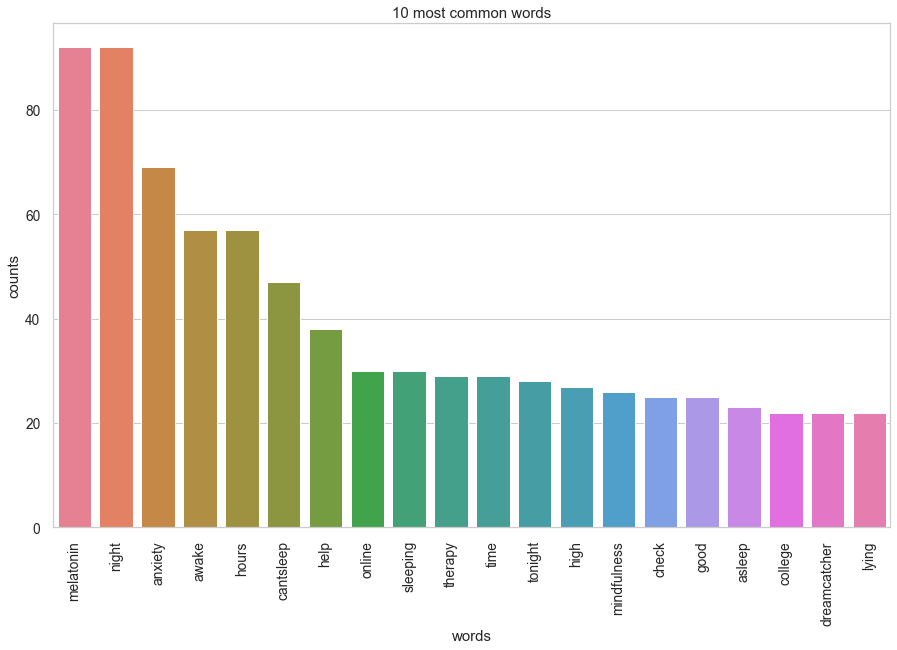

In [114]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text 

sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
#CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(array_example)) 
count_vectorizer = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(['make','know','skype','twitter','oh','taking','took','sleep','insomnia','basically','슈가','amp','got','going','gonna','pm','need','bed','day','jk','dont','hmm','wtf','ive','im','just','al','like']))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sleepgroup['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

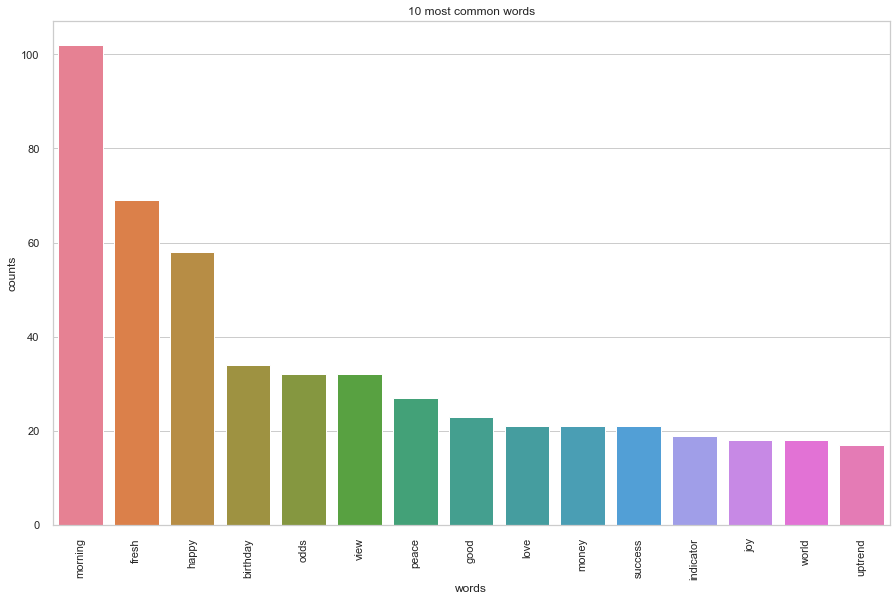

In [317]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text 

sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
#CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(array_example)) 
count_vectorizer = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(['sjogrens','did','havent','little','new','make','know','skype','twitter','oh','taking','took','sleep','insomnia','basically','슈가','amp','got','going','gonna','pm','need','bed','day','jk','dont','hmm','wtf','ive','im','just','al','like']))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(happygroup['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Top Modelling for Expereinces 

In [299]:
from nltk import edit_distance
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import re
import nltk
import os
import json
import matplotlib.pyplot as plt
from copy import deepcopy

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm import tqdm_notebook as tqdm

In [300]:
sleepgroup['text'][580]

'i havent slept good in days i legit had anesthesia earlier and knew id sleep tonight easy ambien no'

In [384]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

#'insomnia','sleep',

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=text.ENGLISH_STOP_WORDS.union(['wide', 'fall', 'time','lets','know','good','snapchat','hz','want','having','jiu','make', 'best','dude','sjogrens','did','havent','little','new','skype','twitter','oh','taking','took','insomnia','basically','슈가','amp','got','going','gonna','pm','need','bed','day','jk','dont','hmm','wtf','ive','im','just','al','like','lol']))
doc_term_matrix = count_vect.fit_transform(sleepgroup['text'].values.astype('U'))

In [385]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=123)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=123)

In [386]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

video
internet
bugger
huge
scary
close
normal
remembered
short
ill


In [387]:
first_topic = LDA.components_[0]

In [388]:
top_topic_words = first_topic.argsort()[-10:]

In [389]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

late
health
overcoming
try
hours
melatonin
help
cantsleep
night
sleep


In [390]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 10 words for topic #0:
['relatable', 'gummies', 'sounds', 'sleeplessness', 'rest', 'late', 'health', 'overcoming', 'try', 'hours', 'melatonin', 'help', 'cantsleep', 'night', 'sleep']


Top 10 words for topic #1:
['tired', 'fun', 'sufferers', 'health', 'asleep', 'stay', 'feel', 'brain', 'nights', 'really', 'night', 'days', 'dreamcatcher', 'sleep', 'melatonin']


Top 10 words for topic #2:
['chronicillness', 'lupus', 'autoimmune', 'year', 'regularly', 'pull', 'tonight', 'school', 'senior', 'college', 'high', 'sleeping', 'melatonin', 'hours', 'sleep']


Top 10 words for topic #3:
['bigboi', 'living', 'hours', 'awake', 'asleep', 'depression', 'ill', 'morning', 'cantsleep', 'visit', 'anxiety', 'mindfulness', 'sleep', 'therapy', 'online']


Top 10 words for topic #4:
['hypnosis', 'video', 'yoga', 'tired', 'music', 'faithless', 'stress', 'melatonin', 'youtube', 'scrolling', 'lying', 'check', 'awake', 'anxiety', 'sleep']




In [575]:
#Mild
#Trying hard - Looking for help
# Top 10 words for topic #0:
# ['relatable', 'gummies', 'sounds', 'sleeplessness', 'rest', 'late', 'health', 'overcoming', 'try', 'hours', 'melatonin', 'help', 'cantsleep', 'night', 'sleep']

#Normal
#Not trying any remedies - Just express Feelings
# Top 10 words for topic #1:
# ['tired', 'fun', 'sufferers', 'health', 'asleep', 'stay', 'feel', 'brain', 'nights', 'really', 'night', 'days', 'dreamcatcher', 'sleep', 'melatonin']

#Severe
#Not trying any remedies - Worried about next day
# Top 10 words for topic #2:
# ['chronicillness', 'lupus', 'autoimmune', 'year', 'regularly', 'pull', 'tonight', 'school', 'senior', 'college', 'high', 'sleeping', 'melatonin', 'hours', 'sleep']

#Moderate
#Trying Therapies including drugs
# Top 10 words for topic #3:
# ['bigboi', 'living', 'hours', 'awake', 'asleep', 'depression', 'ill', 'morning', 'cantsleep', 'visit', 'anxiety', 'mindfulness', 'sleep', 'therapy', 'online']


#Moderate
#Trying Home or Drug remedies
# Top 10 words for topic #4:
# ['hypnosis', 'video', 'yoga', 'tired', 'music', 'faithless', 'stress', 'melatonin', 'youtube', 'scrolling', 'lying', 'check', 'awake', 'anxiety', 'sleep']

In [391]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(936, 5)

In [392]:
sleepgroup['Topic'] = topic_values.argmax(axis=1)

In [393]:
sleepgroup

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group,Topic,severity,Remedies,Trying Home remedies with drugs
0,asleep at am and up am espresso shots anyone i...,2020-07-10 15:57:40+00:00,,1658,neutral,male,Individual,>=40,awe,no,0,3,Normal,Not trying any remedies - Calm,No
1,and with these fridaythoughts i say goodbye fo...,2020-07-10 15:30:57+00:00,Desk,240,negative,male,Individual,>=40,sadness,no,0,1,Normal,Not trying any remedies - Calm,No
2,cant sleep try a bigger bed sleep insomnia,2020-07-10 15:30:40+00:00,United Kingdom,3908,neutral,female,Individual,>=40,amusement,no,0,0,Moderate,Trying Therapies remedies including drugs,No
3,honestly being in the dc discord on the last m...,2020-07-10 14:56:22+00:00,#Clexakru #Cloneclub,1100,positive,female,Individual,<=18,awe,no,0,4,Moderate,Trying Therapies remedies including drugs,No
4,news check our latest data release more than a...,2020-07-10 14:51:47+00:00,"Hinxton, Cambridge, UK",102,positive,male,Individual,>=40,anger,no,0,3,Mild,Not trying any remedies - Struggling,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,insomnia is a very common disease sleepdisorde...,2020-06-30 21:04:28+00:00,"New Delhi, India",997,negative,male,Individual,<=18,negative-fear,yes,0,0,Moderate,Not trying any remedies - Looking for help,Yes
932,today is the last day to catch the specials on...,2020-06-30 21:01:47+00:00,"Brunswick, GA",647,positive,male,Individual,<=18,awe,no,0,4,Mild,Not trying any remedies - Struggling,No
933,lindahoguttu my dear lindahoguttu how are you ...,2020-06-30 20:17:53+00:00,Kenya,1196,neutral,male,Individual,19-29,sadness,no,0,0,severe,Not trying any remedies - Struggling,No
934,just wrote about crafting processes being calm...,2020-06-30 20:02:51+00:00,"Broadstairs, England",588,positive,female,Individual,19-29,awe,no,0,2,Mild,Not trying any remedies - Struggling,No


In [394]:
def label_severity(row):
    if row['Topic'] == 0:
        return "Moderate"
    elif row['Topic'] == 1:
        return "Normal"
    elif row['Topic'] == 2:
        return "Severe"
    elif row['Topic'] == 3:
        return "Severe"
    elif row['Topic'] == 4:
        return "Mild"

In [395]:
def label_Remedies(row):
    if row['Topic'] == 0:
        return "No clarity on remedies - Looking for help" 
    elif row['Topic'] == 1:
        return "Not much bothered - Just express Insomniac Feelings"
    elif row['Topic'] == 2:
        return "Not trying any remedies - Worried about next day"
    elif row['Topic'] == 3:
        return "Trying Therapies including drugs"
    elif row['Topic'] == 4:
        return "Trying Home or Drug remedies"

In [396]:
sleepgroup['severity']=sleepgroup.apply (lambda row: label_severity(row), axis=1)

In [397]:
sleepgroup['Remedies']=sleepgroup.apply (lambda row: label_Remedies(row), axis=1)

In [398]:
sleepgroup[1:]

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group,Topic,severity,Remedies,Trying Home remedies with drugs
1,and with these fridaythoughts i say goodbye fo...,2020-07-10 15:30:57+00:00,Desk,240,negative,male,Individual,>=40,sadness,no,0,1,Normal,Not much bothered - Just express Insomniac Fee...,No
2,cant sleep try a bigger bed sleep insomnia,2020-07-10 15:30:40+00:00,United Kingdom,3908,neutral,female,Individual,>=40,amusement,no,0,0,Moderate,No clarity on remedies - Looking for help,No
3,honestly being in the dc discord on the last m...,2020-07-10 14:56:22+00:00,#Clexakru #Cloneclub,1100,positive,female,Individual,<=18,awe,no,0,4,Mild,Trying Home or Drug remedies,No
4,news check our latest data release more than a...,2020-07-10 14:51:47+00:00,"Hinxton, Cambridge, UK",102,positive,male,Individual,>=40,anger,no,0,3,Severe,Trying Therapies including drugs,No
5,ukcovidstats go diy grounding matsheetpillow a...,2020-07-10 14:12:19+00:00,,0,neutral,male,Individual,>=40,awe,yes,0,0,Moderate,No clarity on remedies - Looking for help,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,insomnia is a very common disease sleepdisorde...,2020-06-30 21:04:28+00:00,"New Delhi, India",997,negative,male,Individual,<=18,negative-fear,yes,0,0,Moderate,No clarity on remedies - Looking for help,Yes
932,today is the last day to catch the specials on...,2020-06-30 21:01:47+00:00,"Brunswick, GA",647,positive,male,Individual,<=18,awe,no,0,4,Mild,Trying Home or Drug remedies,No
933,lindahoguttu my dear lindahoguttu how are you ...,2020-06-30 20:17:53+00:00,Kenya,1196,neutral,male,Individual,19-29,sadness,no,0,0,Moderate,No clarity on remedies - Looking for help,No
934,just wrote about crafting processes being calm...,2020-06-30 20:02:51+00:00,"Broadstairs, England",588,positive,female,Individual,19-29,awe,no,0,2,Severe,Not trying any remedies - Worried about next day,No


In [399]:
sleepgroup=sleepgroup.fillna(value="")
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "TempTopics_"+timestr+".csv"
sleepgroup.to_csv(fileName, index=False)

## Topic Modeling for Happy Tweets

In [400]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

#'insomnia','sleep',

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words=text.ENGLISH_STOP_WORDS.union(['rt','skype','twitter','oh','taking','took','insomnia','basically','슈가','amp','got','going','gonna','pm','need','bed','day','jk','dont','hmm','wtf','ive','im','just','al','like']))
doc_term_matrix = count_vect.fit_transform(happygroup['text'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

first_topic = LDA.components_[0]

top_topic_words = first_topic.argsort()[-10:]

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')



Top 10 words for topic #0:
['bitcoin', 'someday', 'explore', 'wish', 'smile', 'week', 'joy', 'world', 'free', 'money', 'new', 'happy', 'wealth', 'fresh', 'morning']


Top 10 words for topic #1:
['times', 'shower', 'financial', 'lovely', 'youre', 'changes', 'life', 'crazy', 'night', 'thala', 'people', 'joy', 'birthday', 'happy', 'morning']


Top 10 words for topic #2:
['price', 'july', 'moving', 'average', 'downtrend', 'june', 'love', 'indicators', 'uptrend', 'indicator', 'birthday', 'peace', 'happy', 'view', 'odds']


Top 10 words for topic #3:
['beans', 'went', 'youtube', 'cold', 'fruit', 'hope', 'happy', 'green', 'walk', 'home', 'business', 'good', 'start', 'fresh', 'morning']


Top 10 words for topic #4:
['goodmorning', 'tacotuesday', 'breakfast', 'world', 'wealth', 'life', 'feeling', 'new', 'time', 'great', 'money', 'good', 'success', 'fresh', 'morning']




## END

## Decision Tree

In [401]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import log_loss, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
#from sklearn.externals import joblib
import pickle as pkl

import visualize
import metrics_plots
#from pipeline_components import DataSampleDropper, DataFrameSelector, DataScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, os, pathlib
import time as timelib
from sklearn import tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import log_loss, f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn import preprocessing

In [402]:
tweetsCleaned_indv_grp0_cleaned=sleepgroup.drop(['Topic','tweet_classification','group','created_at','location','friends_count'],axis=1)

In [403]:
tweetsCleaned_indv_grp0_cleaned.drop_duplicates(keep=False,inplace=True) 

In [404]:
tweetsCleaned_indv_grp0_cleaned

,text,sentiment,gender,age,emotion,sufferingChronic,severity,Remedies,Trying Home remedies with drugs
0,asleep at am and up am espresso shots anyone i...,neutral,male,>=40,awe,no,Severe,Trying Therapies including drugs,No
1,and with these fridaythoughts i say goodbye fo...,negative,male,>=40,sadness,no,Normal,Not much bothered - Just express Insomniac Fee...,No
3,honestly being in the dc discord on the last m...,positive,female,<=18,awe,no,Mild,Trying Home or Drug remedies,No
4,news check our latest data release more than a...,positive,male,>=40,anger,no,Severe,Trying Therapies including drugs,No
5,ukcovidstats go diy grounding matsheetpillow a...,neutral,male,>=40,awe,yes,Moderate,No clarity on remedies - Looking for help,No
...,...,...,...,...,...,...,...,...,...
931,insomnia is a very common disease sleepdisorde...,negative,male,<=18,negative-fear,yes,Moderate,No clarity on remedies - Looking for help,Yes
932,today is the last day to catch the specials on...,positive,male,<=18,awe,no,Mild,Trying Home or Drug remedies,No
933,lindahoguttu my dear lindahoguttu how are you ...,neutral,male,19-29,sadness,no,Moderate,No clarity on remedies - Looking for help,No
934,just wrote about crafting processes being calm...,positive,female,19-29,awe,no,Severe,Not trying any remedies - Worried about next day,No


In [405]:
sleepAnalysis=tweetsCleaned_indv_grp0_cleaned.fillna(value="")
sleepAnalysisF = sleepAnalysis[['sentiment','gender','age','emotion','sufferingChronic','severity','Remedies']]

In [406]:
sleepAnalysisF.drop_duplicates(keep=False,inplace=True) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [407]:
len(sleepAnalysisF) 

182

In [408]:
sleepAnalysis=tweetsCleaned_indv_grp0_cleaned.fillna(value="")
timestr = time.strftime("%Y%m%d-%H%M%S")
fileName = "sleepAnalysis_ReadyModel_"+timestr+".csv"
sleepAnalysisF.to_csv(fileName, index=False)

## Analysis further

In [409]:
sleepModelDecision = sleepgroup.append(happygroup, ignore_index=True)

In [410]:
sleepModelDecision.drop_duplicates(keep=False,inplace=True) 

In [411]:
from sklearn.model_selection import train_test_split
sleepModelDecision

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,group,Topic,severity,Remedies,Trying Home remedies with drugs
0,asleep at am and up am espresso shots anyone i...,2020-07-10 15:57:40+00:00,,1658,neutral,male,Individual,>=40,awe,no,0,3.0,Severe,Trying Therapies including drugs,No
1,and with these fridaythoughts i say goodbye fo...,2020-07-10 15:30:57+00:00,Desk,240,negative,male,Individual,>=40,sadness,no,0,1.0,Normal,Not much bothered - Just express Insomniac Fee...,No
2,cant sleep try a bigger bed sleep insomnia,2020-07-10 15:30:40+00:00,United Kingdom,3908,neutral,female,Individual,>=40,amusement,no,0,0.0,Moderate,No clarity on remedies - Looking for help,No
3,honestly being in the dc discord on the last m...,2020-07-10 14:56:22+00:00,#Clexakru #Cloneclub,1100,positive,female,Individual,<=18,awe,no,0,4.0,Mild,Trying Home or Drug remedies,No
4,news check our latest data release more than a...,2020-07-10 14:51:47+00:00,"Hinxton, Cambridge, UK",102,positive,male,Individual,>=40,anger,no,0,3.0,Severe,Trying Therapies including drugs,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,our next instagram live is this wednesday at p...,2020-07-06 19:01:44+00:00,"Los Angeles, CA",624,positive,male,Individual,30-39,negative-fear,no,1,NaN,NaN,NaN,NaN
1283,happy motivational monday from sodoro mooney a...,2020-07-06 19:25:19+00:00,"Omaha, NE",98,positive,male,Individual,>=40,awe,no,1,NaN,NaN,NaN,NaN
1284,trust your inner strength for clarity and allo...,2020-07-06 19:26:28+00:00,,1580,neutral,female,Individual,>=40,awe,no,1,NaN,NaN,NaN,NaN
1285,the most valuable quality of a leader\nintegri...,2020-07-06 19:27:25+00:00,,33,positive,male,Individual,<=18,awe,no,1,NaN,NaN,NaN,NaN


## Feature Extraction Pipelines

In [158]:
import pip
pip.main(['install', '--user', 'neighbors'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not find a version that satisfies the requirement neighbors (from versions: none)
ERROR: No matching distribution found for neighbors


1

In [159]:
import numpy as np
from sklearn import metrics

%matplotlib inline
%run plot_learning_curve

%matplotlib inline

import time
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import random

import re
#from preprocess import * 
#from custom_preprocessing import CustomPreProcessing
#from custom_preprocessing import PreProcessing
#from class_metric import Metrics
# from googletrans import Translator
import sklearn
from sklearn.utils import class_weight
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import decomposition, ensemble
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score

from custom_preprocessing import CustomPreProcessing
from custom_preprocessing import PreProcessing
from class_metric import Metrics

from sklearn import tree
from sklearn import neighbors


import itertools
#from textblob import TextBlob 
import seaborn as sns
# import xgboost as xgb
# from xgboost import XGBClassifier
sns.set(style="darkgrid")


import string
import fasttext
import fasttext.util
from tqdm import tqdm

In [160]:
# ---- Create object to preprocess the text 
preprocess = CustomPreProcessing()
preproc = PreProcessing()
Metric = Metrics()

Welcome in this custom preprocessing class
        
Welcome in the preprocessing


In [161]:

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [162]:
score_metrics = {'acc': accuracy_score,
               'balanced_accuracy': balanced_accuracy_score,
               'prec': precision_score,
               'recall': recall_score,
               'f1-score': f1_score,
               'tp': tp, 'tn': tn,
               'fp': fp, 'fn': fn,
               'cohens_kappa':cohen_kappa_score,
               'matthews_corrcoef':matthews_corrcoef,
               "roc_auc":roc_auc_score}

In [163]:
# split the dataset into training and validation datasets 
# ML classic 
train_x_sw, valid_x_sw, y_train_sw, y_valid_sw = model_selection.train_test_split(sleepModelDecision['text'],sleepModelDecision['group'], random_state=42, stratify=sleepModelDecision['group'], test_size=0.2)

# For Embeddings
train_x, valid_x, y_train, y_valid = model_selection.train_test_split(sleepModelDecision['text'],sleepModelDecision['group'], random_state=42, stratify=sleepModelDecision['group'], test_size=0.2)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y_sw = encoder.fit_transform(y_train_sw)
valid_y_sw = encoder.fit_transform(y_valid_sw)
train_y = encoder.fit_transform(y_train)
valid_y = encoder.fit_transform(y_valid)

In [164]:
# Compute the class weight with sklearn 
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1], y=187     0
155     0
814     0
860     0
473     0
       ..
1178    1
1214    1
0       0
684     0
411     0
Name: group, Length: 952, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [165]:
print(*[f'Class weight: {round(i[0],4)}\tclass: {i[1]}' for i in zip(class_weights, np.unique(y_train))], sep='\n')

Class weight: 0.681	class: 0
Class weight: 1.8814	class: 1


In [166]:
# Determined if the dataset is balanced or imbalanced 
ratio = np.min(sleepModelDecision.group.value_counts()) / np.max(sleepModelDecision.group.value_counts())
if ratio > 0.1:      # Ratio 1:10 -> limite blanced / imbalanced 
    balanced = True
    print(f"\nThe dataset is balanced (ratio={round(ratio, 3)})")
else:
    balanced = False
    print(f"\nThe dataset is imbalanced (ratio={round(ratio, 3)})")
    #from imblearn.over_sampling import ADASYN
    # put class for debalanced data 
    # in progress


The dataset is balanced (ratio=0.363)


In [167]:
# Keep the unique label corresponding to their encoding correspondance
labels = sleepModelDecision.group.unique()
test=pd.DataFrame(data=np.transpose([labels,encoder.fit_transform(labels)]), columns=["labels", "encoding"]).sort_values(by=["encoding"])
labels=test.labels.tolist()
if any([0,1]) in labels and len(labels)==2:
    labels[labels.index(0)] = "Insomnia"
    labels[labels.index(1)] = "No Insomnia"


In [168]:
df_results = pd.DataFrame()

In [169]:
df_results

""


## One-Hot encoding (CountVectorizing)

In [202]:

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(sleepModelDecision['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x_sw)

In [203]:
xtrain_count

<952x4149 sparse matrix of type '<class 'numpy.int64'>'
	with 13233 stored elements in Compressed Sparse Row format>

In [204]:
xvalid_count =  count_vect.transform(valid_x_sw)

In [205]:
xvalid_count

<239x4149 sparse matrix of type '<class 'numpy.int64'>'
	with 3428 stored elements in Compressed Sparse Row format>

In [219]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=10000)
tfidf_vect.fit(sleepModelDecision['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x_sw)
xvalid_tfidf =  tfidf_vect.transform(valid_x_sw)
#print("word level tf-idf done")

In [220]:
xtrain_tfidf

<952x4149 sparse matrix of type '<class 'numpy.float64'>'
	with 13233 stored elements in Compressed Sparse Row format>

In [221]:
xvalid_tfidf

<239x4149 sparse matrix of type '<class 'numpy.float64'>'
	with 3428 stored elements in Compressed Sparse Row format>

In [222]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=10000)
tfidf_vect_ngram.fit(sleepModelDecision['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x_sw)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x_sw)
#print("ngram level tf-idf done")


In [223]:
xtrain_tfidf_ngram

<952x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 13386 stored elements in Compressed Sparse Row format>

In [224]:
xvalid_tfidf_ngram

<239x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3277 stored elements in Compressed Sparse Row format>

In [225]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',  ngram_range=(2,3), max_features=10000) #token_pattern=r'\w{1,}',
tfidf_vect_ngram_chars.fit(sleepModelDecision['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x_sw) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x_sw) 
#print("characters level tf-idf done")

In [226]:
xtrain_tfidf_ngram_chars

<952x6414 sparse matrix of type '<class 'numpy.float64'>'
	with 133031 stored elements in Compressed Sparse Row format>

In [227]:
xvalid_tfidf_ngram_chars

<239x6414 sparse matrix of type '<class 'numpy.float64'>'
	with 34291 stored elements in Compressed Sparse Row format>

In [502]:
features = tfidf_vect_ngram_chars.fit_transform(sleepModelDecision['text']).toarray()
labels = sleepModelDecision.Remedies
features.shape

(1191, 6414)

## Model

In [210]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
# !unzip crawl-300d-2M-subword.zip

In [211]:
# pretrained = fasttext.FastText.load_model('../Pretrained-models/crawl-300d-2M-subword.bin')

In [212]:

def metrics_ML(clf, X, Y, X_test, Y_test, gb=False):
    '''
    Function to compute a classifier model
    @param X: (matrix) training x data
    @param y: (list) train labels - ground truth
    @param x_test: (matrix) matrix of test x data
    @param y_test: (list) list of test labels
    @return model_NB: (model) train model
    @return pred: (list) list of predicted labels
    @return end: (float) fit time of the model
    @return model.score(): (float) accuracy of the model
    '''
    model_, pred, time_train, score_ = classifier_model(clf, X, Y, X_test, Y_test)
    print("Execution time : %.3f s" %(time_train))
    print(f"Score : {round(100*score_,2)} %" )
    print("\nClassification Report\n")
    print(classification_report(Y_test, pred, target_names=labels))
    cm = confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix\n")
    Metric.plot_confusion_matrix(cm, labels)
    print("\n")
    Metric.precision_recall_curve(model_,  X_test, Y_test, labels, gb=gb)
    print("\n")
    Metric.roc_auc_curve(model_,  X_test, Y_test, labels, gb=gb)
    print(f"\n\nCohen's kappa: {round(100*cohen_kappa_score(Y_test,  pred),2)}%\n\n")

In [213]:
def classifier_model(clf, X, y, x_test, y_test):
    '''
    Function to compute a classifier model
    @param clf: (model) classifier model
    @param X: (matrix) training x data
    @param y: (list) train labels - ground truth
    @param x_test: (matrix) matrix of test x data
    @param y_test: (list) list of test labels
    @return model_NB: (model) train model
    @return pred: (list) list of predicted labels
    @return end: (float) fit time of the model
    @return model.score(): (float) accuracy of the model
    '''
    
    start = time.time()
    clf.fit(X, y)
    end = time.time() - start
    pred = clf.predict(x_test)
    
    #accuracy = accuracy_score(y_test, pred)
    
    return clf, pred, end, clf.score(x_test, y_test)#, accuracy


Multinomial Naive Bayes for One-Hot encoding

Execution time : 0.007 s
Score : 91.21 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.92      0.96      0.94       175
 No Insomnia       0.88      0.78      0.83        64

    accuracy                           0.91       239
   macro avg       0.90      0.87      0.88       239
weighted avg       0.91      0.91      0.91       239


Confusion Matrix





Model: f1-score=0.826 AUC=0.933




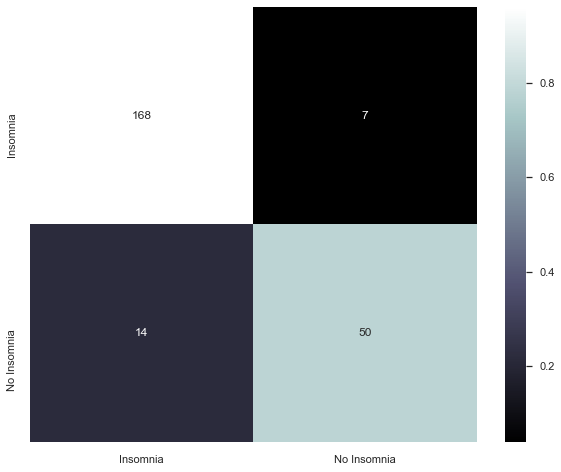

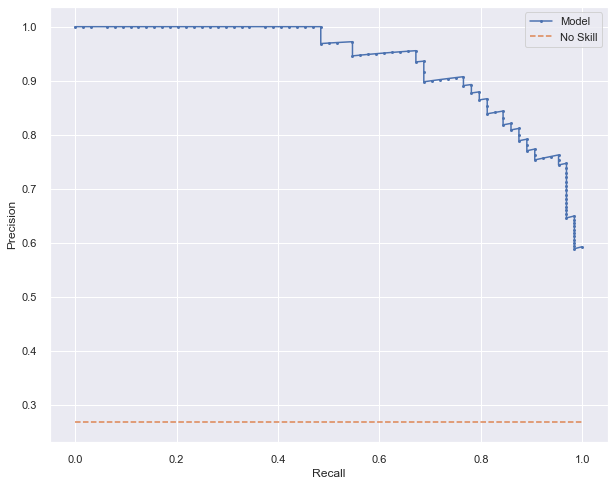




ROC AUC=0.973 



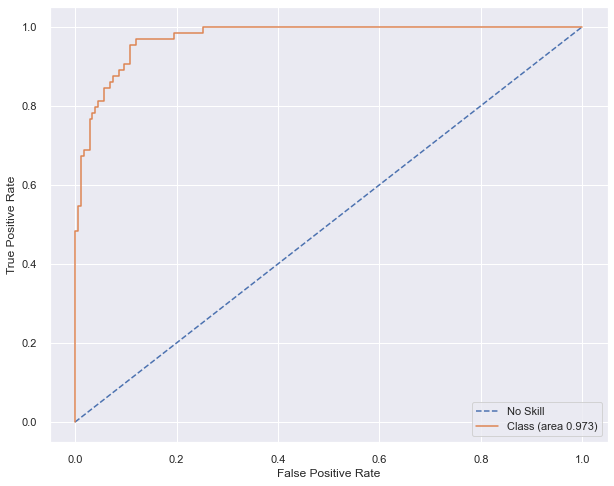



Cohen's kappa: 76.79%




In [214]:
print("\nMultinomial Naive Bayes for One-Hot encoding\n")
metrics_ML(naive_bayes.MultinomialNB(), xtrain_count, train_y_sw, xvalid_count, valid_y_sw, gb=True)


Multinomial Naive Bayes for TF-IDF

Execution time : 0.004 s
Score : 83.26 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.81      1.00      0.90       175
 No Insomnia       1.00      0.38      0.55        64

    accuracy                           0.83       239
   macro avg       0.91      0.69      0.72       239
weighted avg       0.86      0.83      0.80       239


Confusion Matrix





Model: f1-score=0.545 AUC=0.910




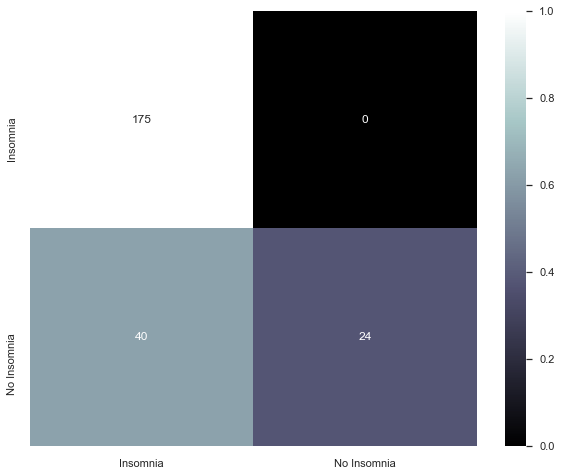

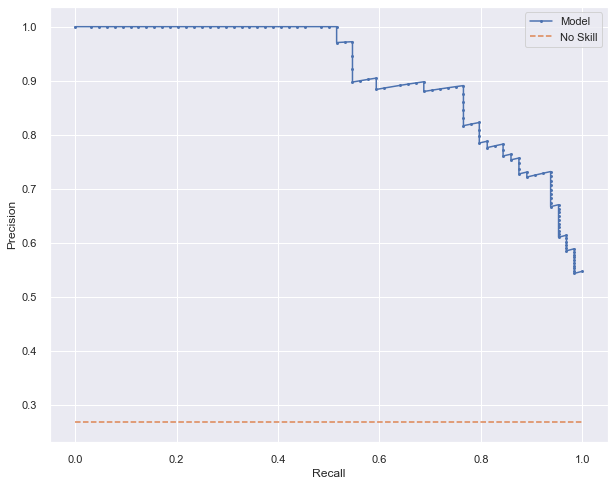




ROC AUC=0.962 



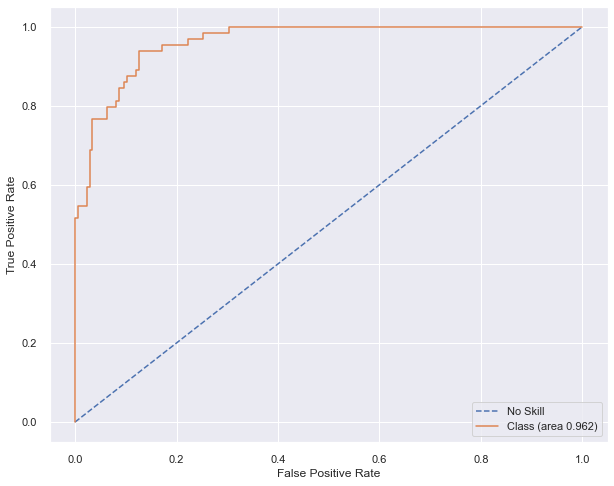



Cohen's kappa: 46.77%




In [229]:
print("\nMultinomial Naive Bayes for TF-IDF\n")
metrics_ML(naive_bayes.MultinomialNB(),  xtrain_tfidf, train_y, xvalid_tfidf, valid_y, gb=True)


Multinomial Naive Bayes for TF-IDF n-grams

Execution time : 0.003 s
Score : 81.59 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.80      1.00      0.89       175
 No Insomnia       1.00      0.31      0.48        64

    accuracy                           0.82       239
   macro avg       0.90      0.66      0.68       239
weighted avg       0.85      0.82      0.78       239


Confusion Matrix





Model: f1-score=0.476 AUC=0.738




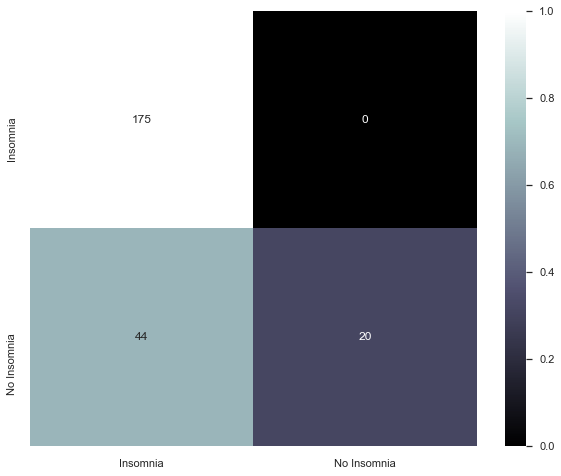

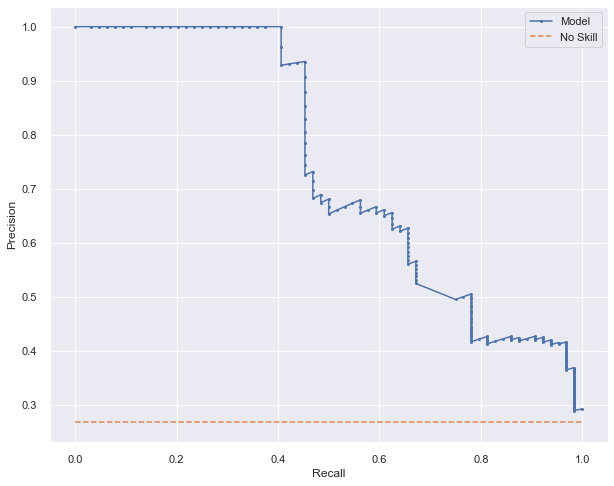




ROC AUC=0.841 



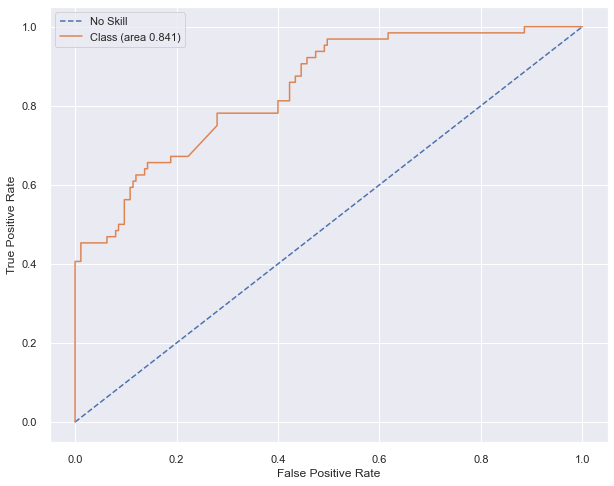



Cohen's kappa: 39.96%




In [230]:
print("\nMultinomial Naive Bayes for TF-IDF n-grams\n")
metrics_ML(naive_bayes.MultinomialNB(),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=True)


Multinomial Naive Bayes for TF-IDF char n-grams

Execution time : 0.002 s
Score : 77.41 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.76      1.00      0.87       175
 No Insomnia       1.00      0.16      0.27        64

    accuracy                           0.77       239
   macro avg       0.88      0.58      0.57       239
weighted avg       0.83      0.77      0.71       239


Confusion Matrix





Model: f1-score=0.270 AUC=0.865




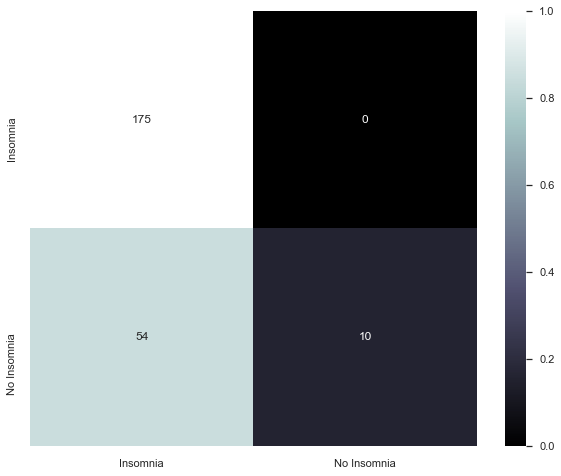

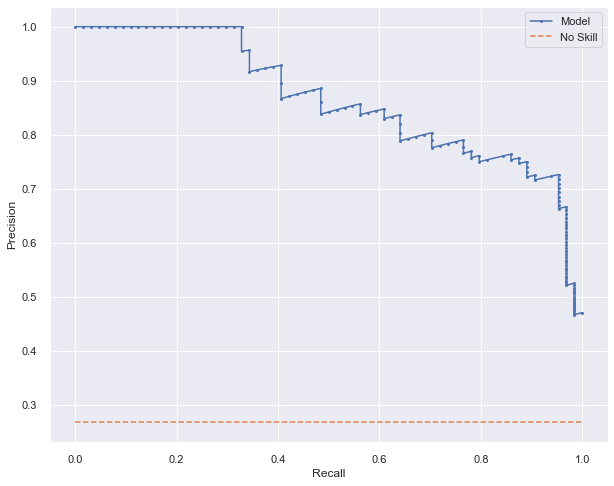




ROC AUC=0.948 



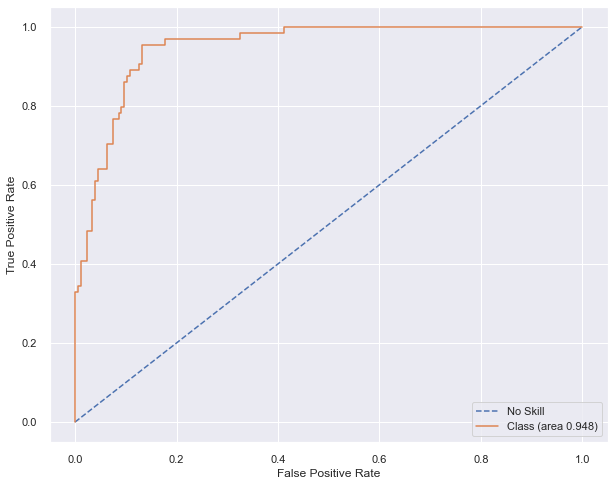



Cohen's kappa: 21.33%




In [231]:
print("\nMultinomial Naive Bayes for TF-IDF char n-grams\n")
metrics_ML(naive_bayes.MultinomialNB(),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=True)


Logistic Regression for One-Hot encoding

Execution time : 0.053 s
Score : 87.87 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.90      0.94      0.92       175
 No Insomnia       0.82      0.70      0.76        64

    accuracy                           0.88       239
   macro avg       0.86      0.82      0.84       239
weighted avg       0.88      0.88      0.88       239


Confusion Matrix





Model: f1-score=0.756 AUC=0.903




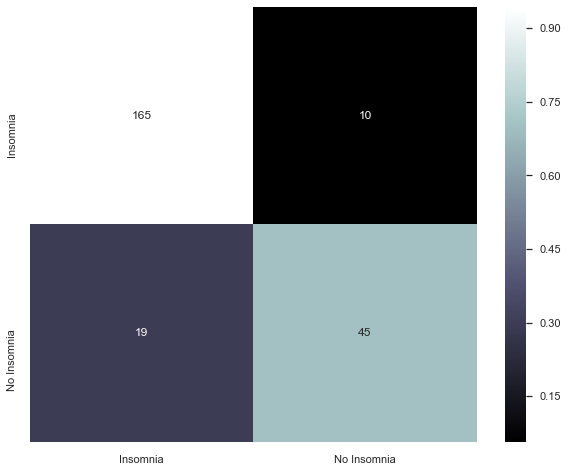

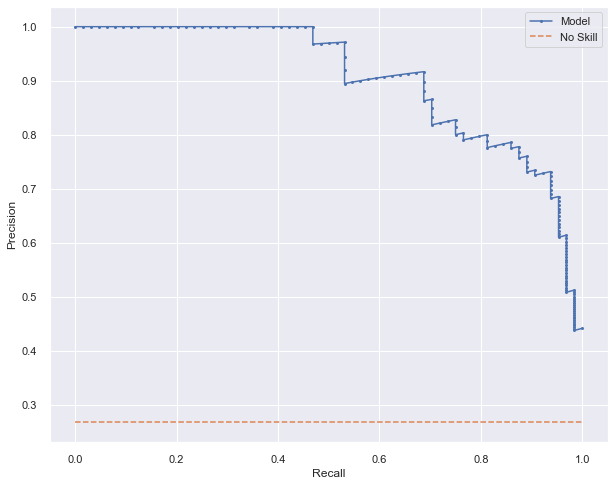




ROC AUC=0.957 



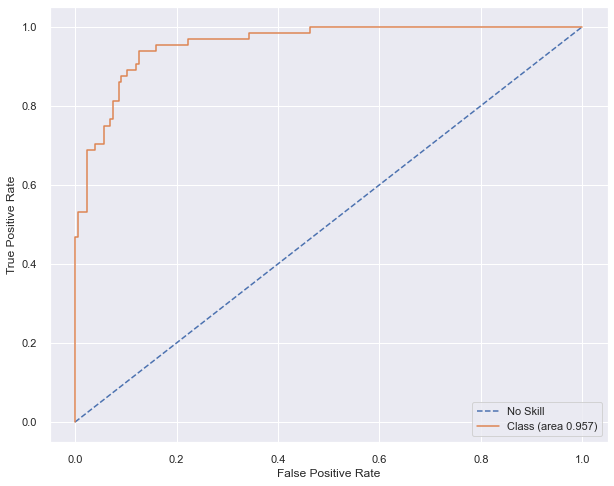



Cohen's kappa: 67.61%




In [232]:
print("\nLogistic Regression for One-Hot encoding\n")
metrics_ML(linear_model.LogisticRegression(max_iter=1000,  random_state=42),  xtrain_count, train_y_sw, xvalid_count, valid_y_sw, gb=True)


Logistic Regression for TF_IDF n-grams

Execution time : 0.059 s
Score : 77.41 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.76      1.00      0.87       175
 No Insomnia       1.00      0.16      0.27        64

    accuracy                           0.77       239
   macro avg       0.88      0.58      0.57       239
weighted avg       0.83      0.77      0.71       239


Confusion Matrix





Model: f1-score=0.270 AUC=0.734




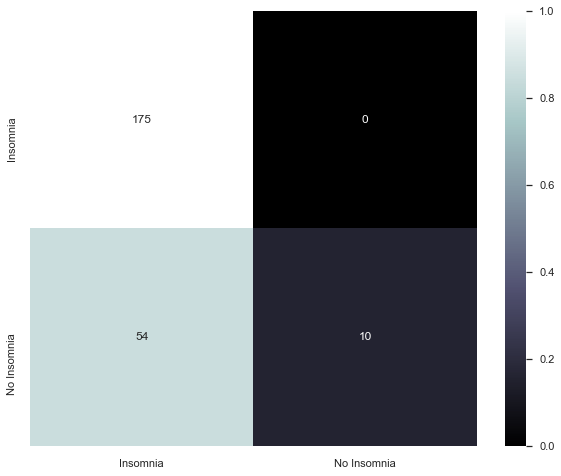

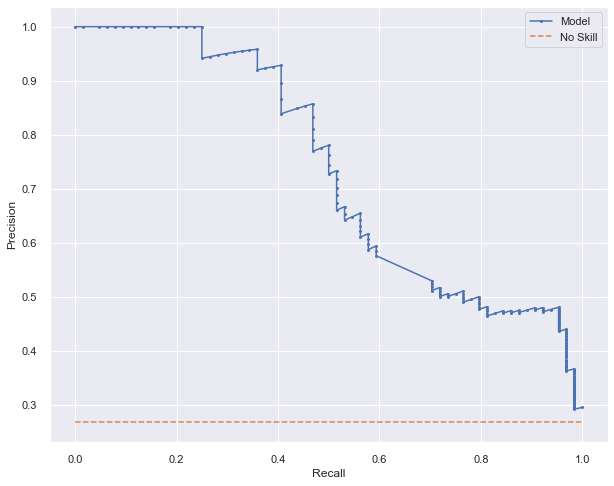




ROC AUC=0.853 



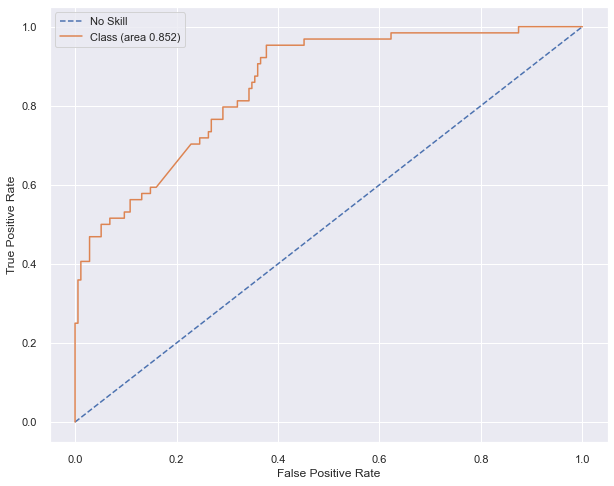



Cohen's kappa: 21.33%




In [233]:
print("\nLogistic Regression for TF_IDF n-grams\n")
metrics_ML(linear_model.LogisticRegression(max_iter=1000,  random_state=42),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=True)


Logistic Regression for TF_IDF char n-grams

Execution time : 0.032 s
Score : 85.77 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.84      0.99      0.91       175
 No Insomnia       0.97      0.48      0.65        64

    accuracy                           0.86       239
   macro avg       0.90      0.74      0.78       239
weighted avg       0.87      0.86      0.84       239


Confusion Matrix





Model: f1-score=0.646 AUC=0.901




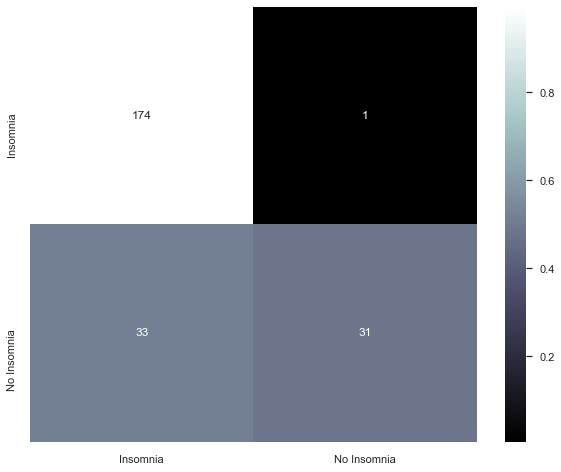

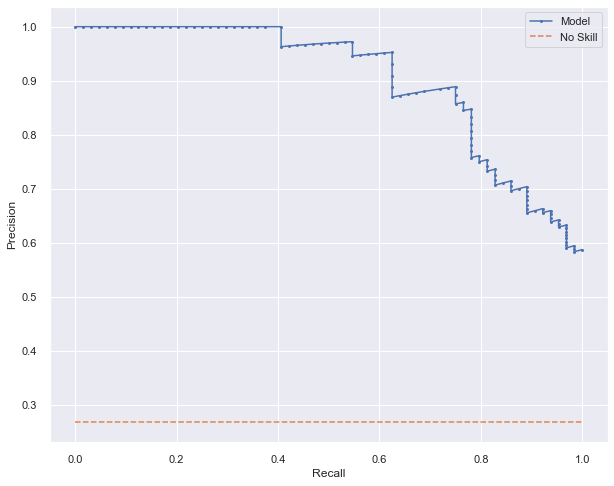




ROC AUC=0.957 



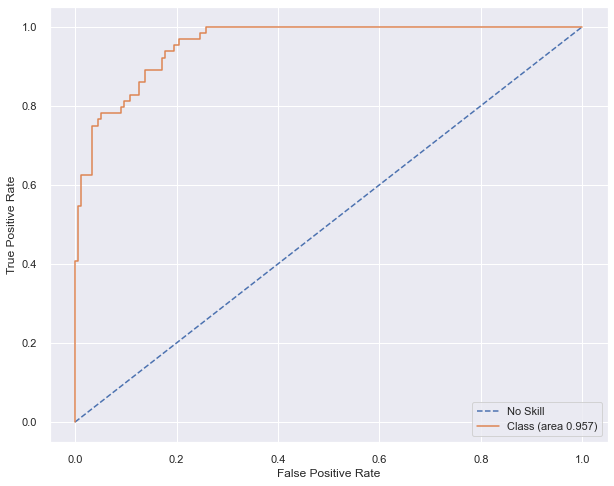



Cohen's kappa: 56.89%




In [234]:
print("\nLogistic Regression for TF_IDF char n-grams\n")
metrics_ML(linear_model.LogisticRegression(max_iter=1000,  random_state=42),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=True)


SVM for One-Hot encoding

Execution time : 0.129 s
Score : 87.45 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.87      0.98      0.92       175
 No Insomnia       0.90      0.59      0.72        64

    accuracy                           0.87       239
   macro avg       0.89      0.79      0.82       239
weighted avg       0.88      0.87      0.87       239


Confusion Matrix





Model: f1-score=0.717 AUC=0.804




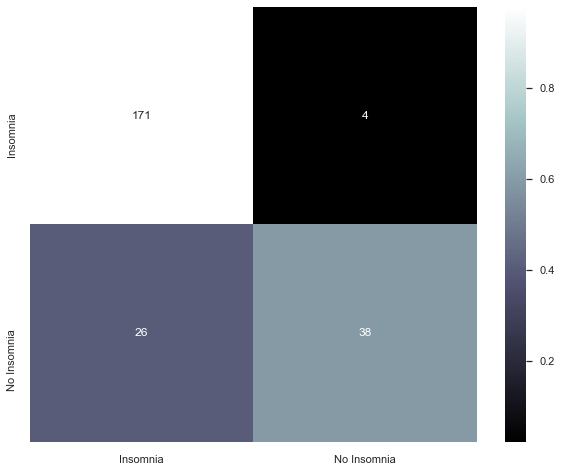

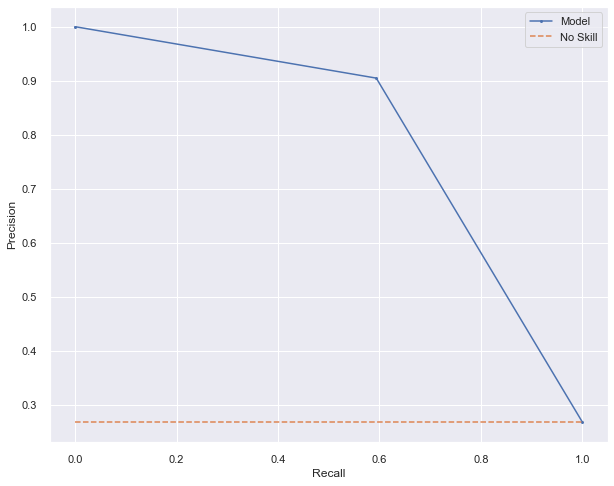




ROC AUC=0.785 



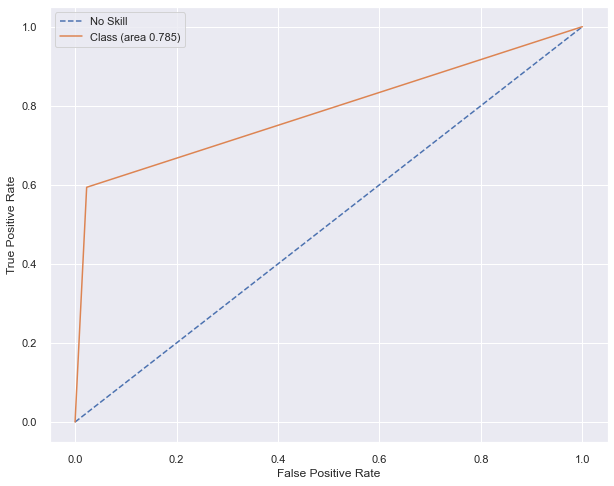



Cohen's kappa: 64.07%




In [235]:
print("\nSVM for One-Hot encoding\n")
metrics_ML(svm.SVC(),  xtrain_count, train_y, xvalid_count, valid_y, gb=False)


SVM for TF_IDF

Execution time : 0.157 s
Score : 85.77 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.84      1.00      0.91       175
 No Insomnia       1.00      0.47      0.64        64

    accuracy                           0.86       239
   macro avg       0.92      0.73      0.77       239
weighted avg       0.88      0.86      0.84       239


Confusion Matrix





Model: f1-score=0.638 AUC=0.806




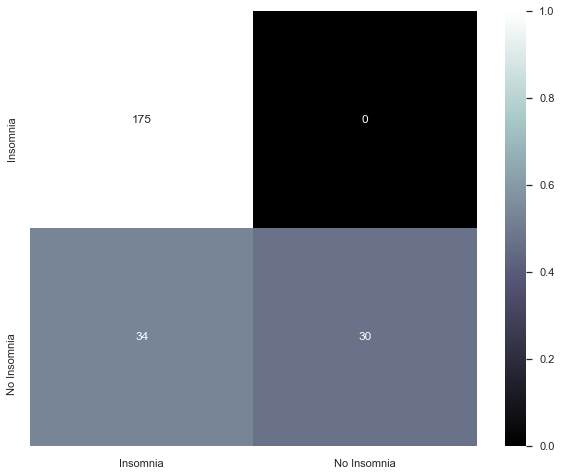

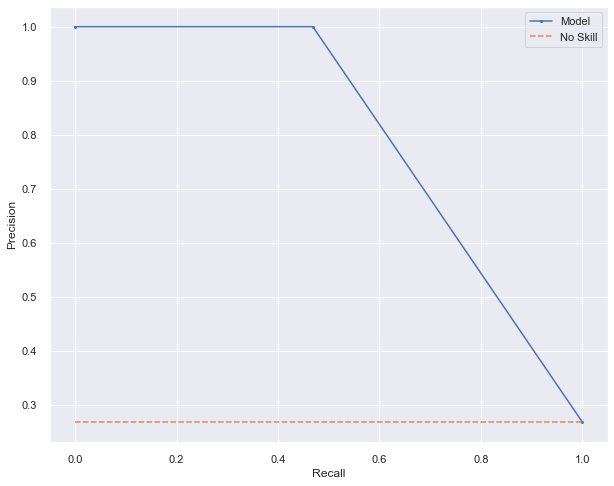




ROC AUC=0.734 



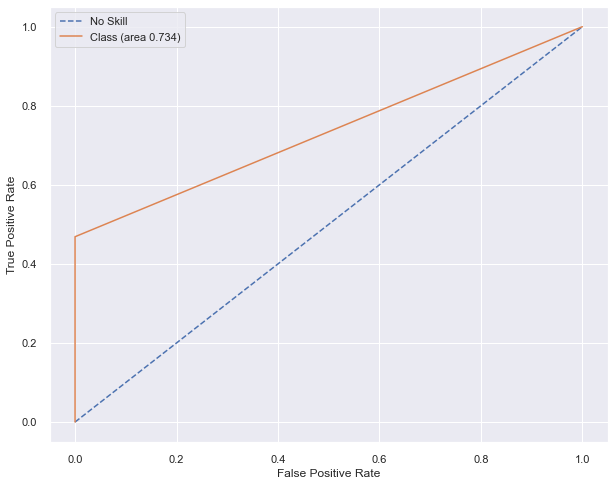



Cohen's kappa: 56.37%




In [236]:
print("\nSVM for TF_IDF\n")
metrics_ML(svm.SVC(),  xtrain_tfidf, train_y, xvalid_tfidf, valid_y, gb=False)


SVM for TF_IDF n-grams

Execution time : 0.106 s
Score : 81.59 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.80      1.00      0.89       175
 No Insomnia       1.00      0.31      0.48        64

    accuracy                           0.82       239
   macro avg       0.90      0.66      0.68       239
weighted avg       0.85      0.82      0.78       239


Confusion Matrix





Model: f1-score=0.476 AUC=0.748




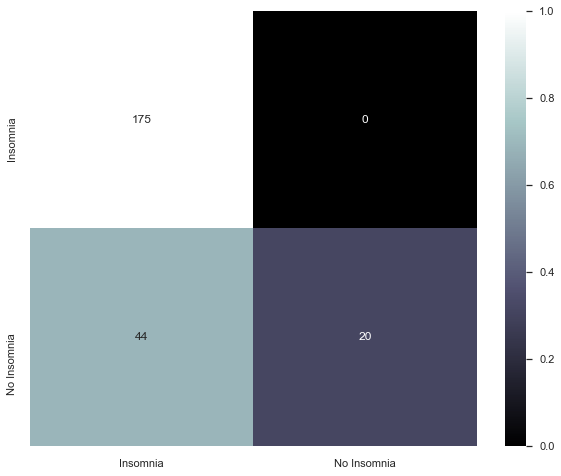

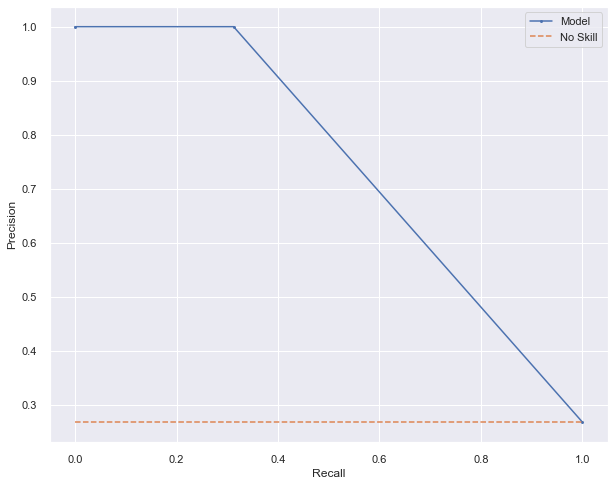




ROC AUC=0.656 



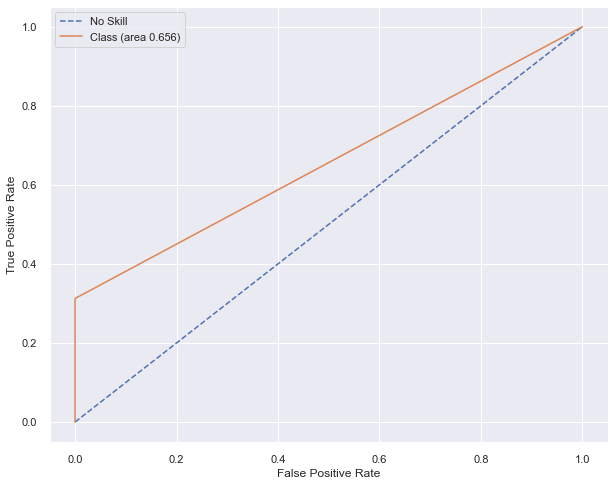



Cohen's kappa: 39.96%




In [237]:
print("\nSVM for TF_IDF n-grams\n")
metrics_ML(svm.SVC(),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=False)


SVM for TF_IDF char n-grams

Execution time : 0.671 s
Score : 88.28 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.87      0.99      0.93       175
 No Insomnia       0.97      0.58      0.73        64

    accuracy                           0.88       239
   macro avg       0.92      0.79      0.83       239
weighted avg       0.89      0.88      0.87       239


Confusion Matrix





Model: f1-score=0.725 AUC=0.832




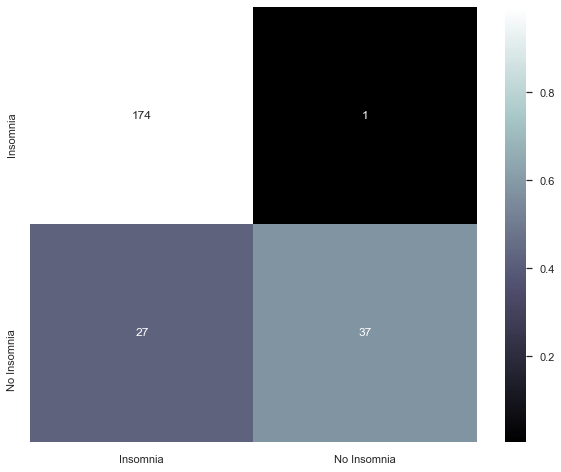

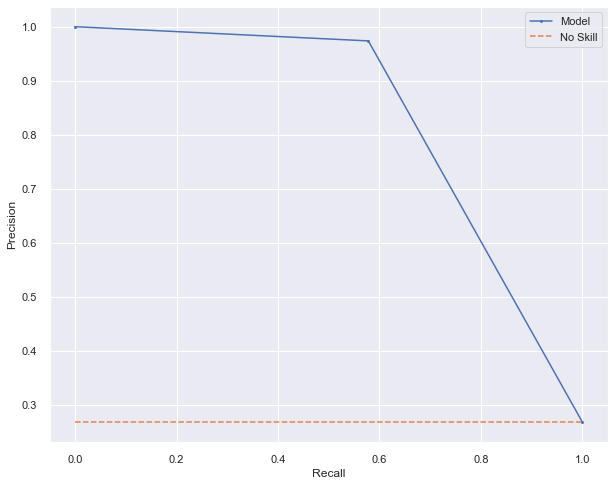




ROC AUC=0.786 



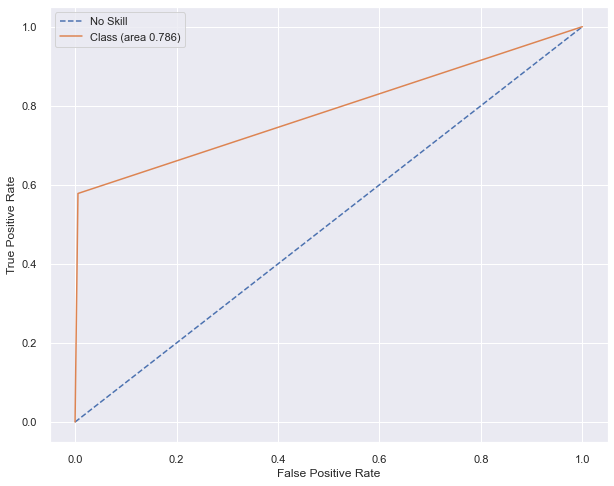



Cohen's kappa: 65.71%




In [238]:
print("\nSVM for TF_IDF char n-grams\n")
metrics_ML(svm.SVC(),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=False)


k-NN for One-Hot encoding

Execution time : 0.001 s
Score : 82.01 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.80      1.00      0.89       175
 No Insomnia       1.00      0.33      0.49        64

    accuracy                           0.82       239
   macro avg       0.90      0.66      0.69       239
weighted avg       0.86      0.82      0.78       239


Confusion Matrix





Model: f1-score=0.494 AUC=0.836




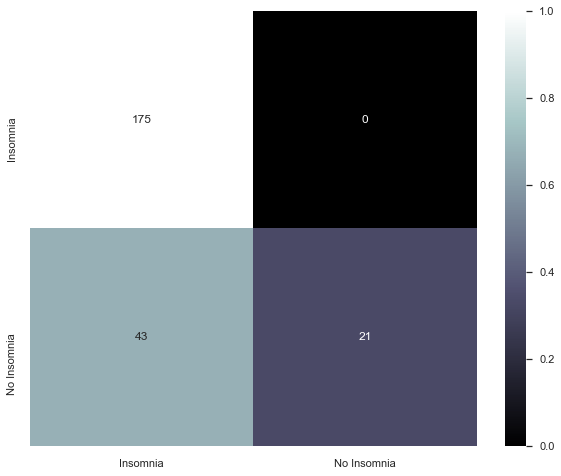

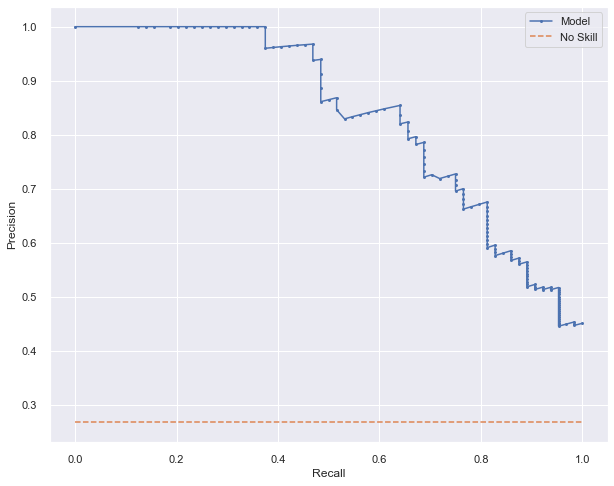




ROC AUC=0.918 



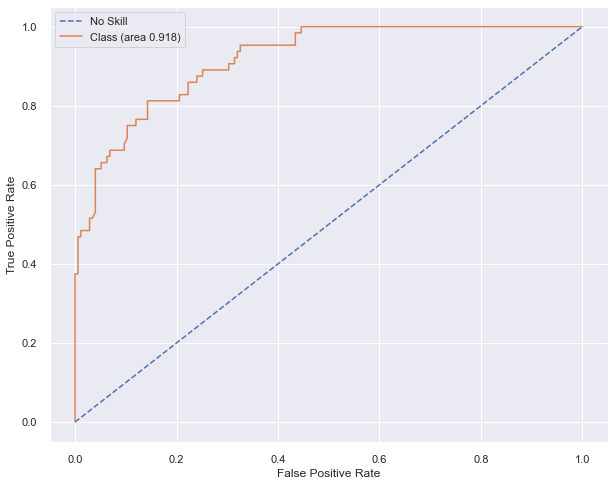



Cohen's kappa: 41.7%




In [239]:
print("\nk-NN for One-Hot encoding\n")
metrics_ML(neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1),  xtrain_count, train_y_sw, xvalid_count, valid_y_sw, gb=True)


k-NN for TF_IDF

Execution time : 0.001 s
Score : 86.19 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.84      0.99      0.91       175
 No Insomnia       0.97      0.50      0.66        64

    accuracy                           0.86       239
   macro avg       0.91      0.75      0.79       239
weighted avg       0.88      0.86      0.85       239


Confusion Matrix





Model: f1-score=0.660 AUC=0.847




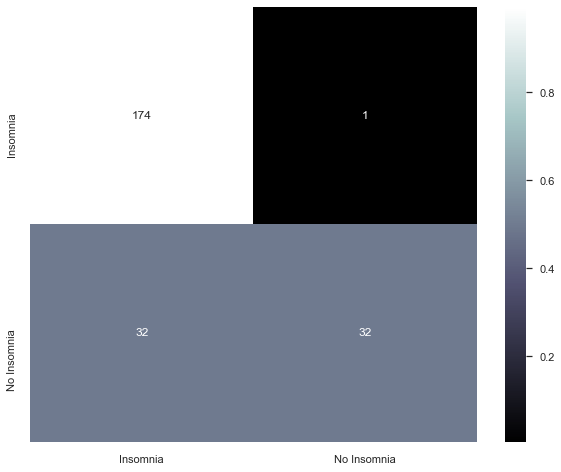

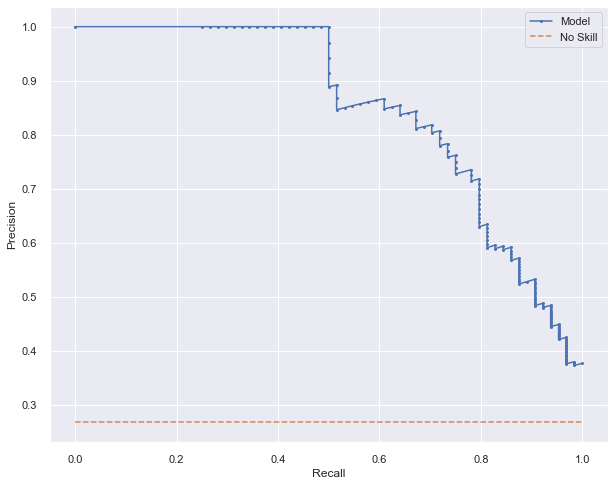




ROC AUC=0.914 



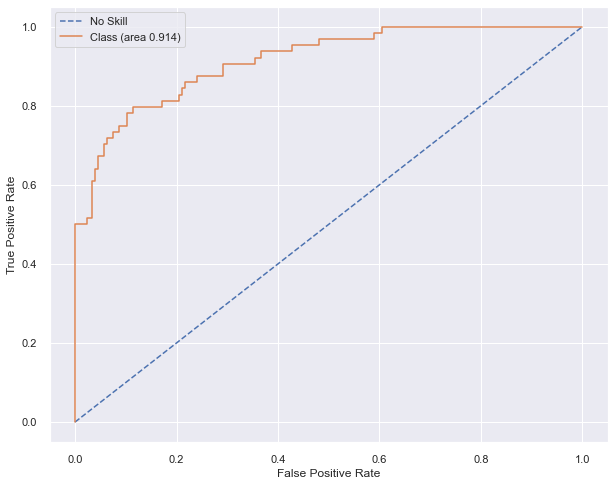



Cohen's kappa: 58.4%




In [240]:
print("\nk-NN for TF_IDF\n")
metrics_ML(neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1),  xtrain_tfidf, train_y, xvalid_tfidf, valid_y, gb=True)


k-NN for TF_IDF n-grams

Execution time : 0.001 s
Score : 77.41 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.76      1.00      0.87       175
 No Insomnia       1.00      0.16      0.27        64

    accuracy                           0.77       239
   macro avg       0.88      0.58      0.57       239
weighted avg       0.83      0.77      0.71       239


Confusion Matrix





Model: f1-score=0.270 AUC=0.502




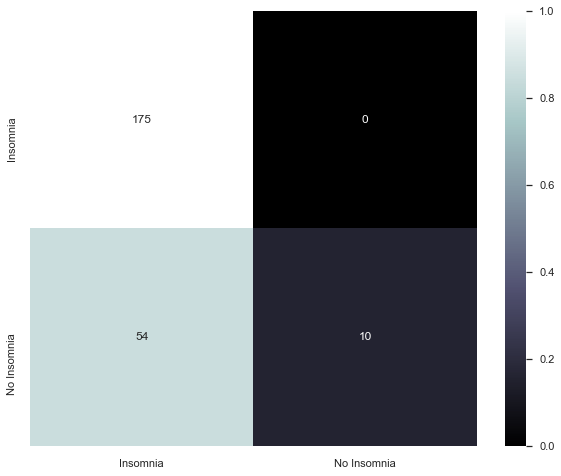

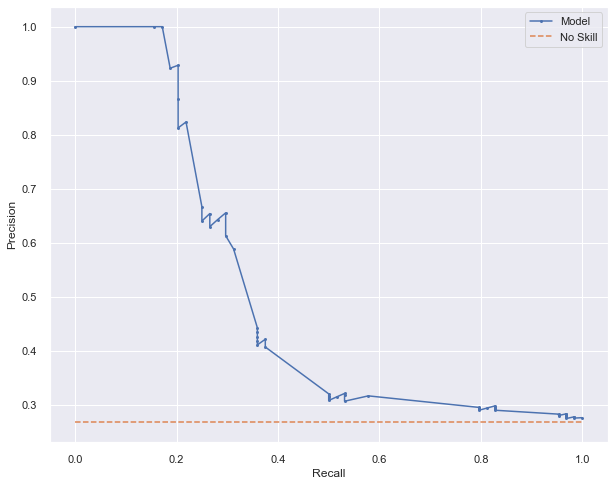




ROC AUC=0.622 



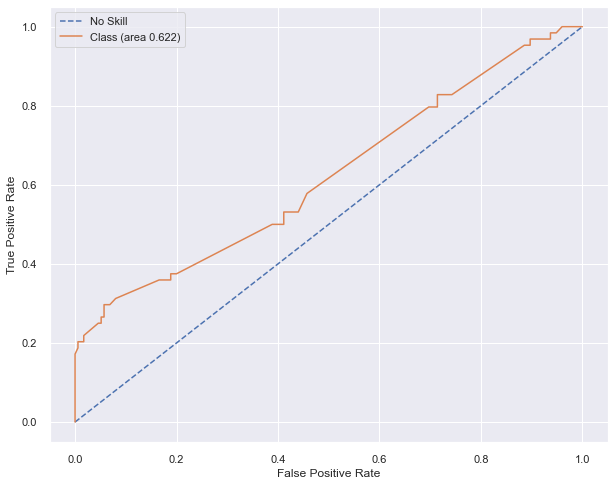



Cohen's kappa: 21.33%




In [241]:
print("\nk-NN for TF_IDF n-grams\n")
metrics_ML(neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=True)


k-NN for TF_IDF char n-grams

Execution time : 0.002 s
Score : 86.61 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.86      0.98      0.91       175
 No Insomnia       0.92      0.55      0.69        64

    accuracy                           0.87       239
   macro avg       0.89      0.76      0.80       239
weighted avg       0.87      0.87      0.85       239


Confusion Matrix





Model: f1-score=0.686 AUC=0.857




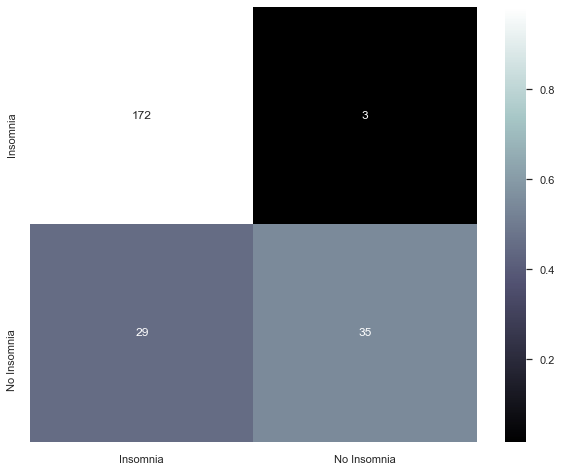

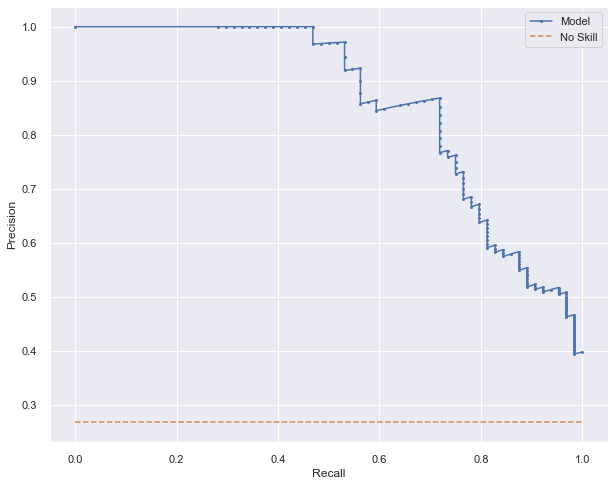




ROC AUC=0.924 



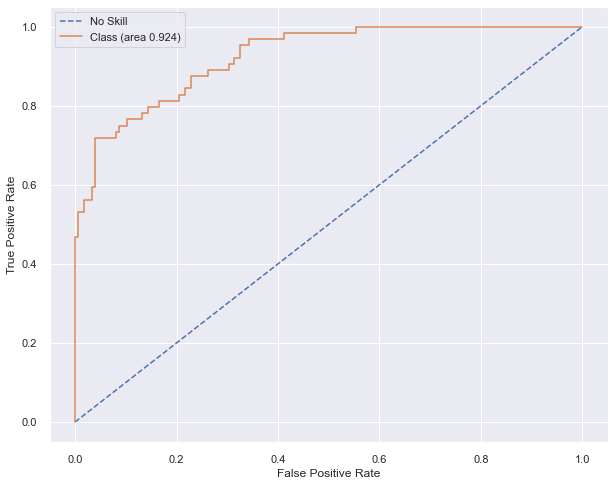



Cohen's kappa: 60.81%




In [242]:
print("\nk-NN for TF_IDF char n-grams\n")
metrics_ML(neighbors.KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=True)


Random Forest for One-Hot encoding

Execution time : 0.490 s
Score : 87.87 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.86      0.99      0.92       175
 No Insomnia       0.97      0.56      0.71        64

    accuracy                           0.88       239
   macro avg       0.92      0.78      0.82       239
weighted avg       0.89      0.88      0.87       239


Confusion Matrix





Model: f1-score=0.713 AUC=0.879




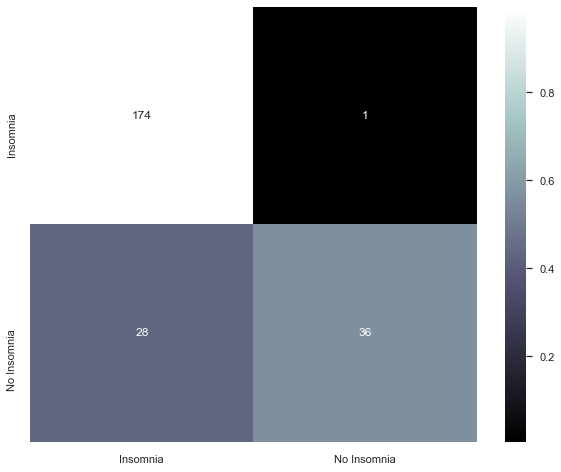

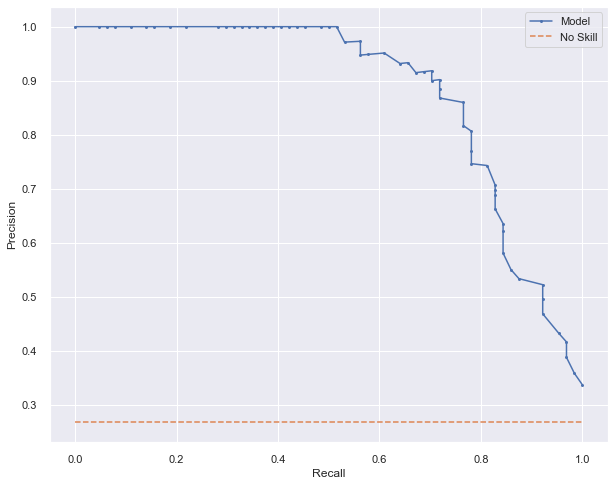




ROC AUC=0.924 



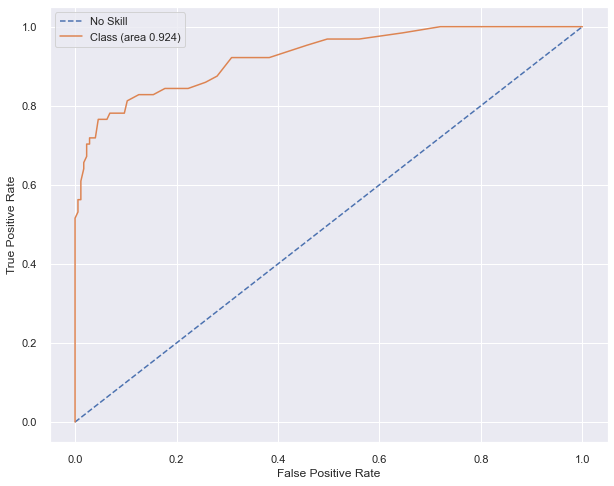



Cohen's kappa: 64.28%




In [243]:
print("\nRandom Forest for One-Hot encoding\n")
metrics_ML(ensemble.RandomForestClassifier(),  xtrain_count, train_y_sw, xvalid_count, valid_y_sw, gb=True)


Random Forest for TF_IDF

Execution time : 0.490 s
Score : 88.28 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.87      0.99      0.93       175
 No Insomnia       0.97      0.58      0.73        64

    accuracy                           0.88       239
   macro avg       0.92      0.79      0.83       239
weighted avg       0.89      0.88      0.87       239


Confusion Matrix





Model: f1-score=0.725 AUC=0.865




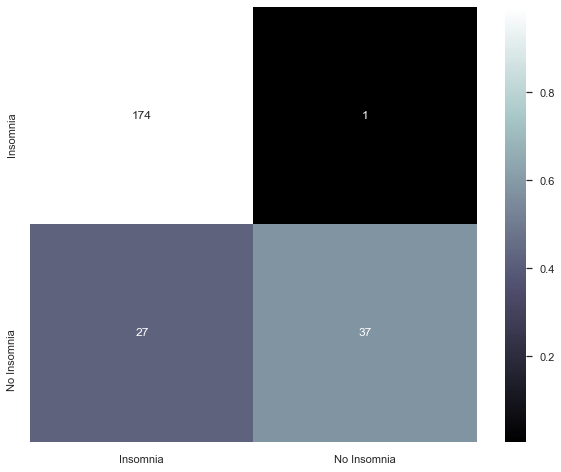

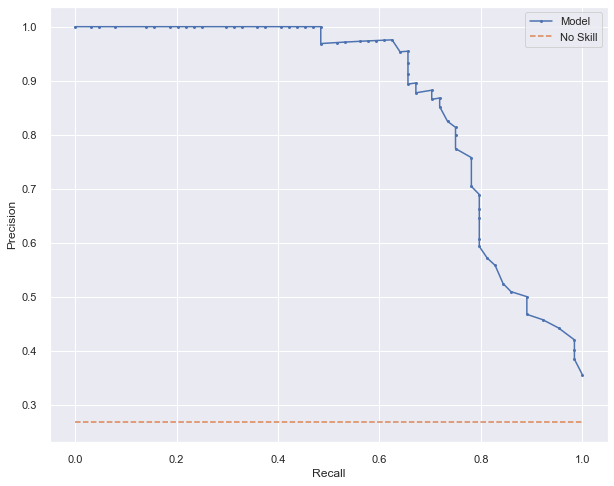




ROC AUC=0.915 



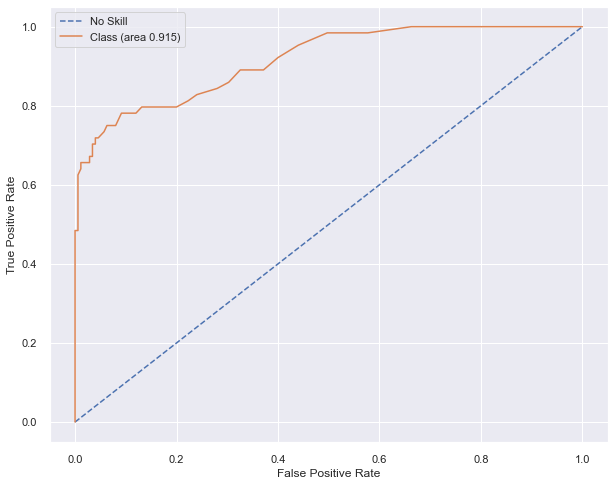



Cohen's kappa: 65.71%




In [244]:
print("\nRandom Forest for TF_IDF\n")
metrics_ML(ensemble.RandomForestClassifier(),  xtrain_tfidf, train_y, xvalid_tfidf, valid_y, gb=True)


Random Forest for TF_IDF n-grams

Execution time : 1.423 s
Score : 82.01 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.81      0.99      0.89       175
 No Insomnia       0.92      0.36      0.52        64

    accuracy                           0.82       239
   macro avg       0.86      0.67      0.70       239
weighted avg       0.84      0.82      0.79       239


Confusion Matrix





Model: f1-score=0.517 AUC=0.738




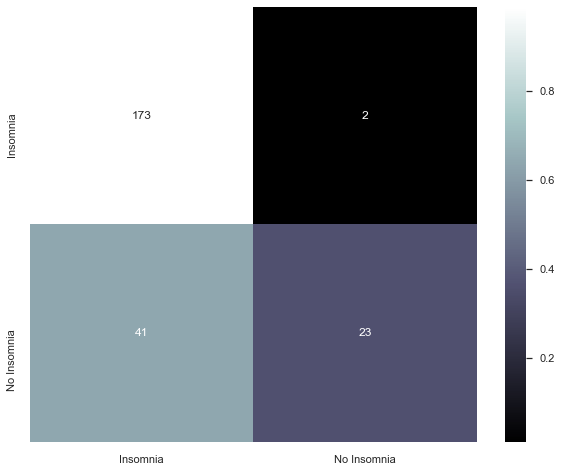

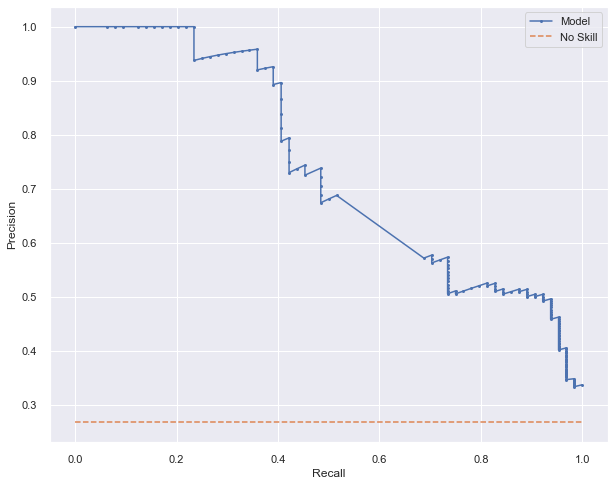




ROC AUC=0.863 



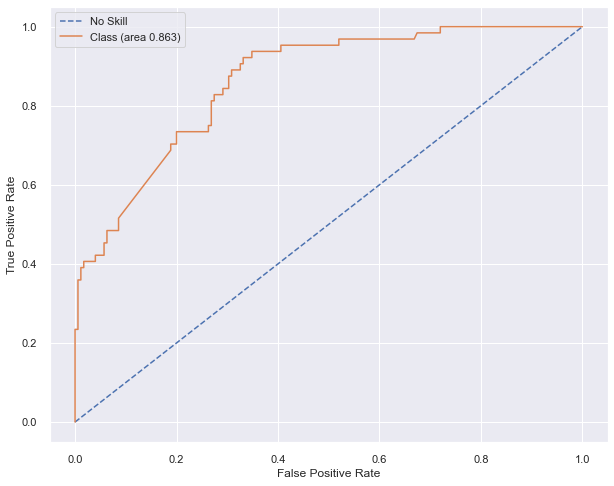



Cohen's kappa: 43.13%




In [245]:
print("\nRandom Forest for TF_IDF n-grams\n")
metrics_ML(ensemble.RandomForestClassifier(),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=True)


Random Forest for TF_IDF char n-grams

Execution time : 0.448 s
Score : 89.12 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.88      0.98      0.93       175
 No Insomnia       0.93      0.64      0.76        64

    accuracy                           0.89       239
   macro avg       0.91      0.81      0.84       239
weighted avg       0.90      0.89      0.88       239


Confusion Matrix





Model: f1-score=0.759 AUC=0.910




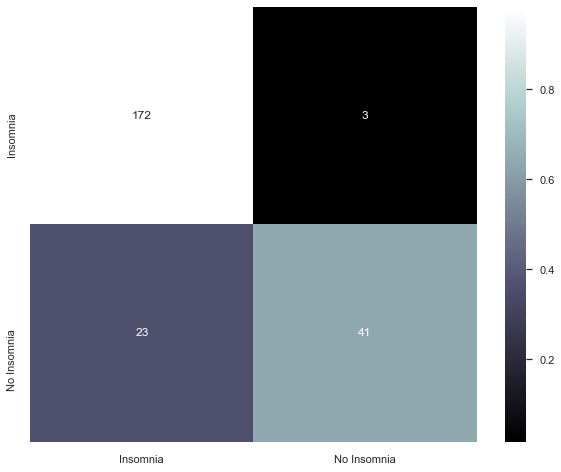

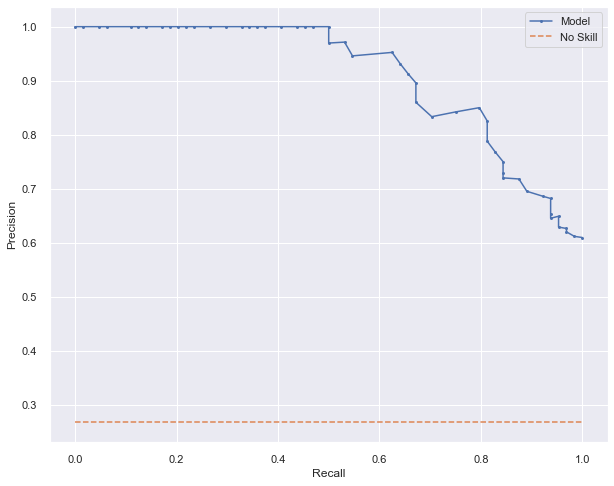




ROC AUC=0.962 



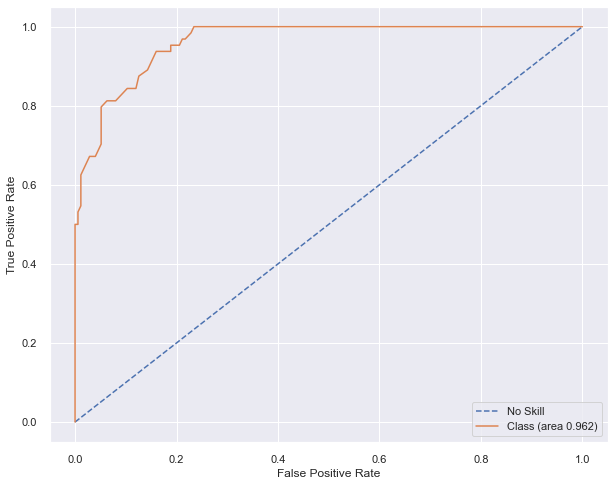



Cohen's kappa: 69.21%




In [246]:
print("\nRandom Forest for TF_IDF char n-grams\n")
metrics_ML(ensemble.RandomForestClassifier(),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=True)


DT for One-Hot encoding

Execution time : 0.022 s
Score : 89.12 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.90      0.95      0.93       175
 No Insomnia       0.85      0.72      0.78        64

    accuracy                           0.89       239
   macro avg       0.88      0.84      0.85       239
weighted avg       0.89      0.89      0.89       239


Confusion Matrix





Model: f1-score=0.780 AUC=0.823




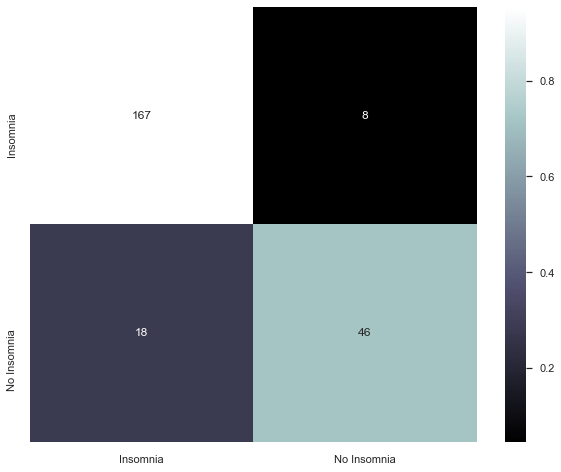

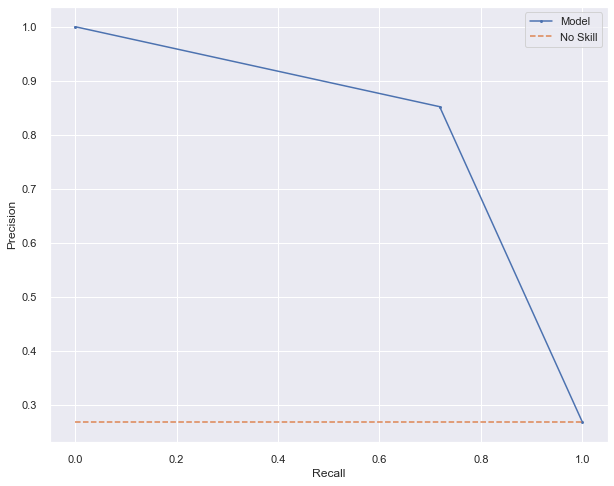




ROC AUC=0.837 



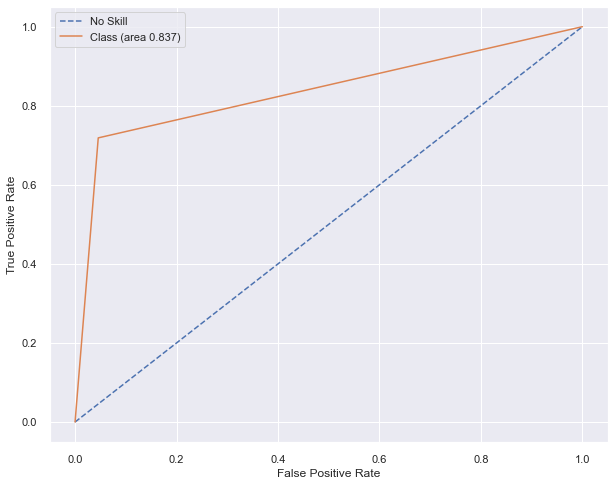



Cohen's kappa: 70.81%




In [247]:
print("\nDT for One-Hot encoding\n")
metrics_ML(DecisionTreeClassifier(),  xtrain_count, train_y_sw, xvalid_count, valid_y_sw, gb=True)

\DT Forest for TF_IDF

Execution time : 0.026 s
Score : 87.03 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.89      0.94      0.91       175
 No Insomnia       0.80      0.69      0.74        64

    accuracy                           0.87       239
   macro avg       0.85      0.81      0.83       239
weighted avg       0.87      0.87      0.87       239


Confusion Matrix





Model: f1-score=0.739 AUC=0.786




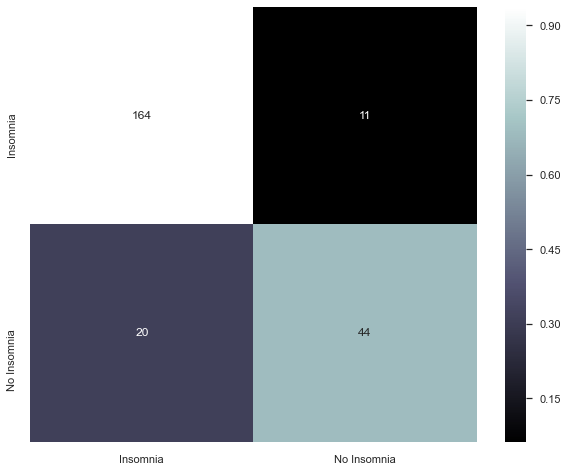

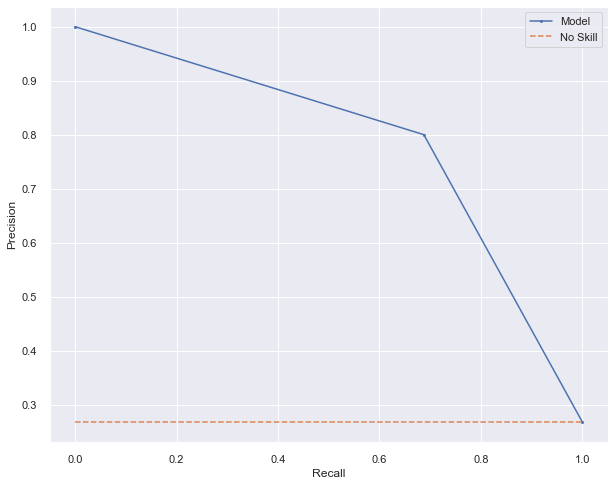




ROC AUC=0.812 



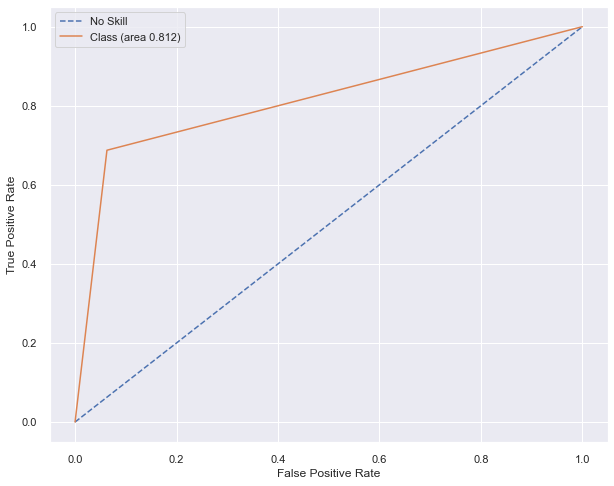



Cohen's kappa: 65.38%




In [249]:
print("\DT Forest for TF_IDF\n")
metrics_ML(DecisionTreeClassifier(),  xtrain_tfidf, train_y, xvalid_tfidf, valid_y, gb=True)


DT for TF_IDF n-grams

Execution time : 0.218 s
Score : 82.85 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.84      0.95      0.89       175
 No Insomnia       0.78      0.50      0.61        64

    accuracy                           0.83       239
   macro avg       0.81      0.72      0.75       239
weighted avg       0.82      0.83      0.81       239


Confusion Matrix





Model: f1-score=0.610 AUC=0.732




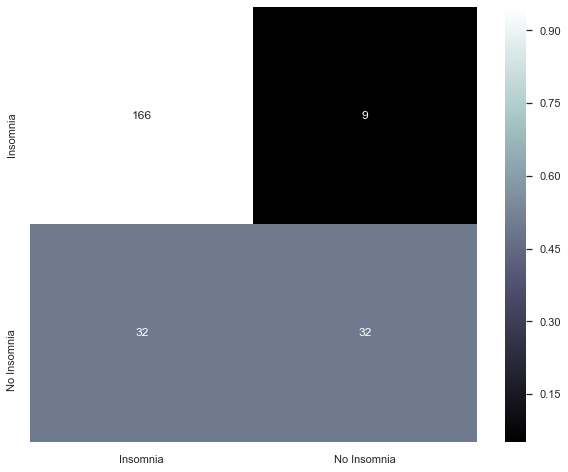

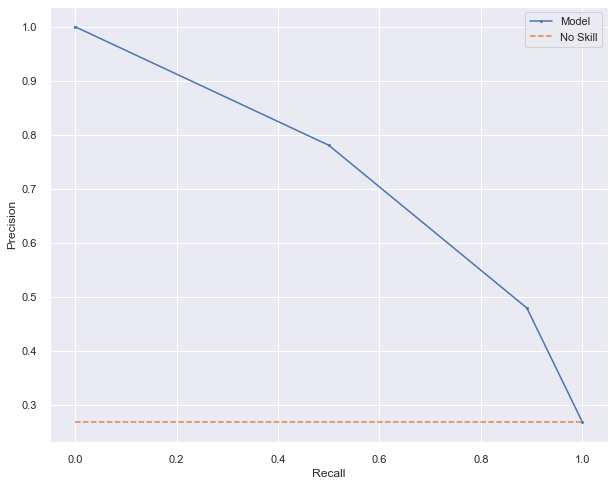




ROC AUC=0.834 



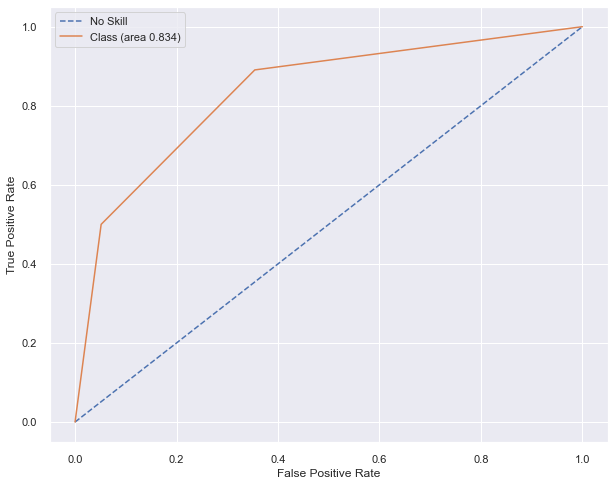



Cohen's kappa: 50.63%




In [250]:
print("\nDT for TF_IDF n-grams\n")
metrics_ML(DecisionTreeClassifier(),  xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, gb=True)


DT for TF_IDF char n-grams

Execution time : 0.103 s
Score : 84.52 %

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.90      0.89      0.89       175
 No Insomnia       0.71      0.72      0.71        64

    accuracy                           0.85       239
   macro avg       0.80      0.81      0.80       239
weighted avg       0.85      0.85      0.85       239


Confusion Matrix





Model: f1-score=0.713 AUC=0.751




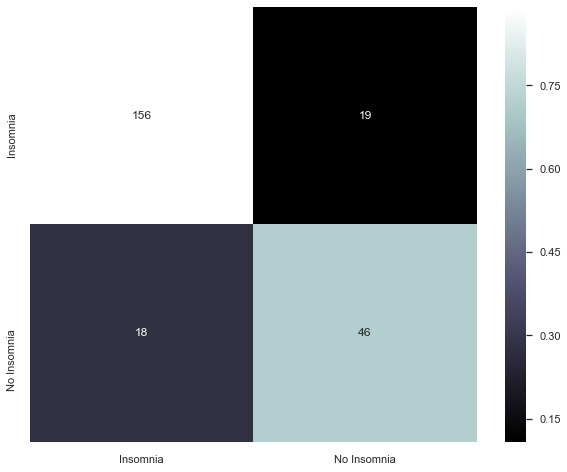

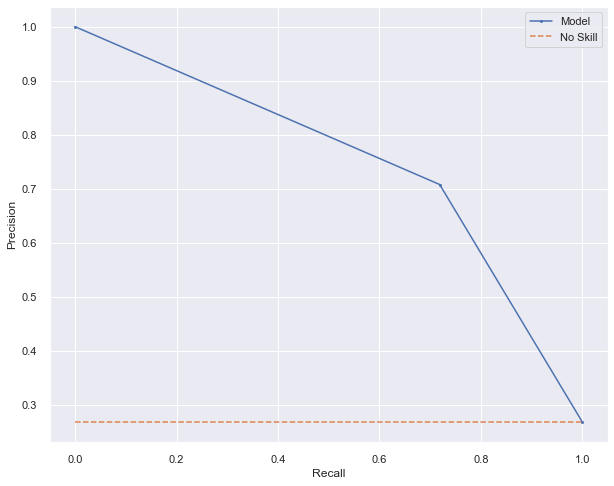




ROC AUC=0.805 



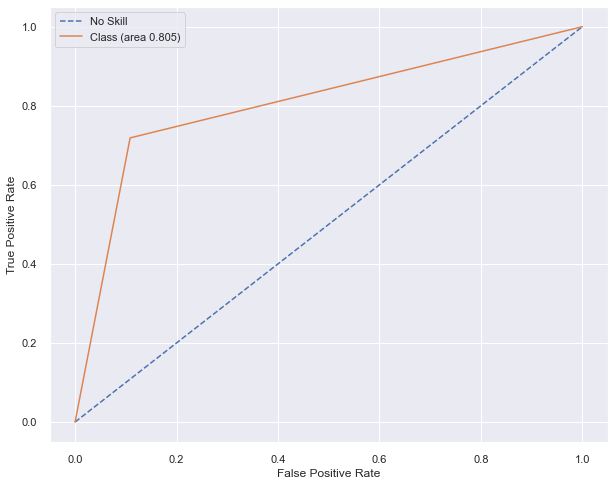



Cohen's kappa: 60.72%




In [251]:
print("\nDT for TF_IDF char n-grams\n")
metrics_ML(DecisionTreeClassifier(),  xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, gb=True)

## MODEL SELECTION

In [252]:
def report(clf, x, y, name='classifier', cv=5, dict_scoring=None, fit_params=None):
    '''
    Function create a metric report automatically with cross_validate function.
    @param clf: (model) classifier
    @param x: (list or matrix or tensor) training x data
    @param y: (list) label data 
    @param name: (string) name of the model (default classifier)
    @param cv: (int) number of fold for cross-validation (default 5)
    @param dict_scoring: (dict) dictionary of metrics and names
    @param fit_aparams: (dict) add parameters for model fitting 
    @return: (pandas.dataframe) dataframe containing all the results of the metrics 
    for each fold and the mean and std for each of them
    '''
    if dict_scoring!=None:
        score = dict_scoring.copy() # save the original dictionary
        for i in score.keys():
            score[i] = make_scorer(score[i]) # make each function scorer
    
    scores = cross_validate(clf, x, y, scoring=score,
                         cv=cv, return_train_score=False, n_jobs=-1,  fit_params=fit_params)
    # initialisation 
    index = []
    value = []
    index.append("Model")
    value.append(name)
    for i in scores:  # loop on each metric generate text and values
        if i == "estimator":
            continue
        for j in enumerate(scores[i]):
            index.append(i+"_cv"+str(j[0]+1))
            value.append(j[1])
        
        
        index.append(i+"_mean")
        value.append(np.mean(scores[i]))
        index.append(i+"_std")
        value.append(np.std(scores[i]))
        
    return pd.DataFrame(data=value, index=index).T

In [253]:
CV_splits= 5

In [254]:
token = Tokenizer()

In [255]:
token.fit_on_texts(sleepModelDecision['text'])

In [256]:
word_index = token.word_index

In [257]:
# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=300)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=300)

In [258]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_count,train_y_sw, name='NB_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))

In [259]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_tfidf,train_y, name='NB_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))

In [260]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram,train_y, name='NB_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))

In [261]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars,train_y, name='NB_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))


In [262]:
df_results = df_results.append(report(naive_bayes.MultinomialNB(), train_seq_x,train_y, name='NB_Words', cv=CV_splits, dict_scoring=score_metrics))

In [263]:
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_count,train_y_sw, name='LR_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_tfidf,train_y, name='LR_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_tfidf_ngram,train_y, name='LR_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), xtrain_tfidf_ngram_chars,train_y, name='LR_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(linear_model.LogisticRegression(max_iter=1000), train_seq_x,train_y, name='LR_Words', cv=CV_splits, dict_scoring=score_metrics))

In [264]:
df_results = df_results.append(report(svm.SVC(), xtrain_count,train_y_sw, name='SVM_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(svm.SVC(), xtrain_tfidf,train_y, name='SVM_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(svm.SVC(), xtrain_tfidf_ngram,train_y, name='SVM_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(svm.SVC(), xtrain_tfidf_ngram_chars,train_y, name='SVM_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(svm.SVC(), train_seq_x,train_y, name='SVM_Words', cv=CV_splits, dict_scoring=score_metrics))


In [265]:
df_results = df_results.append(report(KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1), xtrain_count,train_y_sw, name='kNN_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1), xtrain_tfidf,train_y, name='kNN_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1), xtrain_tfidf_ngram,train_y, name='kNN_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1), xtrain_tfidf_ngram_chars,train_y, name='kNN_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1), train_seq_x,train_y, name='kNN_Words', cv=CV_splits, dict_scoring=score_metrics))

In [266]:
df_results = df_results.append(report(ensemble.RandomForestClassifier(bootstrap=True,min_impurity_decrease=1e-7,n_jobs=-1, random_state=42), xtrain_count,train_y_sw, name='RF_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(ensemble.RandomForestClassifier(bootstrap=True,min_impurity_decrease=1e-7,n_jobs=-1, random_state=42), xtrain_tfidf,train_y, name='RF_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(ensemble.RandomForestClassifier(bootstrap=True,min_impurity_decrease=1e-7,n_jobs=-1, random_state=42), xtrain_tfidf_ngram,train_y, name='RF_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(ensemble.RandomForestClassifier(bootstrap=True,min_impurity_decrease=1e-7,n_jobs=-1, random_state=42), xtrain_tfidf_ngram_chars,train_y, name='RF_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(ensemble.RandomForestClassifier(bootstrap=True,min_impurity_decrease=1e-7,n_jobs=-1, random_state=42), train_seq_x,train_y, name='RF_Words', cv=CV_splits, dict_scoring=score_metrics))

In [268]:
df_results = df_results.append(report(DecisionTreeClassifier(), xtrain_count,train_y_sw, name='DT_Count_Vectors', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(DecisionTreeClassifier(), xtrain_tfidf,train_y, name='DT_WordLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(DecisionTreeClassifier(), xtrain_tfidf_ngram,train_y, name='DT_N-Gram_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(DecisionTreeClassifier(), xtrain_tfidf_ngram_chars,train_y, name='DT_CharLevel_TF-IDF', cv=CV_splits, dict_scoring=score_metrics))
df_results = df_results.append(report(DecisionTreeClassifier(), train_seq_x,train_y, name='DT_Words', cv=CV_splits, dict_scoring=score_metrics))


In [269]:
df_results

,Model,fit_time_cv1,fit_time_cv2,fit_time_cv3,fit_time_cv4,fit_time_cv5,fit_time_mean,fit_time_std,score_time_cv1,score_time_cv2,...,test_matthews_corrcoef_cv5,test_matthews_corrcoef_mean,test_matthews_corrcoef_std,test_roc_auc_cv1,test_roc_auc_cv2,test_roc_auc_cv3,test_roc_auc_cv4,test_roc_auc_cv5,test_roc_auc_mean,test_roc_auc_std
0,NB_Count_Vectors,0.00331783,0.00297809,0.00406408,0.00286198,0.00287175,0.00321875,0.000453877,0.0113649,0.012799,...,0.721875,0.76385,0.0394592,0.897479,0.879622,0.851429,0.888571,0.822542,0.867929,0.0274528
0,NB_WordLevel_TF-IDF,0.00201178,0.00210524,0.002038,0.00205684,0.00156593,0.00195556,0.000197193,0.00827599,0.00767279,...,0.483336,0.521563,0.0405318,0.666667,0.702311,0.7,0.64,0.647059,0.671207,0.0259774
0,NB_N-Gram_TF-IDF,0.00218415,0.00191522,0.00190902,0.00176191,0.00192595,0.00193925,0.000136451,0.00812387,0.00760794,...,0.534065,0.51963,0.0318221,0.696078,0.656863,0.67,0.64,0.676471,0.667882,0.0188261
0,NB_CharLevel_TF-IDF,0.00342298,0.00415325,0.00416589,0.0038209,0.003721,0.0038568,0.000279769,0.00763607,0.00985193,...,0.242101,0.262308,0.0390426,0.529412,0.57486,0.54,0.56,0.539216,0.548697,0.0164299
0,NB_Words,0.00504136,0.00486708,0.00491381,0.004884,0.00408697,0.00475864,0.000341357,0.0140569,0.0131271,...,0.0147927,0.0431314,0.0400739,0.566387,0.510294,0.507143,0.529286,0.508323,0.524286,0.0225475
0,LR_Count_Vectors,0.0405481,0.040724,0.0390511,0.040575,0.037056,0.0395908,0.00140613,0.00785685,0.00742793,...,0.750519,0.804678,0.0434483,0.917997,0.8743,0.908571,0.882143,0.848357,0.886274,0.0249067
0,LR_WordLevel_TF-IDF,0.0278008,0.0213819,0.0249178,0.0242362,0.0216849,0.0240043,0.00234771,0.00729704,0.00733805,...,0.483336,0.558448,0.0499049,0.705882,0.735294,0.7,0.67,0.647059,0.691647,0.030444
0,LR_N-Gram_TF-IDF,0.047169,0.0501859,0.0353599,0.0386789,0.0406992,0.0424186,0.0054711,0.00749493,0.00696707,...,0.298119,0.359507,0.04098,0.598039,0.607843,0.57,0.59,0.558824,0.584941,0.018039
0,LR_CharLevel_TF-IDF,0.0306859,0.0270622,0.0337601,0.028146,0.0338759,0.030706,0.00280026,0.00785017,0.00759482,...,0.627731,0.691065,0.0383153,0.813725,0.790546,0.79,0.776429,0.735294,0.781199,0.0258952
0,LR_Words,0.276853,0.222164,0.184291,0.219901,0.185215,0.217685,0.0337499,0.00724101,0.00846696,...,0.33405,0.300196,0.0314261,0.602451,0.637185,0.591429,0.607143,0.615672,0.610776,0.0153508


In [270]:
final_Modelselection=df_results[[ "Model","test_acc_mean","test_acc_std", 
                        
                       "test_prec_mean", "test_prec_std", 
                        "test_recall_mean","test_recall_std", 
                       "test_f1-score_mean", "test_f1-score_std", 
                       "test_cohens_kappa_mean", "test_cohens_kappa_std", "test_matthews_corrcoef_mean","test_matthews_corrcoef_std", 
                       "test_roc_auc_mean", "test_roc_auc_std"]][df_results["test_matthews_corrcoef_mean"]>0.5].sort_values(by=["test_matthews_corrcoef_mean", "test_recall_mean"], ascending=False)





In [271]:
final_Modelselection

,Model,test_acc_mean,test_acc_std,test_prec_mean,test_prec_std,test_recall_mean,test_recall_std,test_f1-score_mean,test_f1-score_std,test_cohens_kappa_mean,test_cohens_kappa_std,test_matthews_corrcoef_mean,test_matthews_corrcoef_std,test_roc_auc_mean,test_roc_auc_std
0,RF_Words,0.961135,0.00628904,0.995556,0.00888889,0.857725,0.0228536,0.921321,0.0134155,0.895718,0.0174074,0.90025,0.0160941,0.928143,0.0113592
0,DT_Words,0.945395,0.0179979,0.892753,0.0424985,0.905255,0.0416423,0.898239,0.0337062,0.860954,0.0459085,0.861653,0.0457351,0.932581,0.0235439
0,LR_Count_Vectors,0.925401,0.0161356,0.907008,0.0360065,0.802588,0.0473816,0.850747,0.0341311,0.801346,0.0444162,0.804678,0.0434483,0.886274,0.0249067
0,DT_Count_Vectors,0.920138,0.0243576,0.870499,0.0374688,0.822353,0.0792273,0.843919,0.0524497,0.790508,0.0677967,0.792485,0.0655214,0.889008,0.0408492
0,NB_Count_Vectors,0.909645,0.0147423,0.870784,0.0408316,0.778745,0.0610347,0.819853,0.0340796,0.760015,0.0425913,0.76385,0.0394592,0.867929,0.0274528
0,SVM_Count_Vectors,0.908586,0.0182135,0.966805,0.0305582,0.68,0.0645543,0.796615,0.0466258,0.740293,0.0562862,0.760487,0.0499001,0.835704,0.032379
0,DT_WordLevel_TF-IDF,0.907534,0.0202253,0.857145,0.0236548,0.782824,0.0793539,0.816271,0.0471884,0.754903,0.0593862,0.757841,0.056752,0.86781,0.0384789
0,SVM_CharLevel_TF-IDF,0.906487,0.0114222,0.966183,0.0200933,0.671843,0.04102,0.791796,0.0299543,0.734132,0.0358577,0.754746,0.031451,0.831631,0.0205567
0,RF_Count_Vectors,0.903351,0.0222407,0.97044,0.0332551,0.656314,0.071378,0.781229,0.0557805,0.722577,0.0677796,0.746382,0.060788,0.82457,0.037399
0,RF_CharLevel_TF-IDF,0.901212,0.0205172,0.925373,0.0437197,0.683451,0.0601909,0.785009,0.049076,0.72296,0.0609338,0.7377,0.0579454,0.83171,0.0325982


In [413]:
fileName = "final_Modelselection_"+timestr+".csv"
final_Modelselection.to_csv(fileName, index=False)

In [272]:
df_results.sort_values(by=["test_prec_mean", "test_recall_mean"], ascending=False).to_csv("model_selection_results.csv", index=False)

In [273]:
df_results=df_results[df_results["test_matthews_corrcoef_mean"]>0.5]

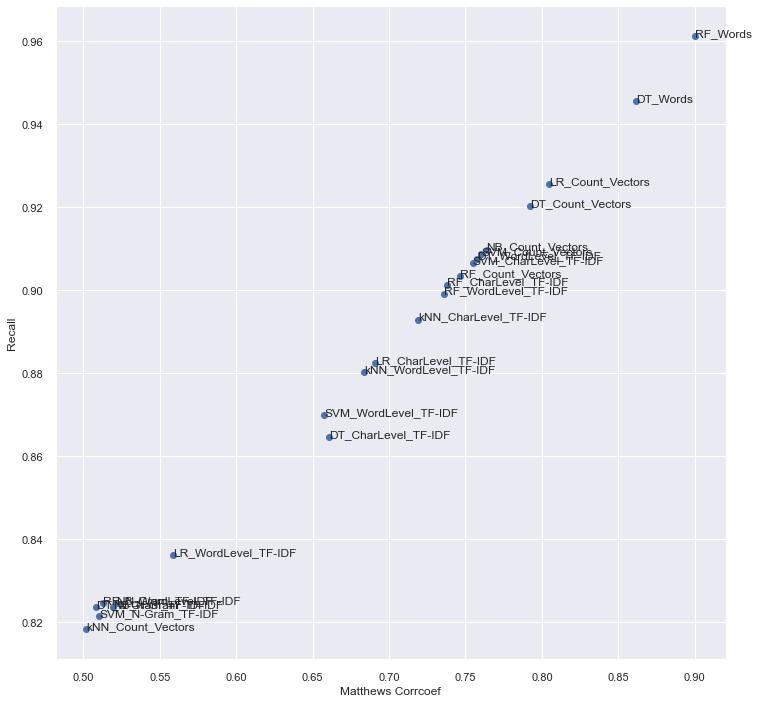

In [277]:
fig, ax = plt.subplots(figsize=(12,12))
#plt.axis([0.85,1,0.85,1])
ax.scatter(df_results["test_matthews_corrcoef_mean"], df_results["test_acc_mean"])

for i, txt in enumerate(df_results["Model"]):
    ax.annotate(txt, (df_results["test_matthews_corrcoef_mean"].iloc[i], df_results["test_acc_mean"].iloc[i]))

plt.xlabel("Matthews Corrcoef")
plt.ylabel("Recall")

plt.grid(True)

#### Model selection refrence - https://towardsdatascience.com/model-selection-in-text-classification-ac13eedf6146

## Topic Detection Modeling

In [414]:
def label_remedies_0(row):   
    if row['Topic'] == 0 :
        return 'Yes'
    return 'No'


def label_remedies_1(row):   
    if row['Topic'] == 1 :
        return 'Yes'
    return 'No'


def label_remedies_2(row):   
    if row['Topic'] == 2 :
        return 'Yes'
    return 'No'


def label_remedies_3(row):   
    if row['Topic'] == 3 :
        return 'Yes'
    return 'No'


def label_remedies_4(row):   
    if row['Topic'] == 4 :
        return 'Yes'
    return 'No'


In [415]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [470]:
sleepgroup.columns

Index(['text', 'created_at', 'location', 'friends_count', 'sentiment',
       'gender', 'tweet_classification', 'age', 'emotion', 'sufferingChronic',
       'group', 'Topic', 'severity', 'Remedies',
       'Trying Home remedies with drugs', 'Not trying any remedies - Calm',
       'Trying Therapies remedies with drugs',
       'No clarity on remedies - Looking for help',
       'Not much bothered - Just express Feelings',
       'Not trying any remedies - Worried about next day',
       'Trying Therapies including drugs', 'Trying Home or Drug remedies',
       'Not much bothered - Just express Insomniac Feelings'],
      dtype='object')

In [447]:
sleepgroup_temp=sleepgroup

In [471]:
sleepgroup_temp2=sleepgroup

In [448]:
sleepgroup_temp['No clarity on remedies - Looking for help']=sleepgroup_temp.apply (lambda row: label_remedies_0(row), axis=1)

In [472]:
sleepgroup_temp2['Moderate']=sleepgroup_temp2.apply (lambda row: label_remedies_0(row), axis=1)

In [449]:
sleepgroup_temp['Not much bothered - Just express Insomniac Feelings']=sleepgroup_temp.apply (lambda row: label_remedies_1(row), axis=1)


In [473]:
sleepgroup_temp2['Normal']=sleepgroup_temp2.apply (lambda row: label_remedies_1(row), axis=1)

In [450]:
sleepgroup_temp['Not trying any remedies - Worried about next day']=sleepgroup_temp.apply (lambda row: label_remedies_2(row), axis=1)


In [474]:
sleepgroup_temp2['Severe']=sleepgroup_temp2.apply (lambda row: label_remedies_2(row), axis=1)

In [451]:
sleepgroup_temp['Trying Therapies including drugs']=sleepgroup_temp.apply (lambda row: label_remedies_3(row), axis=1)


In [475]:
sleepgroup_temp2['Severe']=sleepgroup_temp2.apply (lambda row: label_remedies_3(row), axis=1)

In [452]:
sleepgroup_temp['Trying Home or Drug remedies']=sleepgroup_temp.apply (lambda row: label_remedies_4(row), axis=1)


In [476]:
sleepgroup_temp2['Mild']=sleepgroup_temp2.apply (lambda row: label_remedies_4(row), axis=1)

In [453]:
categories = list(sleepgroup.Remedies.unique())

In [477]:
categories2 = list(sleepgroup.severity.unique())

In [478]:
categories

['Trying Therapies including drugs',
 'Not much bothered - Just express Insomniac Feelings',
 'No clarity on remedies - Looking for help',
 'Trying Home or Drug remedies',
 'Not trying any remedies - Worried about next day']

In [479]:
categories2

['Severe', 'Normal', 'Moderate', 'Mild']

In [455]:
train, test = train_test_split(sleepgroup_temp, random_state=42, test_size=0.33, shuffle=True)

In [482]:
train2, test2 = train_test_split(sleepgroup_temp2, random_state=42, test_size=0.33, shuffle=True)

In [490]:
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(627,)
(309,)


In [491]:
X_train2 = train2.text
X_test2 = test2.text
print(X_train2.shape)
print(X_test2.shape)

(627,)
(309,)


In [533]:
train

,text,created_at,location,friends_count,sentiment,gender,tweet_classification,age,emotion,sufferingChronic,...,Remedies,Trying Home remedies with drugs,Not trying any remedies - Calm,Trying Therapies remedies with drugs,No clarity on remedies - Looking for help,Not much bothered - Just express Feelings,Not trying any remedies - Worried about next day,Trying Therapies including drugs,Trying Home or Drug remedies,Not much bothered - Just express Insomniac Feelings
164,how insomnia feels or during covid sleepmed me...,2020-06-26 03:35:21+00:00,United States,3275,neutral,male,Individual,>=40,amusement,no,...,Not much bothered - Just express Insomniac Fee...,No,Yes,No,No,Yes,No,No,No,Yes
28,disrupted sleep in parkinsons may be mediated ...,2020-07-10 10:41:02+00:00,,697,neutral,male,Individual,>=40,negative-fear,no,...,No clarity on remedies - Looking for help,Yes,No,No,Yes,No,No,No,No,No
523,wearelegion same its just over am rn insomnia,2020-07-07 02:07:26+00:00,,31,neutral,male,Individual,>=40,sadness,no,...,Not trying any remedies - Worried about next day,No,No,Yes,No,No,Yes,No,No,No
193,the insomnia hashtag is kinda redundant at the...,2020-06-25 23:53:54+00:00,"Burntwood, UK",797,negative,male,Individual,30-39,amusement,no,...,Not trying any remedies - Worried about next day,No,No,Yes,No,No,Yes,No,No,No
332,and at the sun has moved behind the clouds for...,2020-07-11 22:21:55+00:00,"Bergen, Norway",861,negative,male,Individual,>=40,amusement,no,...,Not trying any remedies - Worried about next day,No,No,Yes,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,insomnia forever,2020-06-24 22:41:06+00:00,,20,neutral,male,Individual,<=18,sadness,no,...,No clarity on remedies - Looking for help,Yes,No,No,Yes,No,No,No,No,No
270,once there was a king who couldnt sleep \nits ...,2020-07-02 01:46:51+00:00,Don't worry about it!,5,positive,male,Individual,<=18,awe,no,...,Trying Home or Drug remedies,No,No,No,No,No,No,No,Yes,No
860,why im still up insomnia,2020-07-04 10:16:10+00:00,,786,neutral,male,Individual,19-29,sadness,no,...,No clarity on remedies - Looking for help,Yes,No,No,Yes,No,No,No,No,No
435,lets stop glorifying being busy and stressed i...,2020-07-14 15:52:53+00:00,"London, England",192,positive,female,Individual,19-29,awe,yes,...,Not trying any remedies - Worried about next day,No,No,Yes,No,No,Yes,No,No,No


## Naive Bayes

In [457]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(['sjogrens','did','havent','little','new','make','know','skype','twitter','oh','taking','took','sleep','insomnia','basically','슈가','amp','got','going','gonna','pm','need','bed','day','jk','dont','hmm','wtf','ive','im','just','al','like']))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [458]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.8770226537216829
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8058252427184466
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.7313915857605178
... Processing Trying Home or Drug remedies
Test accuracy is 0.8576051779935275
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.8640776699029126


In [492]:
for category in categories2:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train2, train2[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test2)
    print('Test accuracy is {}'.format(accuracy_score(test2[category], prediction)))

... Processing Severe
Test accuracy is 0.8770226537216829
... Processing Normal
Test accuracy is 0.8058252427184466
... Processing Moderate
Test accuracy is 0.7313915857605178
... Processing Mild
Test accuracy is 0.8576051779935275


## LinearSVC

In [459]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

In [460]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.9061488673139159
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8640776699029126
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.8220064724919094
... Processing Trying Home or Drug remedies
Test accuracy is 0.8996763754045307
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.883495145631068


In [493]:
for category in categories2:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train2, train2[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test2)
    print('Test accuracy is {}'.format(accuracy_score(test2[category], prediction)))

... Processing Severe
Test accuracy is 0.9061488673139159
... Processing Normal
Test accuracy is 0.8640776699029126
... Processing Moderate
Test accuracy is 0.8220064724919094
... Processing Mild
Test accuracy is 0.8996763754045307


## Logistic Regression

In [461]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.8770226537216829
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8058252427184466
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.7928802588996764
... Processing Trying Home or Drug remedies
Test accuracy is 0.8446601941747572
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.8576051779935275


In [494]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories2:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train2, train2[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test2)
    print('Test accuracy is {}'.format(accuracy_score(test2[category], prediction)))

... Processing Severe
Test accuracy is 0.8770226537216829
... Processing Normal
Test accuracy is 0.8058252427184466
... Processing Moderate
Test accuracy is 0.7928802588996764
... Processing Mild
Test accuracy is 0.8446601941747572


## RandomForest

In [462]:
from sklearn.ensemble import RandomForestClassifier

randf_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(random_state = 42), n_jobs=1)),
            ])

In [463]:
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    randf_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = randf_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.8867313915857605
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8187702265372169
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.7896440129449838
... Processing Trying Home or Drug remedies
Test accuracy is 0.8673139158576052
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.8705501618122977


In [495]:
for category in categories2:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    randf_pipeline.fit(X_train2, train2[category])
    # compute the testing accuracy
    prediction = randf_pipeline.predict(X_test2)
    print('Test accuracy is {}'.format(accuracy_score(test2[category], prediction)))

... Processing Severe
Test accuracy is 0.8867313915857605
... Processing Normal
Test accuracy is 0.8187702265372169
... Processing Moderate
Test accuracy is 0.7896440129449838
... Processing Mild
Test accuracy is 0.8673139158576052


## DecisionTreeClassifier

In [464]:
from sklearn.tree import DecisionTreeClassifier

descTree_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=1)),
            ])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    descTree_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = descTree_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.8349514563106796
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8317152103559871
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.6731391585760518
... Processing Trying Home or Drug remedies
Test accuracy is 0.8220064724919094
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.8187702265372169


In [496]:
for category in categories2:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    descTree_pipeline.fit(X_train2, train2[category])
    # compute the testing accuracy
    prediction = descTree_pipeline.predict(X_test2)
    print('Test accuracy is {}'.format(accuracy_score(test2[category], prediction)))

... Processing Severe
Test accuracy is 0.8381877022653722
... Processing Normal
Test accuracy is 0.8187702265372169
... Processing Moderate
Test accuracy is 0.6796116504854369
... Processing Mild
Test accuracy is 0.8478964401294499


## GradientBoostingClassifier

In [465]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

gradBoo_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=1)),
            ])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    gradBoo_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = gradBoo_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Trying Therapies including drugs
Test accuracy is 0.8802588996763754
... Processing Not much bothered - Just express Insomniac Feelings
Test accuracy is 0.8414239482200647
... Processing No clarity on remedies - Looking for help
Test accuracy is 0.7766990291262136
... Processing Trying Home or Drug remedies
Test accuracy is 0.8414239482200647
... Processing Not trying any remedies - Worried about next day
Test accuracy is 0.86084142394822


#### Model selection refrence - https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [510]:
sleepModelDecision2=sleepModelDecision[~sleepModelDecision['Topic'].isnull()]

In [511]:
features = tfidf_vect_ngram_chars.fit_transform(sleepModelDecision2['text']).toarray()
labels = sleepModelDecision2.Remedies
features.shape

(874, 5562)

In [512]:
labels

0                       Trying Therapies including drugs
1      Not much bothered - Just express Insomniac Fee...
2              No clarity on remedies - Looking for help
3                           Trying Home or Drug remedies
4                       Trying Therapies including drugs
                             ...                        
931            No clarity on remedies - Looking for help
932                         Trying Home or Drug remedies
933            No clarity on remedies - Looking for help
934     Not trying any remedies - Worried about next day
935            No clarity on remedies - Looking for help
Name: Remedies, Length: 874, dtype: object

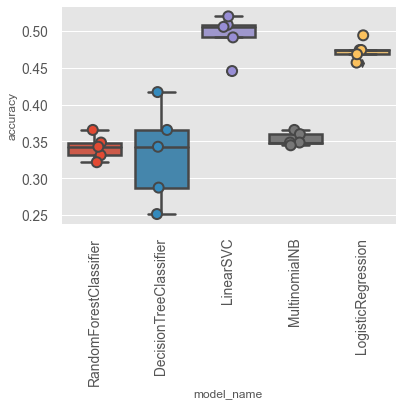

In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)

# plt.figure(figsize=(100,100))
# plt.gcf().set_size_inches(100, 100)
plt.xticks(rotation='vertical')
plt.show()

In [518]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.361504
LinearSVC                 0.494292
LogisticRegression        0.473708
MultinomialNB             0.353537
RandomForestClassifier    0.342082
Name: accuracy, dtype: float64

In [525]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=sleepModelDecision2['Remedies'].unique()))

                                                     precision    recall  f1-score   support

                   Trying Therapies including drugs       0.58      0.57      0.58        89
Not much bothered - Just express Insomniac Feelings       0.40      0.47      0.43        47
          No clarity on remedies - Looking for help       0.39      0.52      0.45        52
                       Trying Home or Drug remedies       0.51      0.49      0.50        53
   Not trying any remedies - Worried about next day       0.73      0.40      0.51        48

                                           accuracy                           0.50       289
                                          macro avg       0.52      0.49      0.49       289
                                       weighted avg       0.53      0.50      0.50       289

